# Bim_Predict NoteBook

## Importing Libraries

In [1]:
# Import libraries
import os
import pandas as pd

# Define project folder paths
# Data directories
BASE_DIR = "../../"
DATA_DIR = os.path.join(BASE_DIR, "data")
RAW_DATA_DIR = os.path.join(DATA_DIR, "raw_data")
PROCESSED_DATA_DIR = os.path.join(DATA_DIR, "processed_data")
PREDICTED_DATA_DIR = os.path.join(DATA_DIR, "predicting_data")
TESTING_DATA_DIR = os.path.join(DATA_DIR, "testing_data")

# Model directories
MODELS_DIR = os.path.join(BASE_DIR, "models")
ML_MODELS_DIR = os.path.join(MODELS_DIR, "SK/machine_learning")
DL_MODELS_DIR = os.path.join(MODELS_DIR, "SK/deep_learning")
OTHER_MODELS_DIR = os.path.join(MODELS_DIR, "SK/other")

# Python modules and plots directories
PYTHON_MODULES_DIR = os.path.join(BASE_DIR, "python_modules")
PLOTS_DIR = os.path.join(BASE_DIR, "plots")

# List of directories to create
directories = [
    RAW_DATA_DIR, PROCESSED_DATA_DIR, PREDICTED_DATA_DIR,
    MODELS_DIR, ML_MODELS_DIR, DL_MODELS_DIR, OTHER_MODELS_DIR,
    PYTHON_MODULES_DIR, PLOTS_DIR
]

# Create directories if they don't exist
for directory in directories:
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Created directory: {directory}")
    else:
        print(f"Directory already exists: {directory}")

Directory already exists: ../../data/raw_data
Directory already exists: ../../data/processed_data
Directory already exists: ../../data/predicting_data
Directory already exists: ../../models
Directory already exists: ../../models/SK/machine_learning
Directory already exists: ../../models/SK/deep_learning
Directory already exists: ../../models/SK/other
Directory already exists: ../../python_modules
Directory already exists: ../../plots


<!-- ### Paths Creating && Data Importing -->

In [2]:
import os
import pandas as pd

# List all Excel files in RAW_DATA_DIR
excel_files = [f for f in os.listdir(RAW_DATA_DIR) if f.endswith(".xlsx") or f.endswith(".xls")]

# Dictionary to store DataFrames for each file and sheet
dataframes = {}

# Process each Excel file
for file in excel_files:
    file_path = os.path.join(RAW_DATA_DIR, file)
    print(f"Loading: {file_path}")

    try:
        # Load Excel file
        excel_data = pd.ExcelFile(file_path)

        # Load all sheets dynamically
        for sheet_name in excel_data.sheet_names:
            df = excel_data.parse(sheet_name)

            # Save DataFrame with a unique identifier
            dataframes[f"{file}_{sheet_name}"] = df

    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# Display summary of loaded data
print(f"\nTotal files processed: {len(dataframes)}")
for key, df in dataframes.items():
    print(f"Loaded DataFrame: {key}, Shape: {df.shape}")

Loading: ../../data/raw_data/maquette_23017.xlsx
Loading: ../../data/raw_data/maquette_23016.xlsx
Loading: ../../data/raw_data/maquette_23002.xlsx
Loading: ../../data/raw_data/maquette_23007.xlsx
Loading: ../../data/raw_data/RawData-Cibles.xlsx
Loading: ../../data/raw_data/maquette_23001.xlsx

Total files processed: 23
Loaded DataFrame: maquette_23017.xlsx_Murs, Shape: (215, 149)
Loaded DataFrame: maquette_23017.xlsx_Sols, Shape: (29, 140)
Loaded DataFrame: maquette_23017.xlsx_Poutres, Shape: (152, 136)
Loaded DataFrame: maquette_23017.xlsx_Poteaux, Shape: (72, 111)
Loaded DataFrame: maquette_23016.xlsx_Murs, Shape: (1589, 146)
Loaded DataFrame: maquette_23016.xlsx_Sols, Shape: (45, 142)
Loaded DataFrame: maquette_23016.xlsx_Poutres, Shape: (778, 136)
Loaded DataFrame: maquette_23016.xlsx_Poteaux, Shape: (215, 110)
Loaded DataFrame: maquette_23002.xlsx_Murs, Shape: (345, 94)
Loaded DataFrame: maquette_23002.xlsx_Sols, Shape: (32, 91)
Loaded DataFrame: maquette_23002.xlsx_Poutres, Shape

<!-- ### Data Cleaning && PreProcessing -->

## PreProcessing Data

In [3]:
# Define required columns dynamically
required_columns = {
    "Murs": ["Id", "011EC_Lot", "012EC_Ouvrage", "013EC_Localisation", "014EC_Mode Constructif", "Hauteur",
             "Epaisseur", "AI", "AS", "Sols en intersection", "Sols coupés (u)", "Sols coupés (Ids)",
             "Sols coupants (u)", "Sols coupants (Ids)", "Sol au-dessus", "Sol au-dessous", "Fenêtres", "Portes",
             "Ouvertures", "Murs imbriqués", "Mur multicouche", "Mur empilé", "Profil modifié", "Extension inférieure",
             "Extension supérieure", "Partie inférieure attachée", "Partie supérieure attachée", "Décalage supérieur",
             "Décalage inférieur", "Matériau structurel"],

    "Sols": ["Id", "011EC_Lot", "012EC_Ouvrage", "013EC_Localisation", "014EC_Mode Constructif", "Murs en intersection",
             "Murs coupés (u)", "Murs coupés (Ids)", "Murs coupants (u)", "Murs coupants (Ids)", "Poutres en intersection",
             "Poutres coupés (u)", "Poutres coupés (Ids)", "Poutres coupants (u)", "Poutres coupants (Ids)",
             "Poteaux en intersection", "Poteaux coupés (u)", "Poteaux coupés (Ids)", "Poteaux coupants (u)",
             "Poteaux coupants (Ids)", "Ouvertures", "Sol multicouche", "Profil modifié", "Décalage par rapport au niveau",
             "Epaisseur", "Lié au volume", "Etude de l'élévation à la base", "Etude de l'élévation en haut",
             "Epaisseur du porteur", "Elévation au niveau du noyau inférieur", "Elévation au niveau du noyau supérieur",
             "Elévation en haut", "Elévation à la base", "Matériau structurel"],

    "Poutres": ["Id", "011EC_Lot", "012EC_Ouvrage", "013EC_Localisation", "014EC_Mode Constructif", "AI", "AS",
                "Hauteur totale", "Hauteur", "Sols en intersection", "Sols coupés (u)", "Sols coupés (Ids)",
                "Sols coupants (u)", "Sols coupants (Ids)", "Sol au-dessus", "Sol au-dessous", "Poteaux en intersection",
                "Poteaux coupés (u)", "Poteaux coupés (Ids)", "Poteaux coupants (u)", "Poteaux coupants (Ids)",
                "Etat de la jonction", "Valeur de décalage Z", "Justification Z", "Valeur de décalage Y", "Justification Y",
                "Justification YZ", "Matériau structurel", "Elévation du niveau de référence", "Elévation en haut",
                "Rotation de la section", "Orientation", "Décalage du niveau d'arrivée", "Décalage du niveau de départ",
                "Elévation à la base", "Longueur de coupe", "Longueur", "hauteur_section", "largeur_section"],

    "Poteaux": ["Id", "011EC_Lot", "012EC_Ouvrage", "013EC_Localisation", "014EC_Mode Constructif", "AI", "AS",
                "Hauteur", "Longueur", "Partie inférieure attachée", "Partie supérieure attachée", "Sols en intersection",
                "Sols coupés (u)", "Sols coupés (Ids)", "Sols coupants (u)", "Sols coupants (Ids)", "Poutres en intersection",
                "Poutres coupés (u)", "Poutres coupés (Ids)", "Poutres coupants (u)", "Poutres coupants (Ids)",
                "Matériau structurel", "Décalage supérieur", "Décalage inférieur", "Diamètre poteau", "h", "b",
                "hauteur_section", "largeur_section"]
}

# Initialize a dictionary to store filtered dataframes
cleaned_dataframes = {}

for df_name, df in dataframes.items():
    print(f"\n🟢 Original shape of {df_name}: {df.shape}")

    # Automatically detect the correct category for filtering
    for category, columns in required_columns.items():
        if category.lower() in df_name.lower():  # Match dynamically
            try:
                filtered_df = df[columns]  # Keep only the required columns
            except KeyError as e:
                missing_columns = set(columns) - set(df.columns)
                print(f"⚠️ Missing columns in {df_name}: {missing_columns}. Skipping this dataframe.")
                continue
            cleaned_dataframes[df_name] = filtered_df
            print(f"✅ Shape after filtering {df_name}: {filtered_df.shape}")
            break  # Stop looping once the correct match is found
    else:
        print(f"⚠️ No matching category for {df_name}, skipping filtering.")

# # Add prefixes to column names based on the dataframe category and update index
# for name, df in cleaned_dataframes.items():
#     if "murs" in name.lower():
#         prefix = "murs_"
#     elif "sols" in name.lower():
#         prefix = "sols_"
#     elif "poutres" in name.lower():
#         prefix = "poutres_"
#     elif "poteaux" in name.lower():
#         prefix = "poteaux_"
#     else:
#         prefix = ""

#     # Rename columns with the prefix
#     df.rename(columns=lambda col: f"{prefix}{col}" if col.lower() != "id" else f"{prefix}id", inplace=True)

#     # Drop the existing index and set the prefixed ID column as the new index
#     id_column = f"{prefix}id"
#     if id_column in df.columns:
#         df.set_index(id_column, inplace=True)
#         print(f"✅ Set '{id_column}' as index for {name}.")
#     else:
#         print(f"⚠️ '{id_column}' column not found in {name}, skipping index setting.")

    # Update the cleaned_dataframes dictionary
    # cleaned_dataframes[df_name] = df


🟢 Original shape of maquette_23017.xlsx_Murs: (215, 149)
⚠️ Missing columns in maquette_23017.xlsx_Murs: {'Sol au-dessous'}. Skipping this dataframe.
⚠️ No matching category for maquette_23017.xlsx_Murs, skipping filtering.

🟢 Original shape of maquette_23017.xlsx_Sols: (29, 140)
✅ Shape after filtering maquette_23017.xlsx_Sols: (29, 34)

🟢 Original shape of maquette_23017.xlsx_Poutres: (152, 136)
⚠️ Missing columns in maquette_23017.xlsx_Poutres: {'Sol au-dessous', 'Poteaux coupés (u)', 'Poteaux coupants (Ids)', 'Poteaux coupants (u)', 'Poteaux coupés (Ids)', 'largeur_section', 'Poteaux en intersection', 'hauteur_section'}. Skipping this dataframe.
⚠️ No matching category for maquette_23017.xlsx_Poutres, skipping filtering.

🟢 Original shape of maquette_23017.xlsx_Poteaux: (72, 111)
⚠️ Missing columns in maquette_23017.xlsx_Poteaux: {'AS', 'Partie supérieure attachée', 'Sols coupants (Ids)', 'Poutres coupés (u)', 'Sols en intersection', 'Diamètre poteau', 'Poutres en intersection', '

In [ ]:
print("\n📊 Cleaned DataFrames:")
for df_name, df in cleaned_dataframes.items():
    print(f" - {df_name}: {df.shape}")



📊 Cleaned DataFrames:
 - maquette_23017.xlsx_Sols: (29, 34)
 - maquette_23016.xlsx_Sols: (45, 34)
 - maquette_23002.xlsx_Sols: (32, 34)
 - RawData-Cibles.xlsx_Sols: (107, 34)
 - RawData-Cibles.xlsx_Poteaux: (68, 29)
 - maquette_23001.xlsx_Sols: (107, 34)
 - maquette_23001.xlsx_Poteaux: (68, 29)


In [ ]:
# def map_feature_names(cleaned_dataframes, required_columns):
#     """Maps cleaned dataframe column names to match required training feature names."""
#     mapped_dataframes = {}

#     for df_name, df in cleaned_dataframes.items():
#         for category, expected_columns in required_columns.items():
#             if category.lower() in df_name.lower():  # Match dynamically
#                 # Create mapping: {cleaned_col_name: expected_col_name}
#                 col_mapping = {cleaned_col: expected_col for cleaned_col in df.columns for expected_col in expected_columns if cleaned_col.lower() == expected_col.lower()}

#                 # Apply mapping to rename columns
#                 df_mapped = df.rename(columns=col_mapping)

#                 print(f"✅ Feature names mapped for {df_name}")
#                 mapped_dataframes[df_name] = df_mapped
#                 break  # Stop looping once category is matched

#     return mapped_dataframes

# # Example usage:
# mapped_dataframes = map_feature_names(cleaned_dataframes, required_columns)

In [ ]:
# import re

# # Ensure all column names are lowercase and replace spaces & special characters
# def clean_column_names(df):
#     df.columns = df.columns.str.lower().str.replace(r"\s+", "_", regex=True).str.replace(r"[^\w_]", "", regex=True)
#     return df

# # Apply cleaning dynamically to filtered DataFrames instead of the original `dataframes`
# cleaned_dataframes = {name: clean_column_names(df) for name, df in cleaned_dataframes.items()}

# print("✅ Column names cleaned successfully across all cleaned dataframes!")

# # Ensure duplicates & missing values are removed while storing cleaned versions
# final_cleaned_dataframes = {}

# for df_name, df in cleaned_dataframes.items():
#     print(f"\n🟢 Processing {df_name}...")

#     # Make a copy to prevent unintended modifications
#     df = df.copy()

#     # Display initial shape
#     initial_shape = df.shape
#     print(f"📌 Initial shape: {initial_shape}")

#     # Remove duplicate rows
#     duplicates = df.duplicated().sum()
#     if duplicates > 0:
#         print(f"⚠️ Found {duplicates} duplicate rows. Removing...")
#         df.drop_duplicates(inplace=True)
#     else:
#         print("✅ No duplicate rows found.")

#     # Detect & drop columns with 100% missing values, except specific columns
#     missing_cols = df.columns[df.isnull().mean() == 1]
#     exception_keywords = ["coupés", "coupants", "011ec_lot", "012ec_ouvrage", "013ec_localisation", "014ec_mode_constructif"]
#     cols_to_keep = [col for col in missing_cols if any(keyword in col.lower() for keyword in exception_keywords)]
#     cols_to_drop = [col for col in missing_cols if col not in cols_to_keep]

#     if len(cols_to_drop) > 0:
#         print(f"⚠️ Dropping {len(cols_to_drop)} completely empty columns: {list(cols_to_drop)}")
#         df.drop(columns=cols_to_drop, inplace=True)
#     else:
#         print("✅ No fully missing columns detected (or all are exceptions).")

#     # Store final cleaned DataFrame
#     final_cleaned_dataframes[df_name] = df

#     # Display final shape after cleaning
#     final_shape = df.shape
#     print(f"📌 Final shape after cleaning: {final_shape}")

In [ ]:
# TARGET_COLUMNS = ['011ec_lot', '012ec_ouvrage', '013ec_localisation', '014ec_mode_constructif']
# # Identify target columns dynamically across all DataFrames
# target_columns_found = set()

# for df_name, df in cleaned_dataframes.items():
#     print(f"\nProcessing dataframe: {df_name}")
#     initial_shape = df.shape  # Store the initial shape of the dataframe

#     # Check for missing target columns
#     for target in TARGET_COLUMNS:
#         target_column_name = f"{df_name.split('_')[-1].lower()}_{target.lower()}"  # Respect naming policy
#         if target_column_name not in df.columns:
#             print(f"⚠️ Target column '{target_column_name}' does not exist in dataframe '{df_name}'.")
#             # Add the missing target column with default values (e.g., NaN)
#             df[target_column_name] = float('nan')
#             print(f"✅ Added missing target column '{target_column_name}' to dataframe '{df_name}'.")

#     final_shape = df.shape  # Store the final shape of the dataframe
#     if initial_shape != final_shape:
#         print(f"📊 Shape before: {initial_shape}, Shape after: {final_shape}")

#     # Display the target columns in the dataframe
#     target_columns_in_df = [col for col in df.columns if any(target.lower() in col.lower() for target in TARGET_COLUMNS)]
#     print(f"🎯 Target columns in '{df_name}': {target_columns_in_df}")

#     # Update the cleaned_dataframes dictionary
#     cleaned_dataframes[df_name] = df

# # Display all detected target columns across datasets
# print(f"\nTarget columns detected across datasets: {target_columns_found}")


In [ ]:
# Remove duplicates and 100% missing columns (with exceptions)
def process_dataframe(df_name, exception_keywords):
    # Access the dataframe from cleaned_dataframes
    df = cleaned_dataframes[df_name].copy()

    # Remove duplicate rows
    initial_shape = df.shape
    df.drop_duplicates(inplace=True)
    duplicates_removed = initial_shape[0] - df.shape[0]
    if duplicates_removed > 0:
        print(f"🟢 Removed {duplicates_removed} duplicate rows from {df_name}.")
    else:
        print(f"✅ No duplicate rows found in {df_name}.")

    # Identify fully missing columns
    missing_cols = df.columns[df.isnull().mean() == 1]
    # Keep columns that contain an exception keyword or are in target_columns intact
    cols_to_drop = [
        col for col in missing_cols
        if not any(keyword in col.lower() for keyword in exception_keywords)
    ]

    if cols_to_drop:
        print(f"🟠 Dropping fully missing columns from {df_name}: {cols_to_drop}")
        df.drop(columns=cols_to_drop, inplace=True)
    else:
        print(f"✅ No columns dropped from {df_name}; all fully missing columns are exceptions.")

    # Fill missing values in columns containing "coupé" or "coupants"
    columns_to_fill = [col for col in df.columns if "coupé" in col.lower() or "coupants" in col.lower()]
    if columns_to_fill:
        print(f"🔵 Filling missing values with 0 for columns in {df_name}: {columns_to_fill}")
        df[columns_to_fill] = df[columns_to_fill].fillna(0)

    return df

# Apply processing on all dataframes in cleaned_dataframes
exception_keywords = ["coupés", "coupants"]

processed_dataframes = {}
for df_name in cleaned_dataframes.keys():
    print(f"\n🔍 Processing dataframe: {df_name}")
    processed_dataframes[df_name] = process_dataframe(df_name, exception_keywords)
    final_shape = processed_dataframes[df_name].shape
    print(f"✅ Final shape of {df_name}: {final_shape}")


🔍 Processing dataframe: maquette_23017.xlsx_Sols
✅ No duplicate rows found in maquette_23017.xlsx_Sols.
✅ No columns dropped from maquette_23017.xlsx_Sols; all fully missing columns are exceptions.
🔵 Filling missing values with 0 for columns in maquette_23017.xlsx_Sols: ['Murs coupés (u)', 'Murs coupés (Ids)', 'Murs coupants (u)', 'Murs coupants (Ids)', 'Poutres coupés (u)', 'Poutres coupés (Ids)', 'Poutres coupants (u)', 'Poutres coupants (Ids)', 'Poteaux coupés (u)', 'Poteaux coupés (Ids)', 'Poteaux coupants (u)', 'Poteaux coupants (Ids)']
✅ Final shape of maquette_23017.xlsx_Sols: (29, 34)

🔍 Processing dataframe: maquette_23016.xlsx_Sols
✅ No duplicate rows found in maquette_23016.xlsx_Sols.
✅ No columns dropped from maquette_23016.xlsx_Sols; all fully missing columns are exceptions.
🔵 Filling missing values with 0 for columns in maquette_23016.xlsx_Sols: ['Murs coupés (u)', 'Murs coupés (Ids)', 'Murs coupants (u)', 'Murs coupants (Ids)', 'Poutres coupés (u)', 'Poutres coupés (Ids

In [ ]:
# Identify target columns dynamically across all DataFrames
TARGET_COLUMNS = ['011EC_Lot', '012EC_Ouvrage', '013EC_Localisation', '014EC_Mode Constructif']

# Check and add missing target columns
for df_name, df in processed_dataframes.items():
    print(f"\nProcessing dataframe: {df_name}")
    initial_shape = df.shape  # Store the initial shape of the dataframe

    for target in TARGET_COLUMNS:
        if target in df.columns:
            print(f"✅ Target column '{target}' found in dataframe '{df_name}'.")

            # Check for missing data in the target column
            missing_count = df[target].isnull().sum()
            total_count = len(df)
            missing_percentage = (missing_count / total_count) * 100
            if missing_count > 0:
                print(f"⚠️ Target column '{target}' has {missing_count} missing values ({missing_percentage:.2f}%).")

                # Drop rows if missing data is less than 10%
                if missing_percentage < 10:
                    df = df[df[target].notnull()]
                    print(f"✅ Dropped rows with missing values in '{target}' (less than 10%).")
            else:
                print(f"✅ Target column '{target}' has no missing values.")
        else:
            print(f"⚠️ Target column '{target}' does not exist in dataframe '{df_name}'. Adding it...")
            # Add the missing target column with default values (e.g., NaN)
            df[target] = float('nan')
            print(f"✅ Added missing target column '{target}' to dataframe '{df_name}'.")

    final_shape = df.shape  # Store the final shape of the dataframe
    if initial_shape != final_shape:
        print(f"📊 Shape before: {initial_shape}, Shape after: {final_shape}")

    # Update the cleaned_dataframes dictionary
    cleaned_dataframes[df_name] = processed_dataframes[df_name]



Processing dataframe: maquette_23017.xlsx_Sols
✅ Target column '011EC_Lot' found in dataframe 'maquette_23017.xlsx_Sols'.
✅ Target column '011EC_Lot' has no missing values.
✅ Target column '012EC_Ouvrage' found in dataframe 'maquette_23017.xlsx_Sols'.
✅ Target column '012EC_Ouvrage' has no missing values.
✅ Target column '013EC_Localisation' found in dataframe 'maquette_23017.xlsx_Sols'.
✅ Target column '013EC_Localisation' has no missing values.
✅ Target column '014EC_Mode Constructif' found in dataframe 'maquette_23017.xlsx_Sols'.
✅ Target column '014EC_Mode Constructif' has no missing values.

Processing dataframe: maquette_23016.xlsx_Sols
✅ Target column '011EC_Lot' found in dataframe 'maquette_23016.xlsx_Sols'.
✅ Target column '011EC_Lot' has no missing values.
✅ Target column '012EC_Ouvrage' found in dataframe 'maquette_23016.xlsx_Sols'.
✅ Target column '012EC_Ouvrage' has no missing values.
✅ Target column '013EC_Localisation' found in dataframe 'maquette_23016.xlsx_Sols'.
✅ Ta

<!-- ### Exploratory Data Analysis (EDA) -->

In [7]:
# Ensure missing values are filled in the processed datasets unless in TARGET_COLUMNS
for df_name, df in cleaned_dataframes.items():
    print(f"\n🟢 Filling missing values for {df_name}...")

    # Display shape before filling missing values
    initial_shape = df.shape
    print(f"📌 Initial shape before filling NaN: {initial_shape}")

    # Fill missing values with 0 for non-target columns
    non_target_columns = [col for col in df.columns if col not in TARGET_COLUMNS]
    df[non_target_columns] = df[non_target_columns].fillna(0)

    # Store updated dataframe back
    cleaned_dataframes[df_name] = df

    # Display shape after processing
    final_shape = df.shape
    print(f"✅ Final shape after filling NaN: {final_shape}")

print("🚀 Missing values successfully handled across all datasets!")


🟢 Filling missing values for maquette_23017.xlsx_Sols...
📌 Initial shape before filling NaN: (29, 34)
✅ Final shape after filling NaN: (29, 34)

🟢 Filling missing values for maquette_23016.xlsx_Sols...
📌 Initial shape before filling NaN: (45, 34)
✅ Final shape after filling NaN: (45, 34)

🟢 Filling missing values for maquette_23002.xlsx_Sols...
📌 Initial shape before filling NaN: (32, 34)
✅ Final shape after filling NaN: (32, 34)

🟢 Filling missing values for RawData-Cibles.xlsx_Sols...
📌 Initial shape before filling NaN: (107, 34)
✅ Final shape after filling NaN: (107, 34)

🟢 Filling missing values for RawData-Cibles.xlsx_Poteaux...
📌 Initial shape before filling NaN: (68, 29)
✅ Final shape after filling NaN: (68, 29)

🟢 Filling missing values for maquette_23001.xlsx_Sols...
📌 Initial shape before filling NaN: (107, 34)
✅ Final shape after filling NaN: (107, 34)

🟢 Filling missing values for maquette_23001.xlsx_Poteaux...
📌 Initial shape before filling NaN: (68, 29)
✅ Final shape aft

## EDA - Exploratory Data Analysis

In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

# Function to remove low-variance & highly correlated features
def optimize_feature_selection(df, variance_threshold=0.02, correlation_threshold=0.98):
    print(f"\n🔍 Processing {df.shape[0]} rows & {df.shape[1]} columns")

    # Step 1: Remove Low-Variance Features
    selector = VarianceThreshold(variance_threshold)
    numeric_df = df.select_dtypes(include=["number"])  # Focus only on numerical columns
    selector.fit(numeric_df)

    low_variance_cols = numeric_df.columns[~selector.get_support()]
    keep_cols = [col for col in low_variance_cols if any(keyword in col.lower() for keyword in ["coupés", "coupants"])]
    drop_cols = [col for col in low_variance_cols if col not in keep_cols and col not in TARGET_COLUMNS]

    df.drop(columns=drop_cols, inplace=True)
    print(f"⚠️ Dropped {len(drop_cols)} low-variance columns (excluding 'coupés' and target columns): {drop_cols}")

    # Step 2: Remove Highly Correlated Features
    numeric_df = df.select_dtypes(include=["number"])
    correlation_matrix = numeric_df.corr().abs()
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    correlated_features = [
        col for col in upper_triangle.columns
        if any(upper_triangle[col] > correlation_threshold) and col not in TARGET_COLUMNS
    ]

    df.drop(columns=correlated_features, inplace=True)
    print(f"⚠️ Dropped {len(correlated_features)} highly correlated columns (excluding target columns): {correlated_features}")

    print(f"✅ Final shape after filtering: {df.shape}")
    return df

# Apply optimized feature selection to all datasets
final_cleaned_dataframes = {name: optimize_feature_selection(df) for name, df in cleaned_dataframes.items()}

print("🚀 Optimized feature selection completed successfully!")


🔍 Processing 29 rows & 19 columns
⚠️ Dropped 0 low-variance columns (excluding 'coupés' and target columns): []
⚠️ Dropped 0 highly correlated columns (excluding target columns): []
✅ Final shape after filtering: (29, 19)

🔍 Processing 45 rows & 21 columns
⚠️ Dropped 0 low-variance columns (excluding 'coupés' and target columns): []
⚠️ Dropped 0 highly correlated columns (excluding target columns): []
✅ Final shape after filtering: (45, 21)

🔍 Processing 32 rows & 24 columns
⚠️ Dropped 0 low-variance columns (excluding 'coupés' and target columns): []
⚠️ Dropped 0 highly correlated columns (excluding target columns): []
✅ Final shape after filtering: (32, 24)

🔍 Processing 107 rows & 27 columns
⚠️ Dropped 0 low-variance columns (excluding 'coupés' and target columns): []
⚠️ Dropped 0 highly correlated columns (excluding target columns): []
✅ Final shape after filtering: (107, 27)

🔍 Processing 68 rows & 18 columns
⚠️ Dropped 0 low-variance columns (excluding 'coupés' and target column

In [10]:
# Display basic statistics for all cleaned sheets
for df_name, df in final_cleaned_dataframes.items():
    print(f"\nSummary statistics for {df_name}:")

    print(df.describe())


Summary statistics for maquette_23017.xlsx_Sols:
                  Id  Murs en intersection  Murs coupés (u)  \
count      29.000000             29.000000        29.000000   
mean   588838.758621              0.275862        54.965517   
std    210921.749297              0.840771        89.706459   
min    332756.000000              0.000000         0.000000   
25%    339888.000000              0.000000         0.000000   
50%    614317.000000              0.000000         0.000000   
75%    790174.000000              0.000000       145.000000   
max    790713.000000              4.000000       209.000000   

       Murs coupants (u)  Poutres en intersection  Poteaux en intersection  \
count          29.000000                29.000000                29.000000   
mean            0.034483                 1.206897                 0.241379   
std             0.185695                 2.177471                 0.635563   
min             0.000000                 0.000000                 0.00

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
for df_name, df in final_cleaned_dataframes.items():
    df.hist(figsize=(15,10), bins=20)
    plt.suptitle(f"Distribution of Features in {df_name}")
    plt.show()

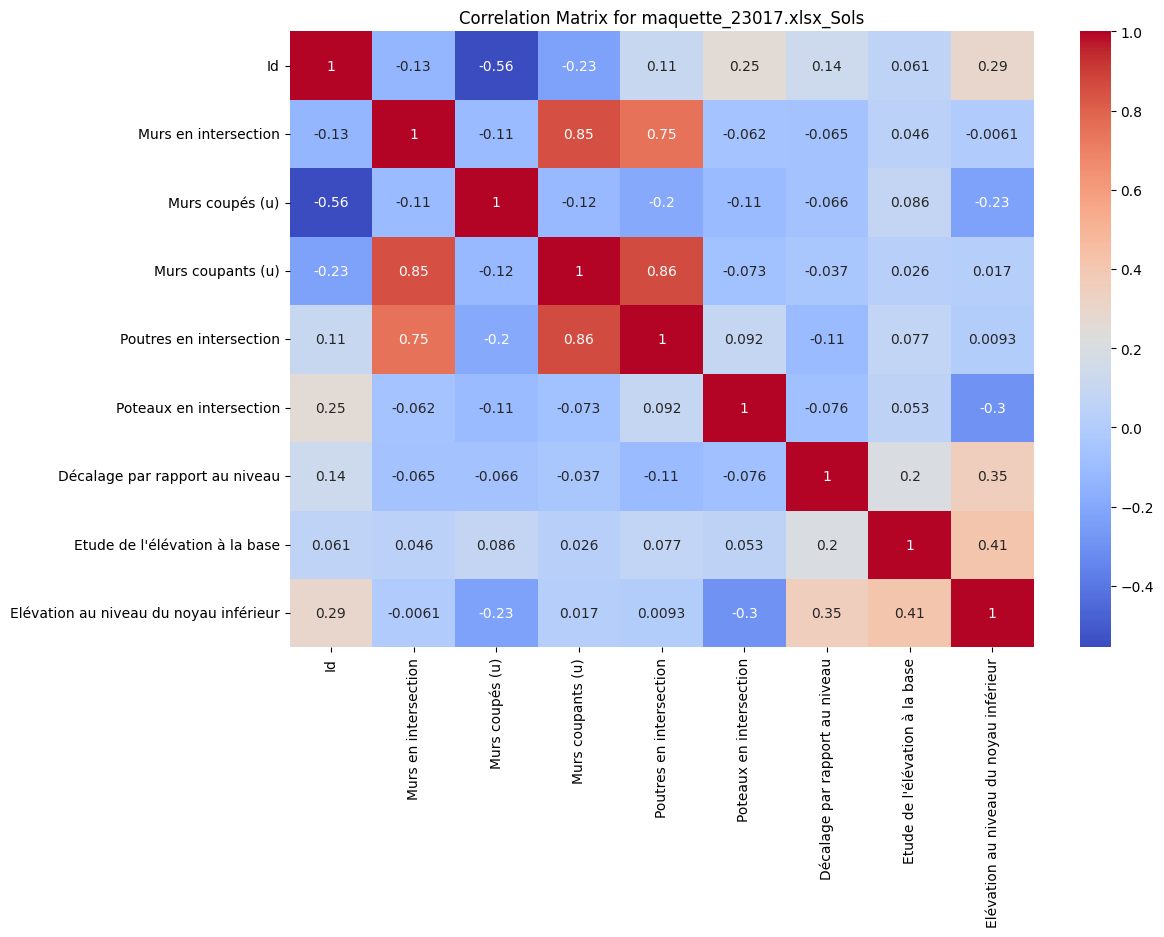

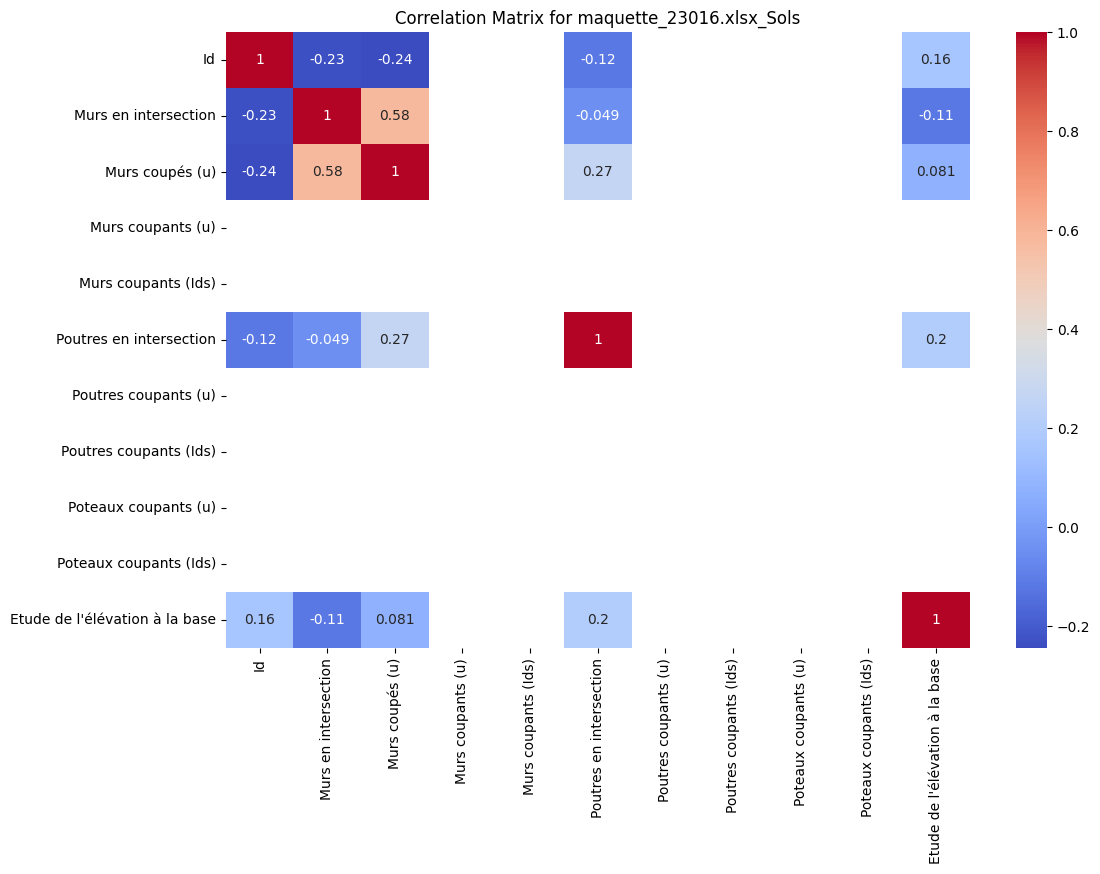

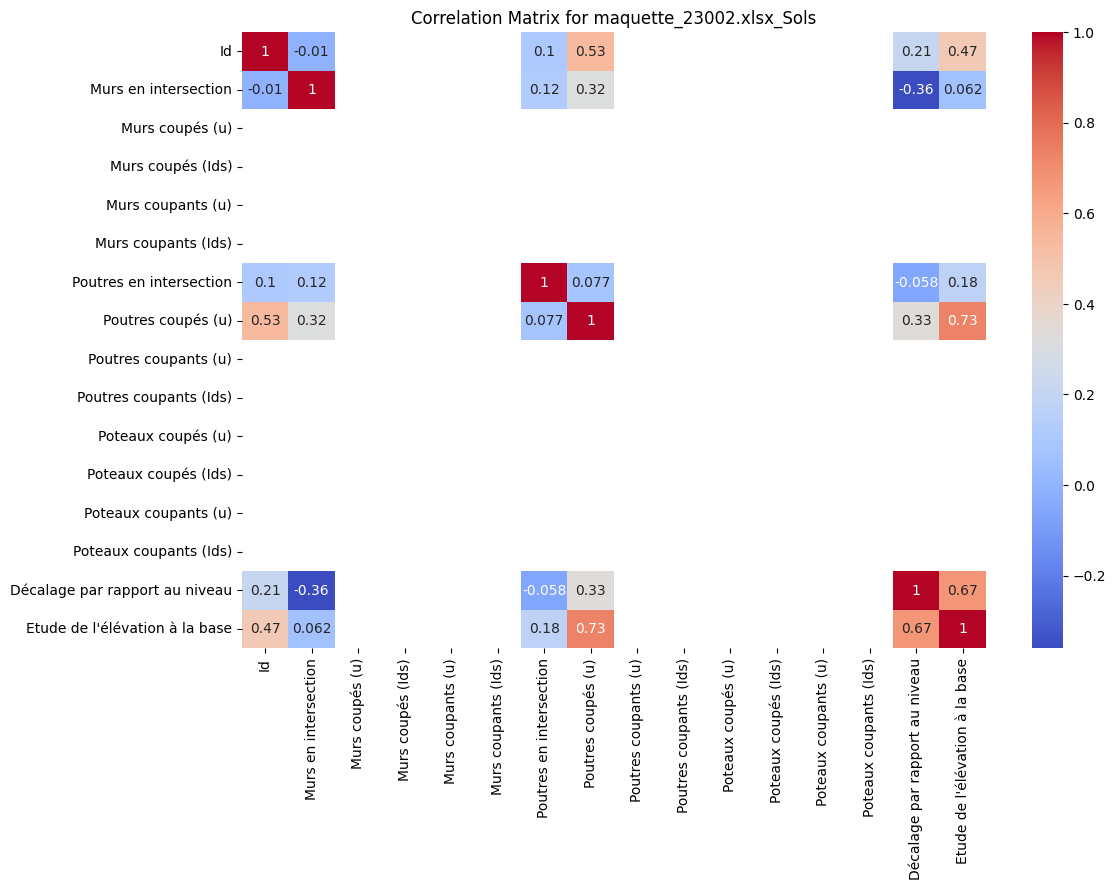

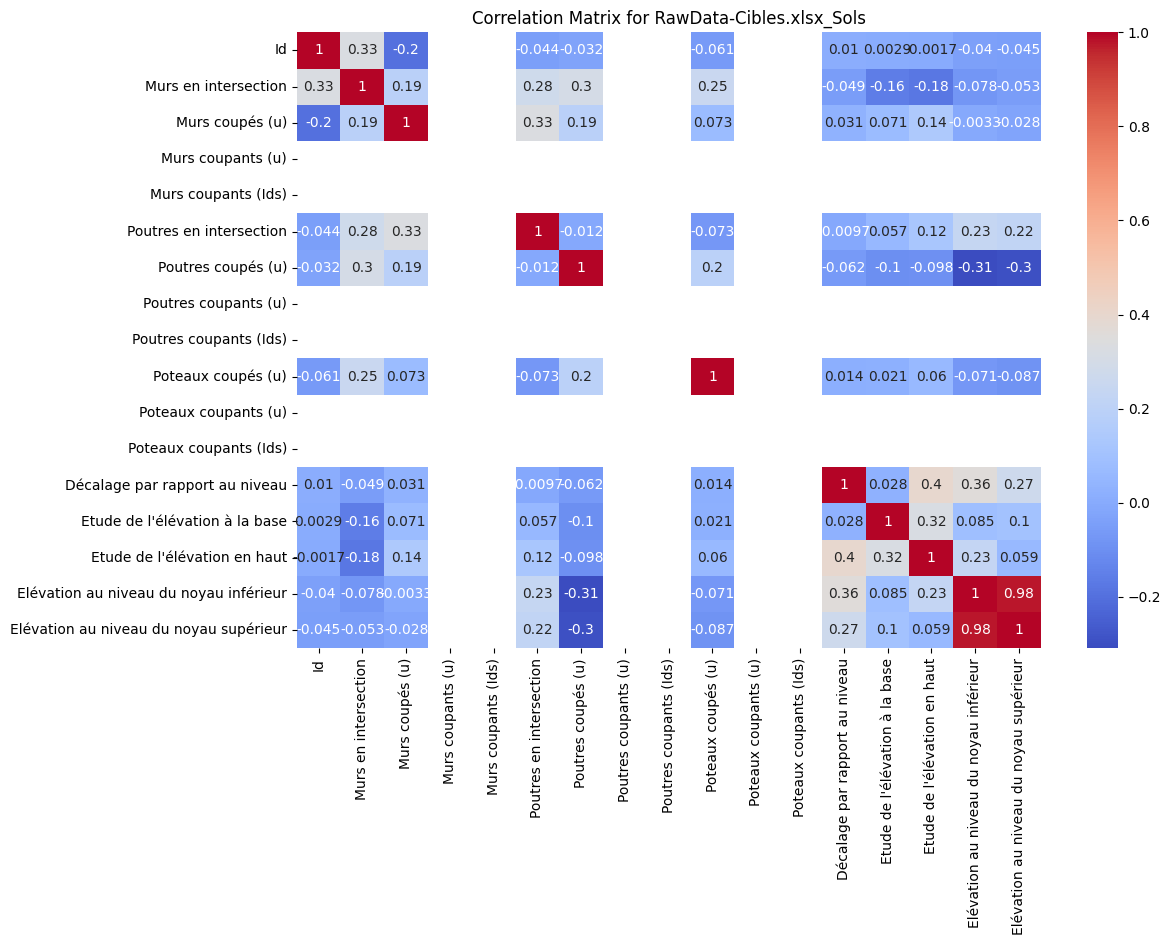

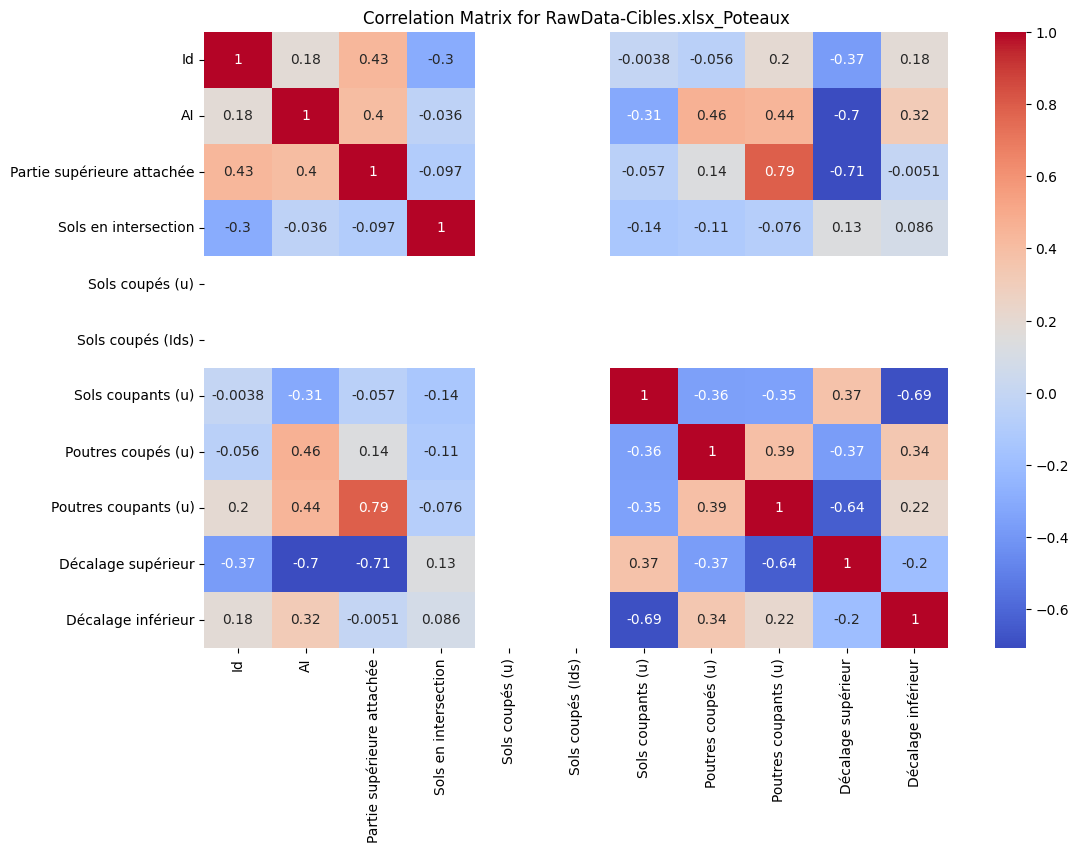

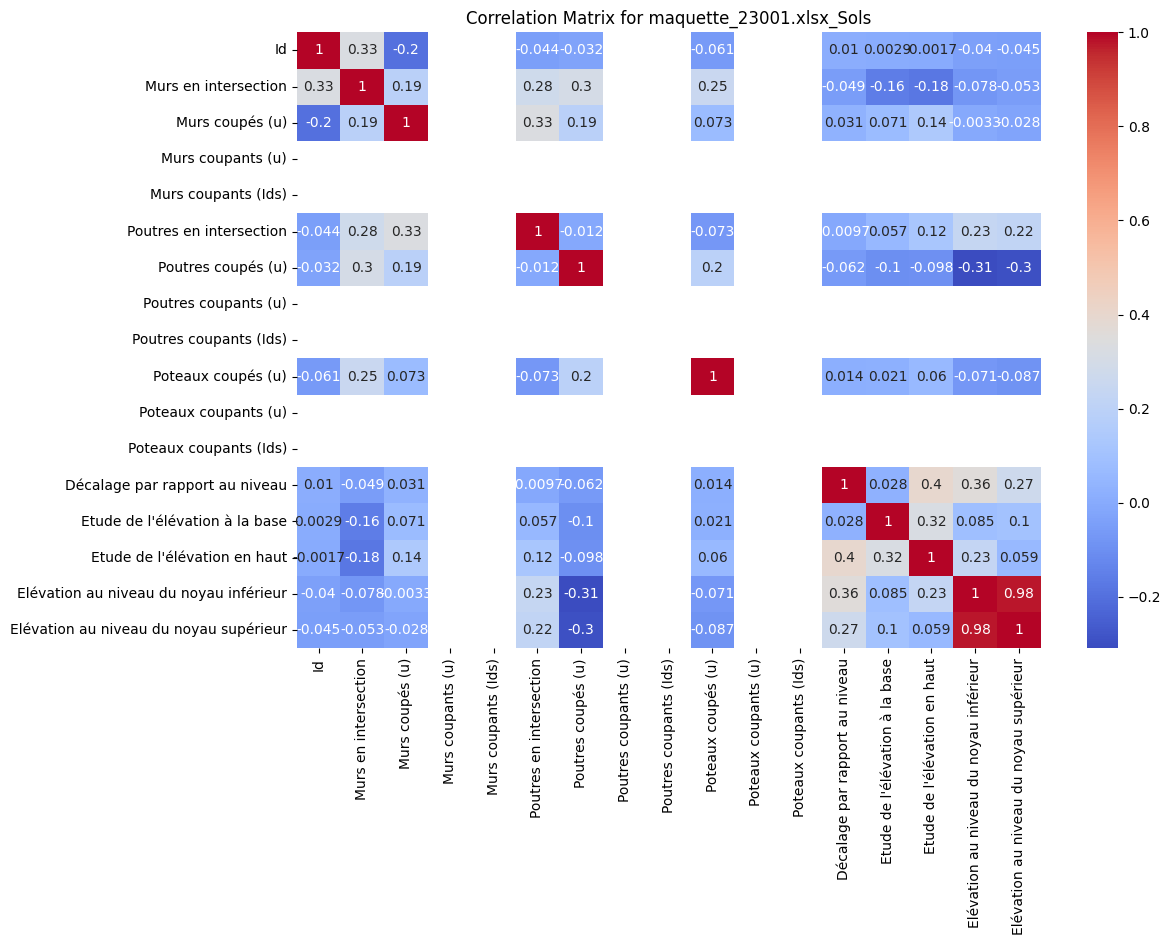

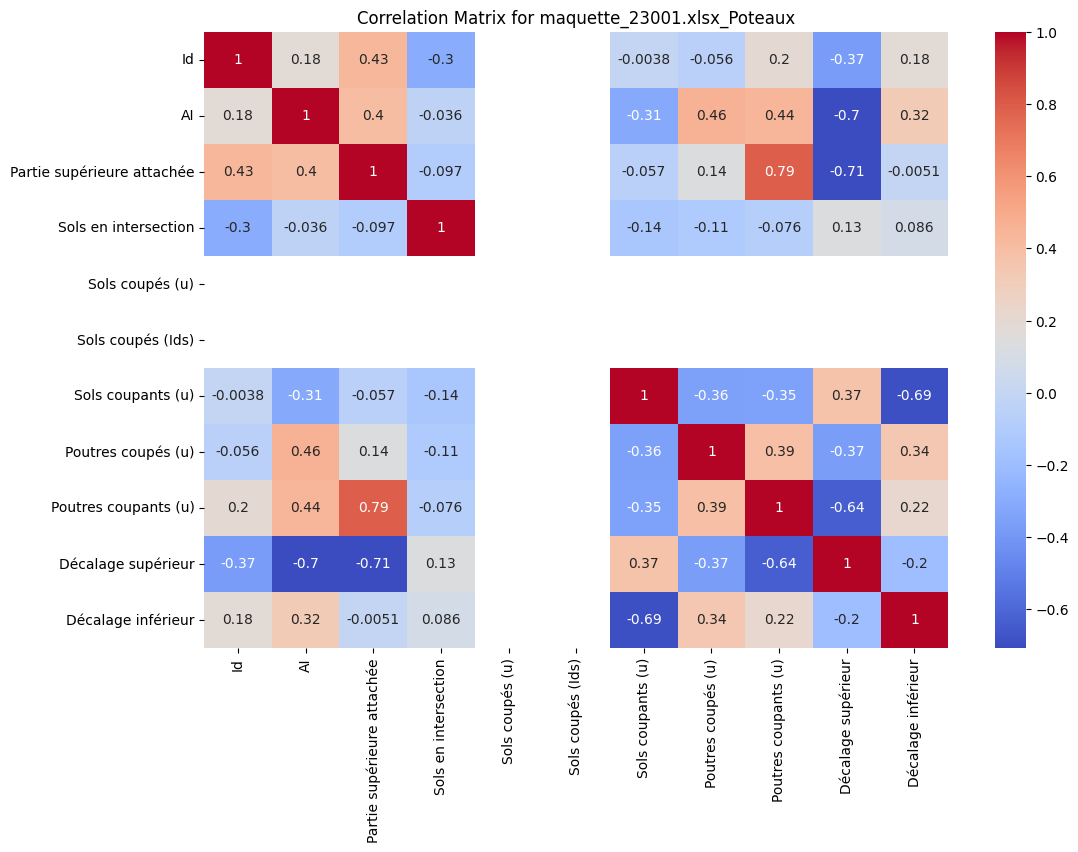

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrices for numeric columns
for df_name, df in final_cleaned_dataframes.items():
    numeric_df = df.select_dtypes(include=["number"])
    correlation_matrix = numeric_df.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title(f"Correlation Matrix for {df_name}")
    plt.show()

In [ ]:
import os

# Ensure base plots directory exists
if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)

# Function to generate subfolder paths for each Excel file
def get_plot_subfolder(file_name):
    subfolder_name = f"{file_name.replace('.xlsx', '').replace('.xls', '')}_Plots"
    subfolder_path = os.path.join(PLOTS_DIR, subfolder_name)

    # Create the subfolder if it doesn't exist
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)

    return subfolder_path

# Save histograms
for df_name, df in cleaned_dataframes.items():
    plt.figure(figsize=(15, 10))
    df.hist(bins=20)
    plt.suptitle(f"Distribution of Features in {df_name}")

    # Extract the corresponding Excel file name
    file_name = df_name.split("_")[0]  # Extracts RawData_Cibles.xlsx from "RawData_Cibles.xlsx_Murs"
    plot_subfolder = get_plot_subfolder(file_name)

    # Define save path
    plot_path = os.path.join(plot_subfolder, f"{df_name}_histogram.png")
    plt.savefig(plot_path)
    print(f"Saved histogram in: {plot_path}")

    plt.close()

# Save correlation matrices
for df_name, df in cleaned_dataframes.items():
    numeric_df = df.select_dtypes(include=["number"])
    correlation_matrix = numeric_df.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title(f"Correlation Matrix for {df_name}")

    # Extract Excel file name and subfolder
    file_name = df_name.split("_")[0]
    plot_subfolder = get_plot_subfolder(file_name)

    # Define save path
    plot_path = os.path.join(plot_subfolder, f"{df_name}_correlation.png")
    plt.savefig(plot_path)
    print(f"Saved correlation matrix in: {plot_path}")

    plt.close()

<!-- ### Feature Selection -->

In [ ]:
# %pip install ipywidgets

In [13]:
# Identify target columns dynamically across all DataFrames
target_columns_found = set()
for df_name, df in final_cleaned_dataframes.items():
    found_targets = [
        col for col in df.columns
        if any(target.lower() in col.lower() for target in TARGET_COLUMNS)
    ]
    target_columns_found.update(found_targets)

print(f"\nTarget columns detected across datasets: {target_columns_found}")


Target columns detected across datasets: {'011EC_Lot', '014EC_Mode Constructif', '013EC_Localisation', '012EC_Ouvrage'}


In [14]:
import os

# Function to generate subfolder paths for storing SHAP plots
def get_plot_subfolder(file_name):
    subfolder_name = f"{file_name}_Plots"
    subfolder_path = os.path.join(PLOTS_DIR, subfolder_name)

    # Create the subfolder if it doesn't exist
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)

    return subfolder_path

# ✅ Ensure SHAP is applied to the fully processed dataset
final_shap_dataframes = final_cleaned_dataframes  # Use the cleaned dataset after variance/correlation removal

print("🚀 SHAP analysis will now use the final processed data!")

for target_column in TARGET_COLUMNS:
    for df_name, df in final_cleaned_dataframes.items():
        # Check if any column in the dataframe contains the target column name as a substring
        matching_columns = [col for col in df.columns if target_column in col]
        if matching_columns:
            unique_values = df[matching_columns[0]].nunique()
            print(f"{target_column} in {df_name} has {unique_values} unique values.")
        else:
            print(f"{target_column} not found in {df_name}.")

🚀 SHAP analysis will now use the final processed data!
011EC_Lot in maquette_23017.xlsx_Sols has 1 unique values.
011EC_Lot in maquette_23016.xlsx_Sols has 1 unique values.
011EC_Lot in maquette_23002.xlsx_Sols has 1 unique values.
011EC_Lot in RawData-Cibles.xlsx_Sols has 1 unique values.
011EC_Lot in RawData-Cibles.xlsx_Poteaux has 1 unique values.
011EC_Lot in maquette_23001.xlsx_Sols has 1 unique values.
011EC_Lot in maquette_23001.xlsx_Poteaux has 1 unique values.
012EC_Ouvrage in maquette_23017.xlsx_Sols has 2 unique values.
012EC_Ouvrage in maquette_23016.xlsx_Sols has 1 unique values.
012EC_Ouvrage in maquette_23002.xlsx_Sols has 2 unique values.
012EC_Ouvrage in RawData-Cibles.xlsx_Sols has 5 unique values.
012EC_Ouvrage in RawData-Cibles.xlsx_Poteaux has 3 unique values.
012EC_Ouvrage in maquette_23001.xlsx_Sols has 5 unique values.
012EC_Ouvrage in maquette_23001.xlsx_Poteaux has 3 unique values.
013EC_Localisation in maquette_23017.xlsx_Sols has 3 unique values.
013EC_Local


Processing SHAP for maquette_23017.xlsx_Sols...
🎯 Target columns found in maquette_23017.xlsx_Sols: {'011EC_Lot', '014EC_Mode Constructif', '013EC_Localisation', '012EC_Ouvrage'}
🔍 Analyzing SHAP for target: 011EC_Lot
📌 Initial shape before SHAP processing: (29, 19)
📊 SHAP values shape: 29, Feature matrix shape: (29, 15)


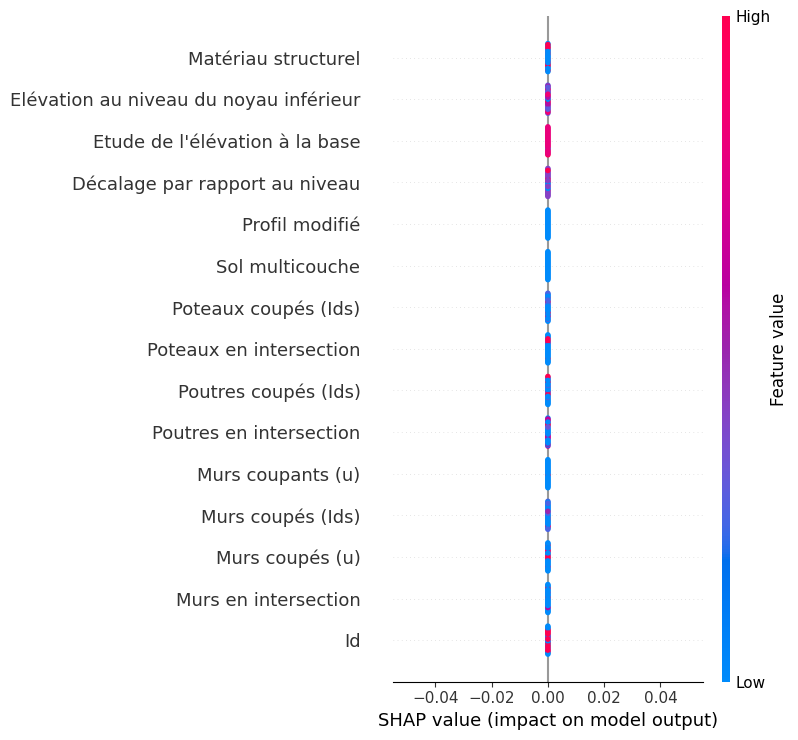

✅ Saved SHAP plot for 011EC_Lot in: plots/SHAP_maquette_23017.xlsx_Sols_Plots/011EC_Lot_SHAP.png
📌 Final shape after SHAP processing: (29, 15)
🔍 Analyzing SHAP for target: 014EC_Mode Constructif
📌 Initial shape before SHAP processing: (29, 19)
📊 SHAP values shape: 29, Feature matrix shape: (29, 15)


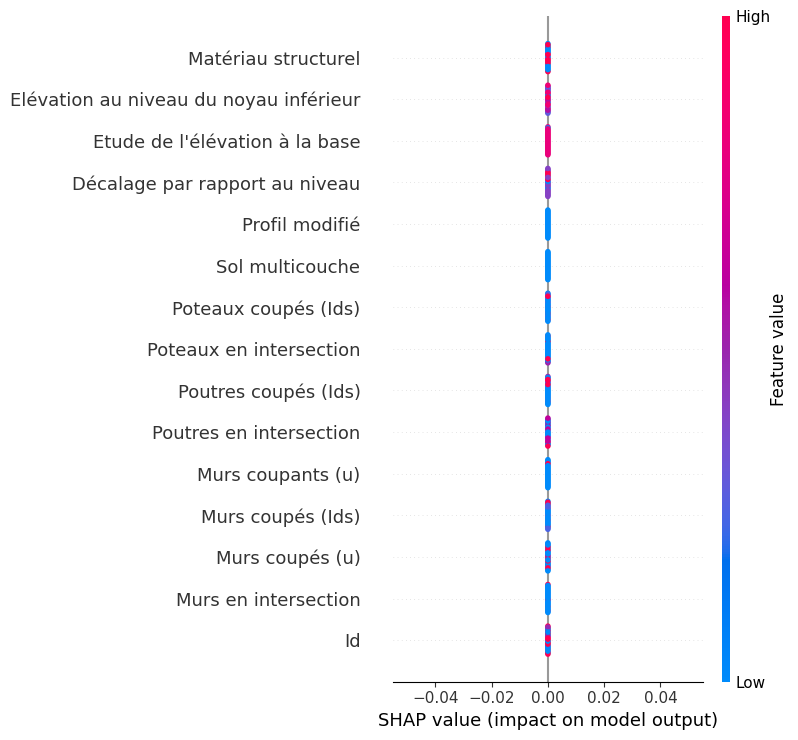

✅ Saved SHAP plot for 014EC_Mode Constructif in: plots/SHAP_maquette_23017.xlsx_Sols_Plots/014EC_Mode Constructif_SHAP.png
📌 Final shape after SHAP processing: (29, 15)
🔍 Analyzing SHAP for target: 013EC_Localisation
📌 Initial shape before SHAP processing: (29, 19)
📊 SHAP values shape: 29, Feature matrix shape: (29, 15)


<Figure size 640x480 with 0 Axes>

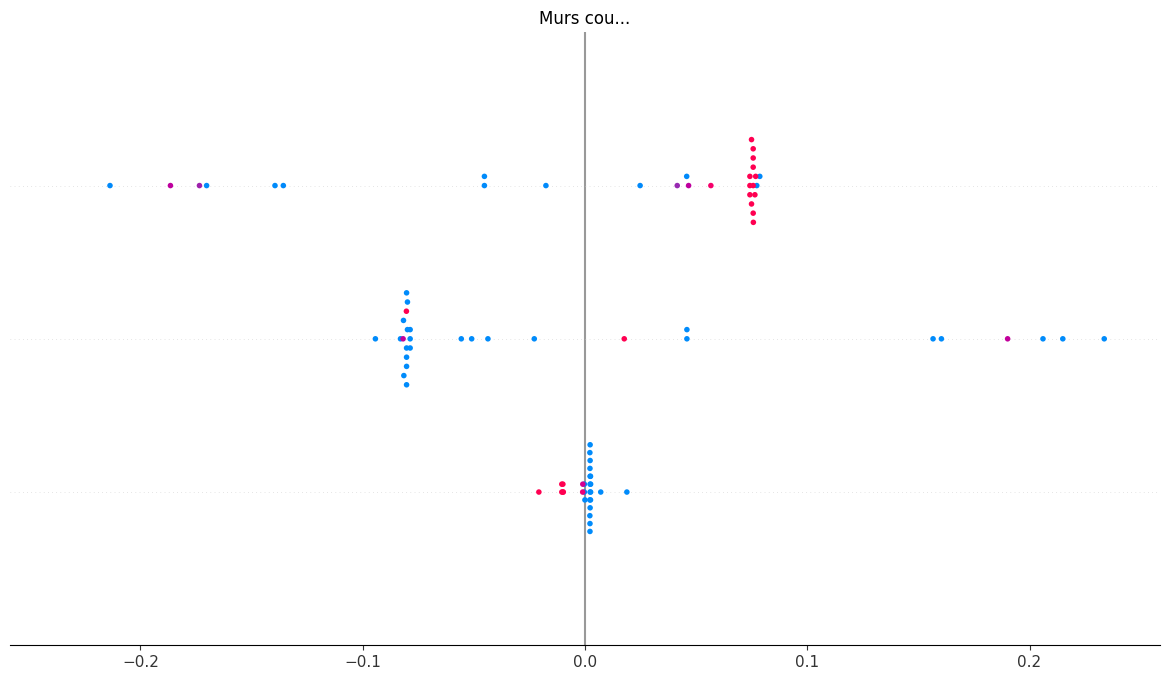

✅ Saved SHAP plot for 013EC_Localisation in: plots/SHAP_maquette_23017.xlsx_Sols_Plots/013EC_Localisation_SHAP.png
📌 Final shape after SHAP processing: (29, 15)
🔍 Analyzing SHAP for target: 012EC_Ouvrage
📌 Initial shape before SHAP processing: (29, 19)
📊 SHAP values shape: 29, Feature matrix shape: (29, 15)


<Figure size 640x480 with 0 Axes>

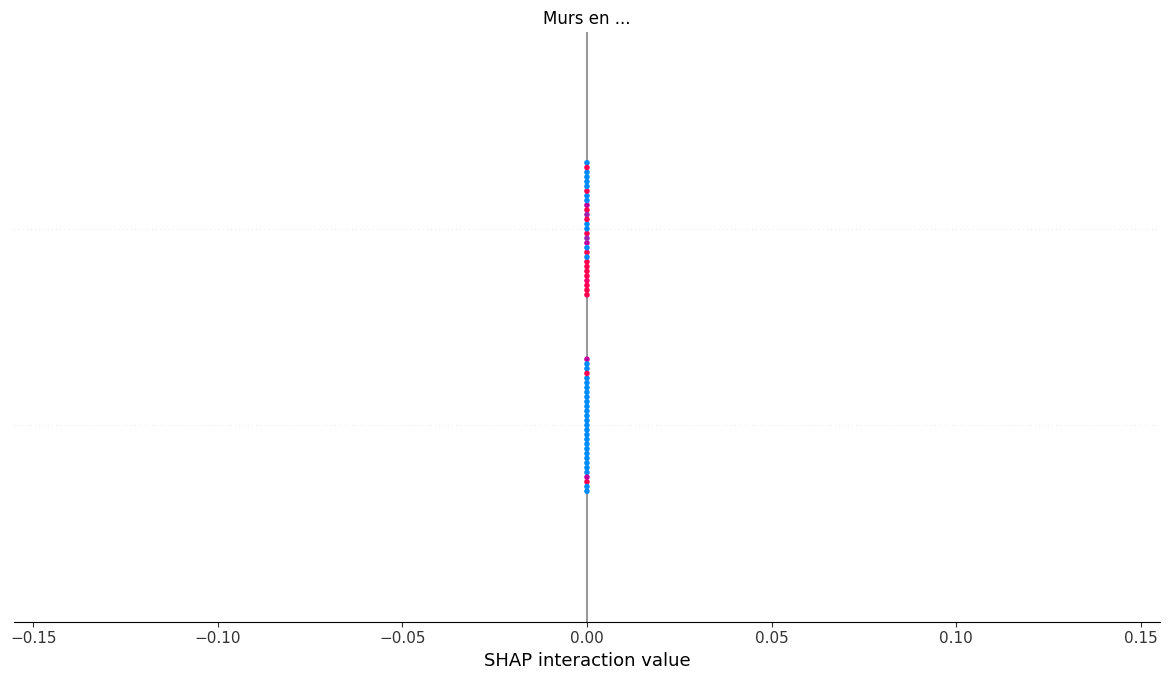

✅ Saved SHAP plot for 012EC_Ouvrage in: plots/SHAP_maquette_23017.xlsx_Sols_Plots/012EC_Ouvrage_SHAP.png
📌 Final shape after SHAP processing: (29, 15)

Processing SHAP for maquette_23016.xlsx_Sols...
🎯 Target columns found in maquette_23016.xlsx_Sols: {'011EC_Lot', '014EC_Mode Constructif', '013EC_Localisation', '012EC_Ouvrage'}
🔍 Analyzing SHAP for target: 011EC_Lot
📌 Initial shape before SHAP processing: (45, 21)
📊 SHAP values shape: 45, Feature matrix shape: (45, 17)


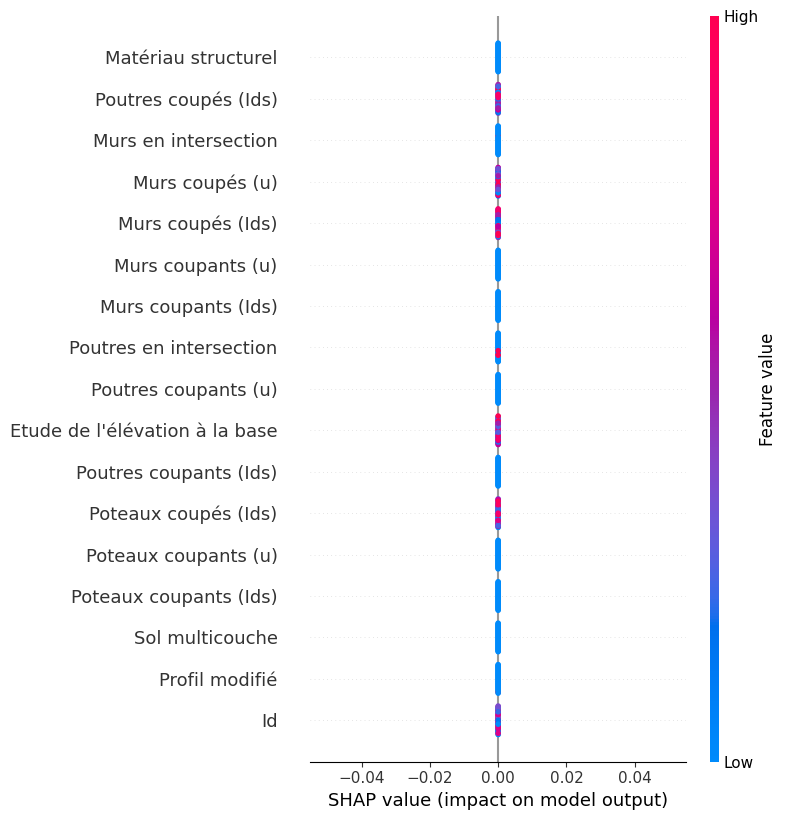

✅ Saved SHAP plot for 011EC_Lot in: plots/SHAP_maquette_23016.xlsx_Sols_Plots/011EC_Lot_SHAP.png
📌 Final shape after SHAP processing: (45, 17)
🔍 Analyzing SHAP for target: 014EC_Mode Constructif
📌 Initial shape before SHAP processing: (45, 21)
📊 SHAP values shape: 45, Feature matrix shape: (45, 17)


<Figure size 640x480 with 0 Axes>

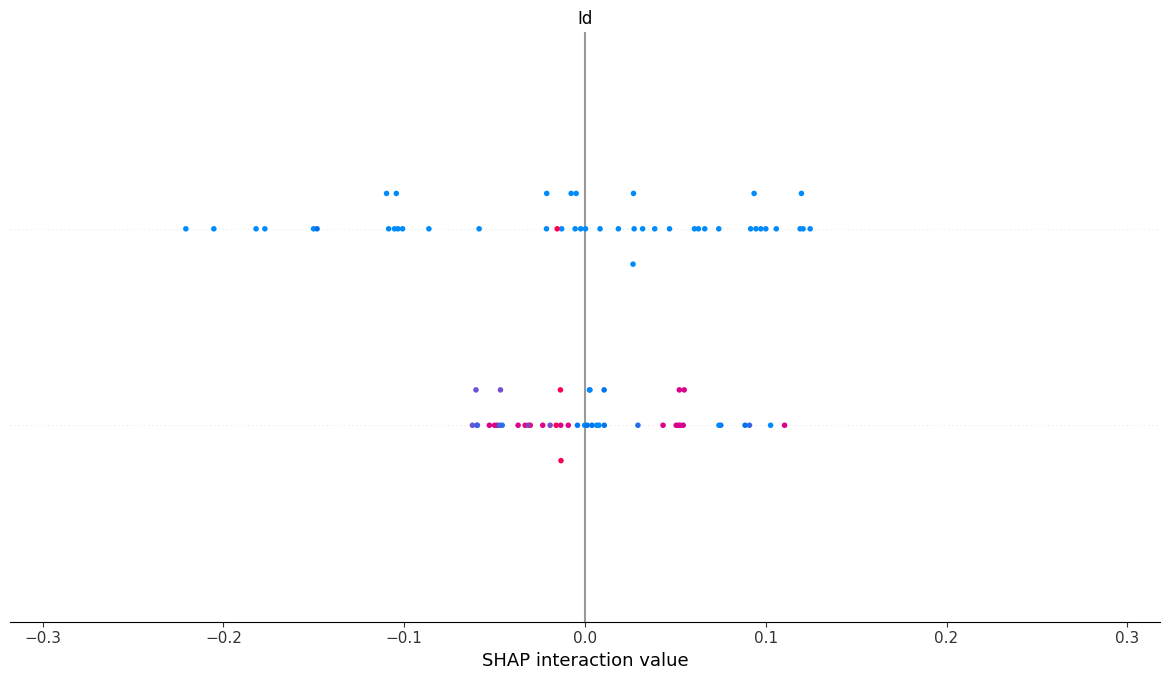

✅ Saved SHAP plot for 014EC_Mode Constructif in: plots/SHAP_maquette_23016.xlsx_Sols_Plots/014EC_Mode Constructif_SHAP.png
📌 Final shape after SHAP processing: (45, 17)
🔍 Analyzing SHAP for target: 013EC_Localisation
📌 Initial shape before SHAP processing: (45, 21)
📊 SHAP values shape: 45, Feature matrix shape: (45, 17)


<Figure size 640x480 with 0 Axes>

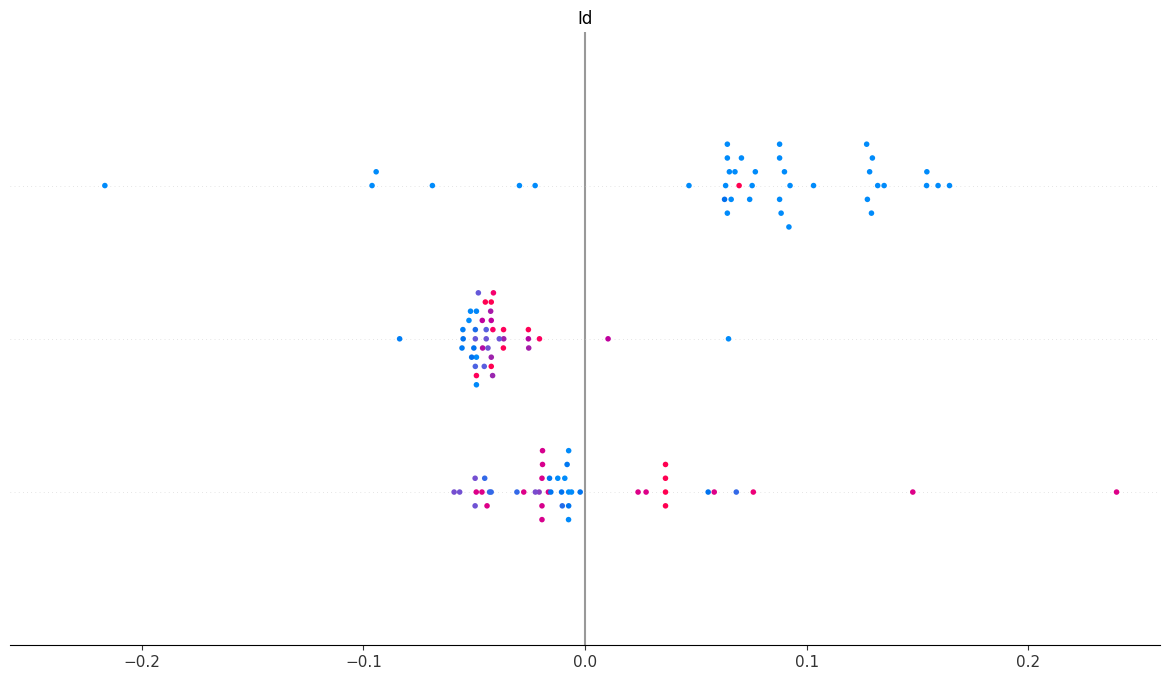

✅ Saved SHAP plot for 013EC_Localisation in: plots/SHAP_maquette_23016.xlsx_Sols_Plots/013EC_Localisation_SHAP.png
📌 Final shape after SHAP processing: (45, 17)
🔍 Analyzing SHAP for target: 012EC_Ouvrage
📌 Initial shape before SHAP processing: (45, 21)
📊 SHAP values shape: 45, Feature matrix shape: (45, 17)


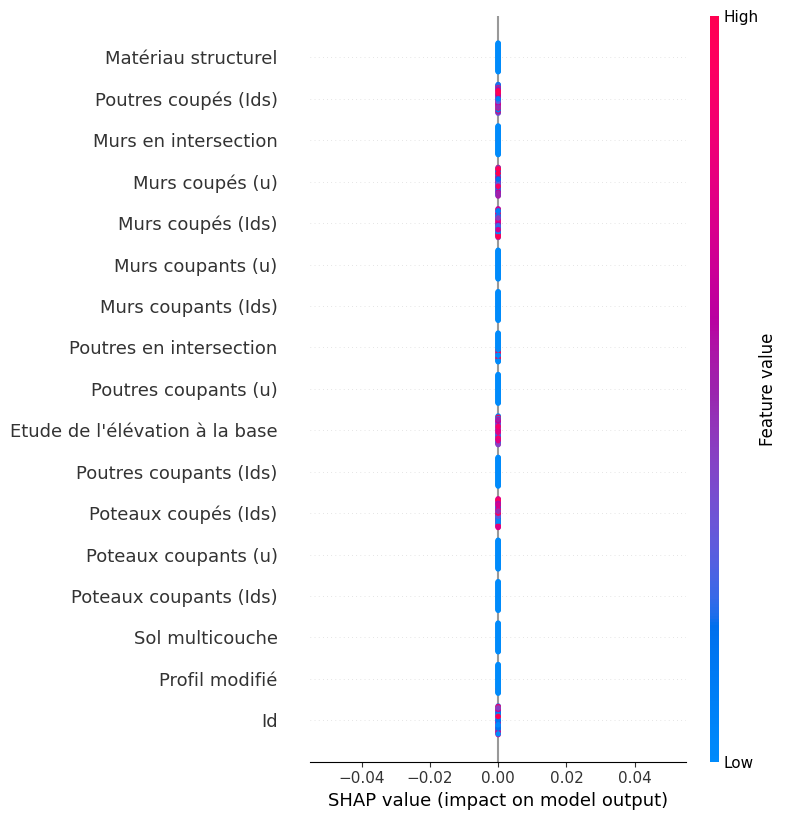

✅ Saved SHAP plot for 012EC_Ouvrage in: plots/SHAP_maquette_23016.xlsx_Sols_Plots/012EC_Ouvrage_SHAP.png
📌 Final shape after SHAP processing: (45, 17)

Processing SHAP for maquette_23002.xlsx_Sols...
🎯 Target columns found in maquette_23002.xlsx_Sols: {'011EC_Lot', '014EC_Mode Constructif', '013EC_Localisation', '012EC_Ouvrage'}
🔍 Analyzing SHAP for target: 011EC_Lot
📌 Initial shape before SHAP processing: (32, 24)
📊 SHAP values shape: 32, Feature matrix shape: (32, 20)


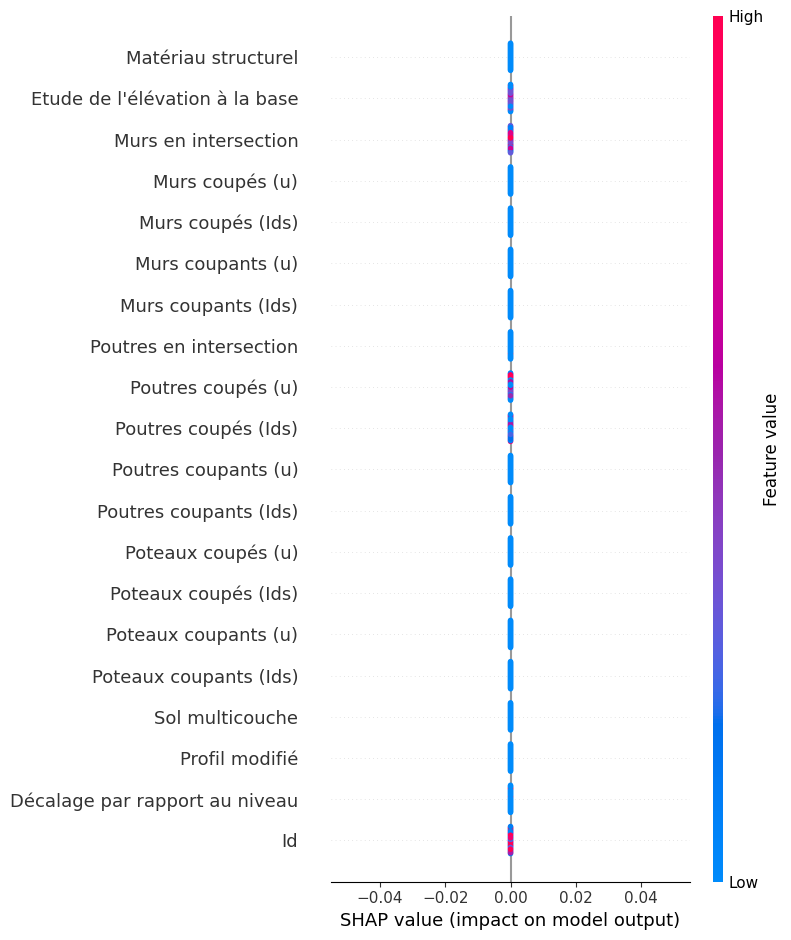

✅ Saved SHAP plot for 011EC_Lot in: plots/SHAP_maquette_23002.xlsx_Sols_Plots/011EC_Lot_SHAP.png
📌 Final shape after SHAP processing: (32, 20)
🔍 Analyzing SHAP for target: 014EC_Mode Constructif
📌 Initial shape before SHAP processing: (32, 24)
📊 SHAP values shape: 32, Feature matrix shape: (32, 20)


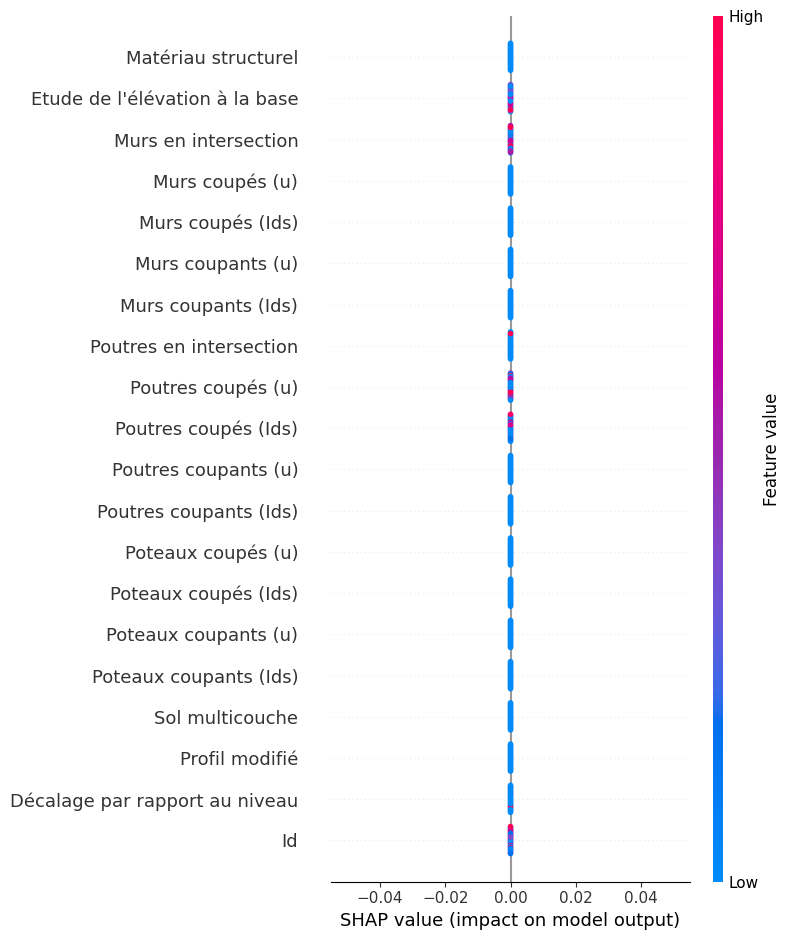

✅ Saved SHAP plot for 014EC_Mode Constructif in: plots/SHAP_maquette_23002.xlsx_Sols_Plots/014EC_Mode Constructif_SHAP.png
📌 Final shape after SHAP processing: (32, 20)
🔍 Analyzing SHAP for target: 013EC_Localisation
📌 Initial shape before SHAP processing: (32, 24)
📊 SHAP values shape: 32, Feature matrix shape: (32, 20)


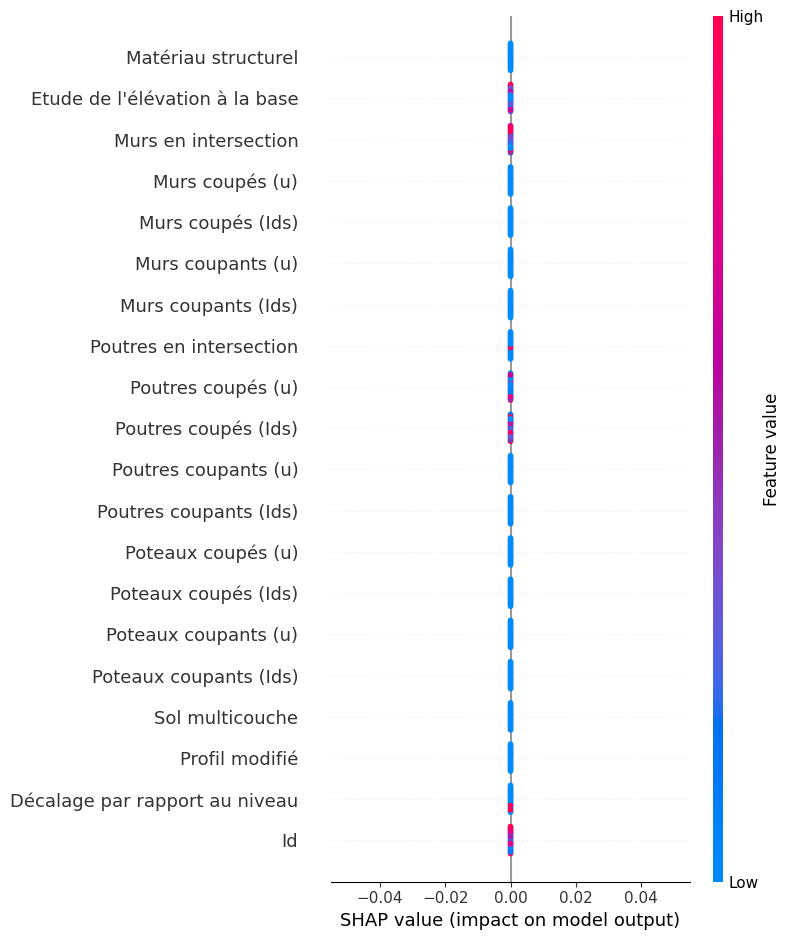

✅ Saved SHAP plot for 013EC_Localisation in: plots/SHAP_maquette_23002.xlsx_Sols_Plots/013EC_Localisation_SHAP.png
📌 Final shape after SHAP processing: (32, 20)
🔍 Analyzing SHAP for target: 012EC_Ouvrage
📌 Initial shape before SHAP processing: (32, 24)
📊 SHAP values shape: 32, Feature matrix shape: (32, 20)


<Figure size 640x480 with 0 Axes>

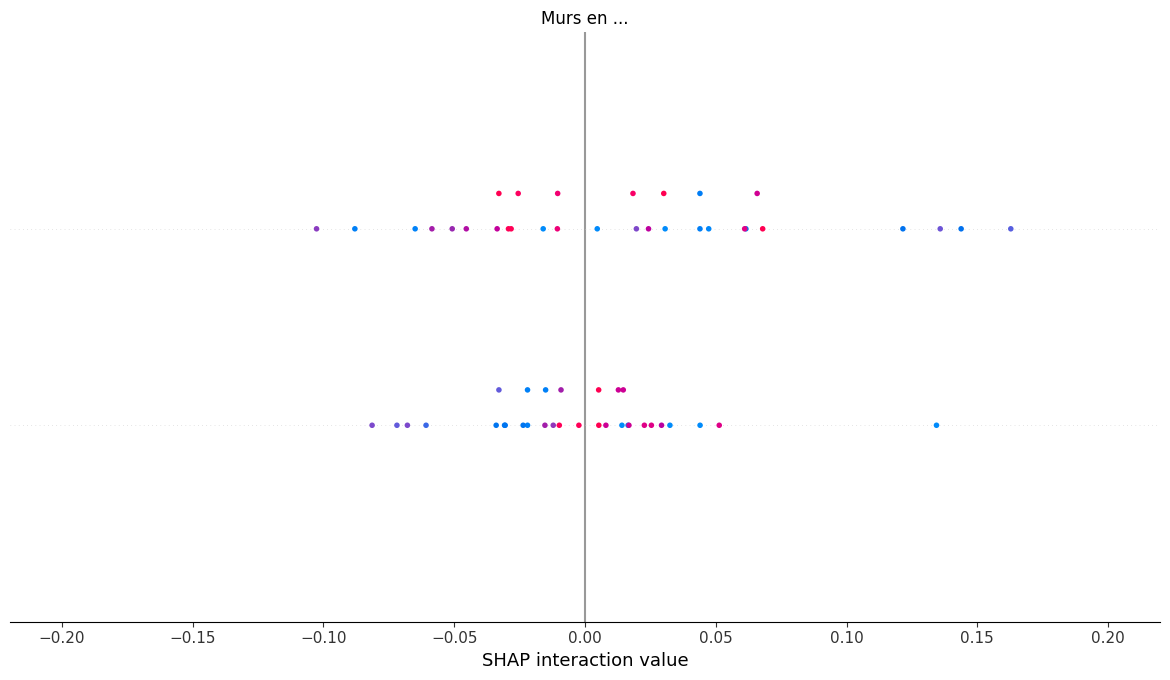

✅ Saved SHAP plot for 012EC_Ouvrage in: plots/SHAP_maquette_23002.xlsx_Sols_Plots/012EC_Ouvrage_SHAP.png
📌 Final shape after SHAP processing: (32, 20)

Processing SHAP for RawData-Cibles.xlsx_Sols...
🎯 Target columns found in RawData-Cibles.xlsx_Sols: {'011EC_Lot', '014EC_Mode Constructif', '013EC_Localisation', '012EC_Ouvrage'}
🔍 Analyzing SHAP for target: 011EC_Lot
📌 Initial shape before SHAP processing: (107, 27)
📊 SHAP values shape: 107, Feature matrix shape: (107, 23)


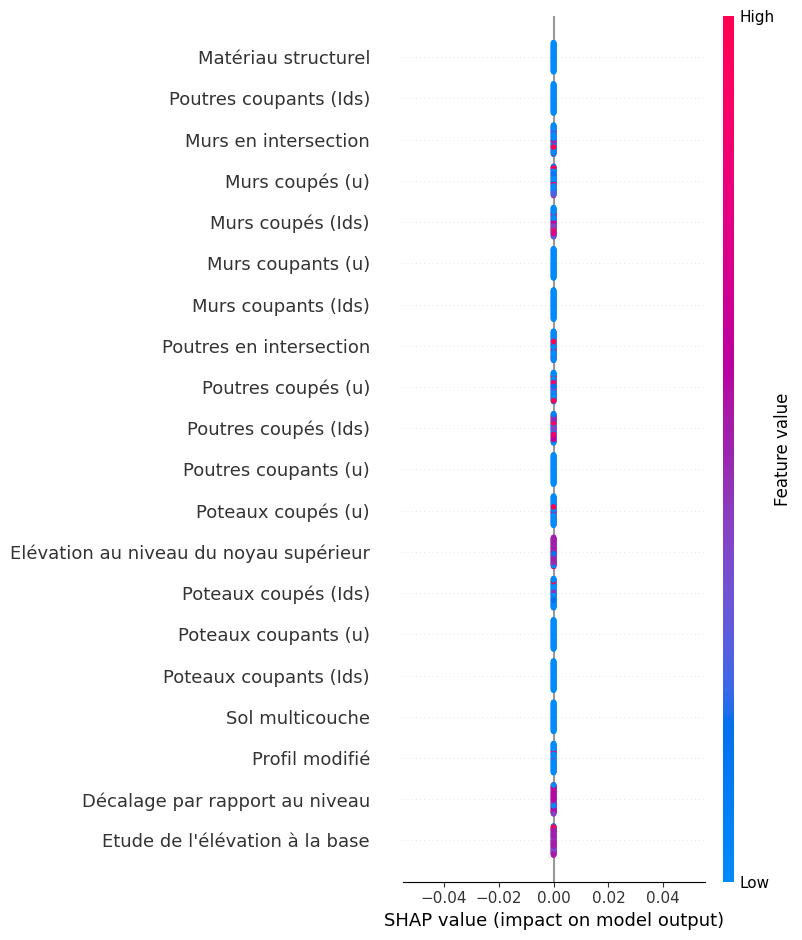

✅ Saved SHAP plot for 011EC_Lot in: plots/SHAP_RawData-Cibles.xlsx_Sols_Plots/011EC_Lot_SHAP.png
📌 Final shape after SHAP processing: (107, 23)
🔍 Analyzing SHAP for target: 014EC_Mode Constructif
📌 Initial shape before SHAP processing: (107, 27)
📊 SHAP values shape: 107, Feature matrix shape: (107, 23)


<Figure size 640x480 with 0 Axes>

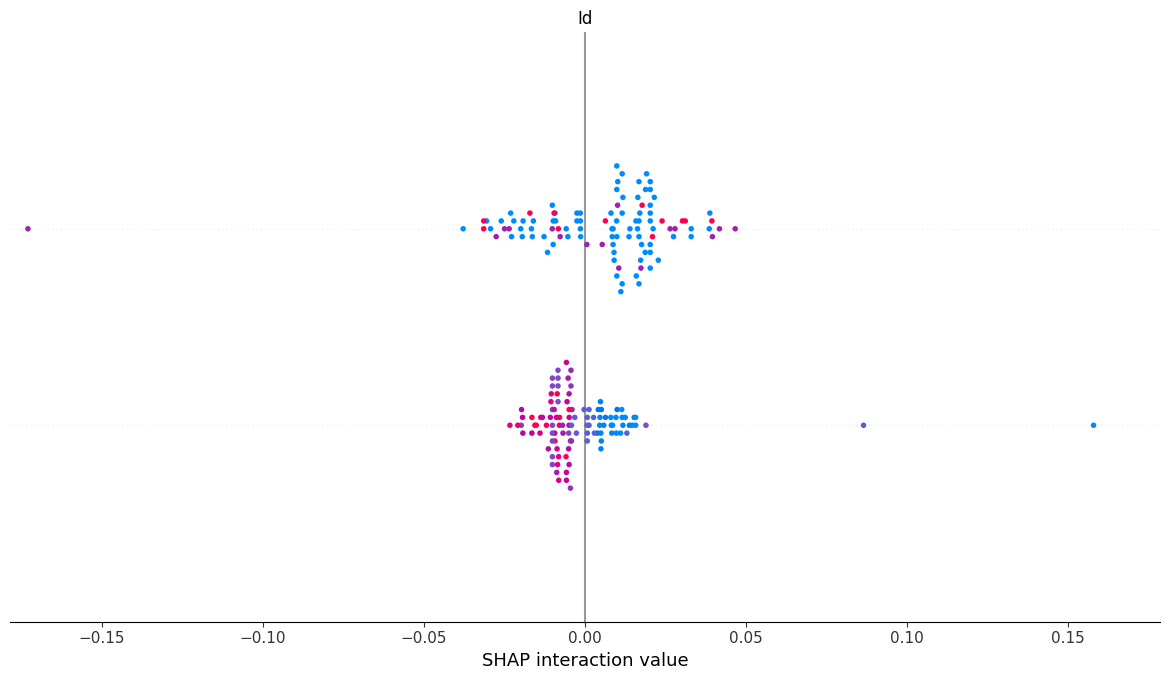

✅ Saved SHAP plot for 014EC_Mode Constructif in: plots/SHAP_RawData-Cibles.xlsx_Sols_Plots/014EC_Mode Constructif_SHAP.png
📌 Final shape after SHAP processing: (107, 23)
🔍 Analyzing SHAP for target: 013EC_Localisation
📌 Initial shape before SHAP processing: (107, 27)
📊 SHAP values shape: 107, Feature matrix shape: (107, 23)


<Figure size 640x480 with 0 Axes>

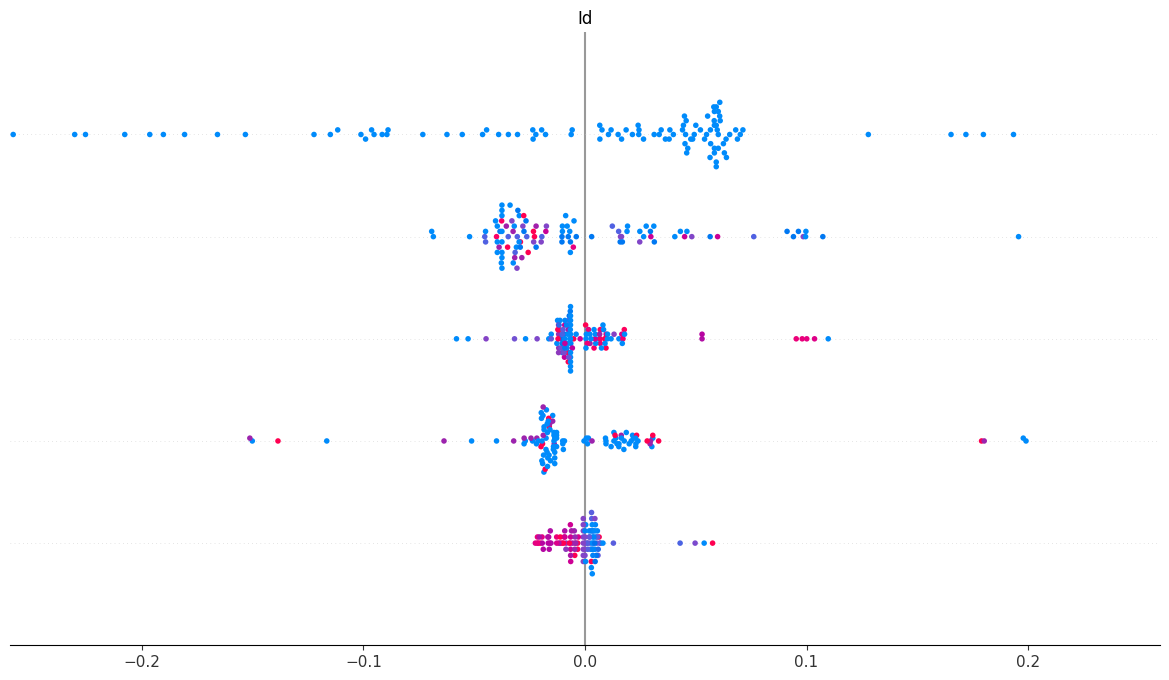

✅ Saved SHAP plot for 013EC_Localisation in: plots/SHAP_RawData-Cibles.xlsx_Sols_Plots/013EC_Localisation_SHAP.png
📌 Final shape after SHAP processing: (107, 23)
🔍 Analyzing SHAP for target: 012EC_Ouvrage
📌 Initial shape before SHAP processing: (107, 27)
📊 SHAP values shape: 107, Feature matrix shape: (107, 23)


<Figure size 640x480 with 0 Axes>

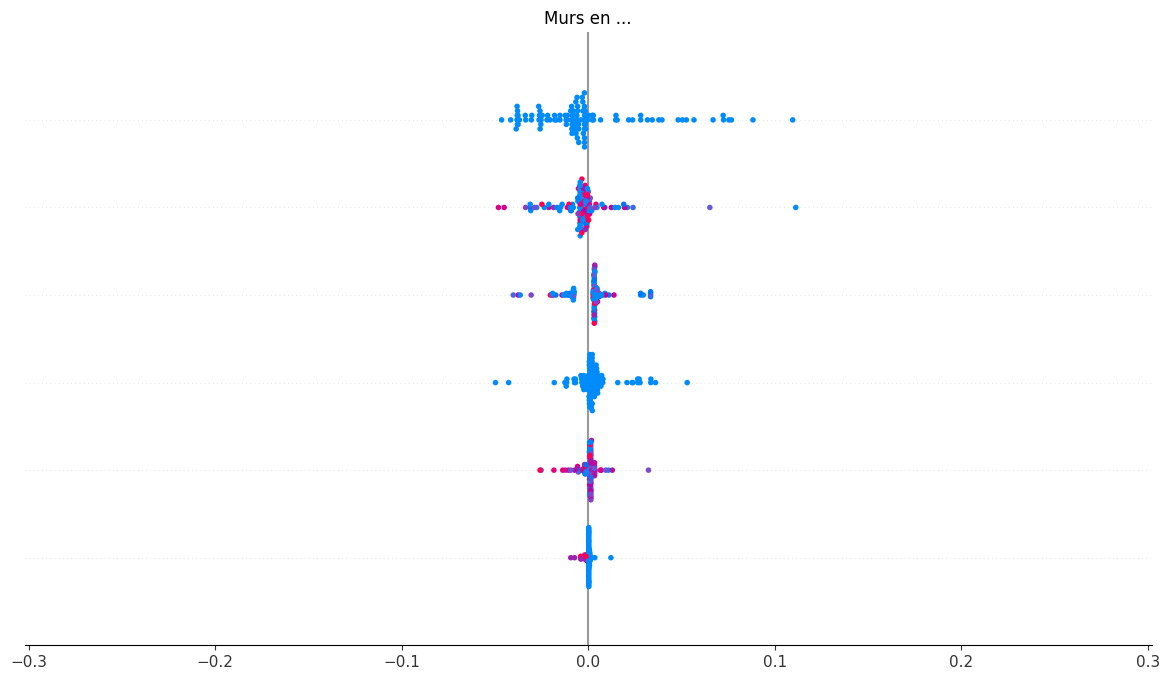

✅ Saved SHAP plot for 012EC_Ouvrage in: plots/SHAP_RawData-Cibles.xlsx_Sols_Plots/012EC_Ouvrage_SHAP.png
📌 Final shape after SHAP processing: (107, 23)

Processing SHAP for RawData-Cibles.xlsx_Poteaux...
🎯 Target columns found in RawData-Cibles.xlsx_Poteaux: {'011EC_Lot', '014EC_Mode Constructif', '013EC_Localisation', '012EC_Ouvrage'}
🔍 Analyzing SHAP for target: 011EC_Lot
📌 Initial shape before SHAP processing: (68, 18)
📊 SHAP values shape: 68, Feature matrix shape: (68, 14)


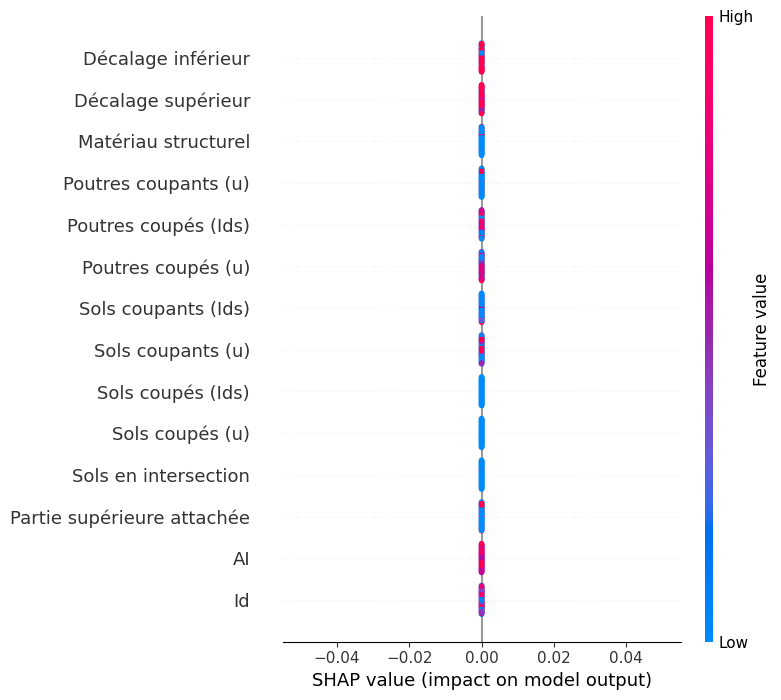

✅ Saved SHAP plot for 011EC_Lot in: plots/SHAP_RawData-Cibles.xlsx_Poteaux_Plots/011EC_Lot_SHAP.png
📌 Final shape after SHAP processing: (68, 14)
🔍 Analyzing SHAP for target: 014EC_Mode Constructif
📌 Initial shape before SHAP processing: (68, 18)
📊 SHAP values shape: 68, Feature matrix shape: (68, 14)


<Figure size 640x480 with 0 Axes>

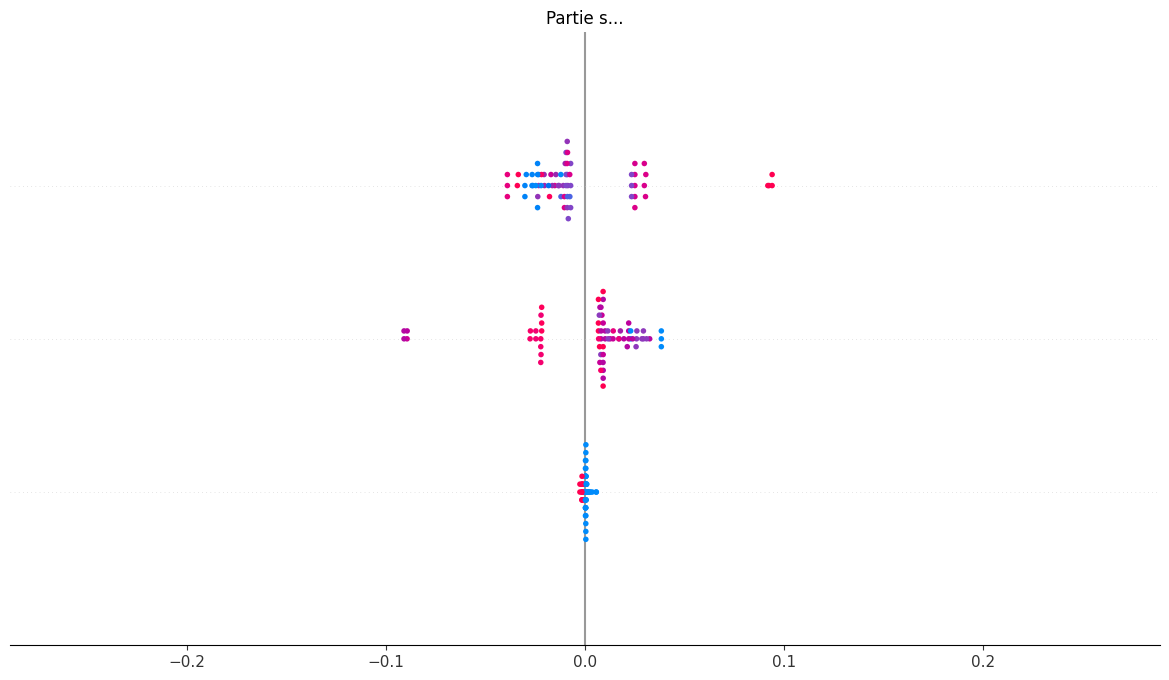

✅ Saved SHAP plot for 014EC_Mode Constructif in: plots/SHAP_RawData-Cibles.xlsx_Poteaux_Plots/014EC_Mode Constructif_SHAP.png
📌 Final shape after SHAP processing: (68, 14)
🔍 Analyzing SHAP for target: 013EC_Localisation
📌 Initial shape before SHAP processing: (68, 18)
📊 SHAP values shape: 68, Feature matrix shape: (68, 14)


<Figure size 640x480 with 0 Axes>

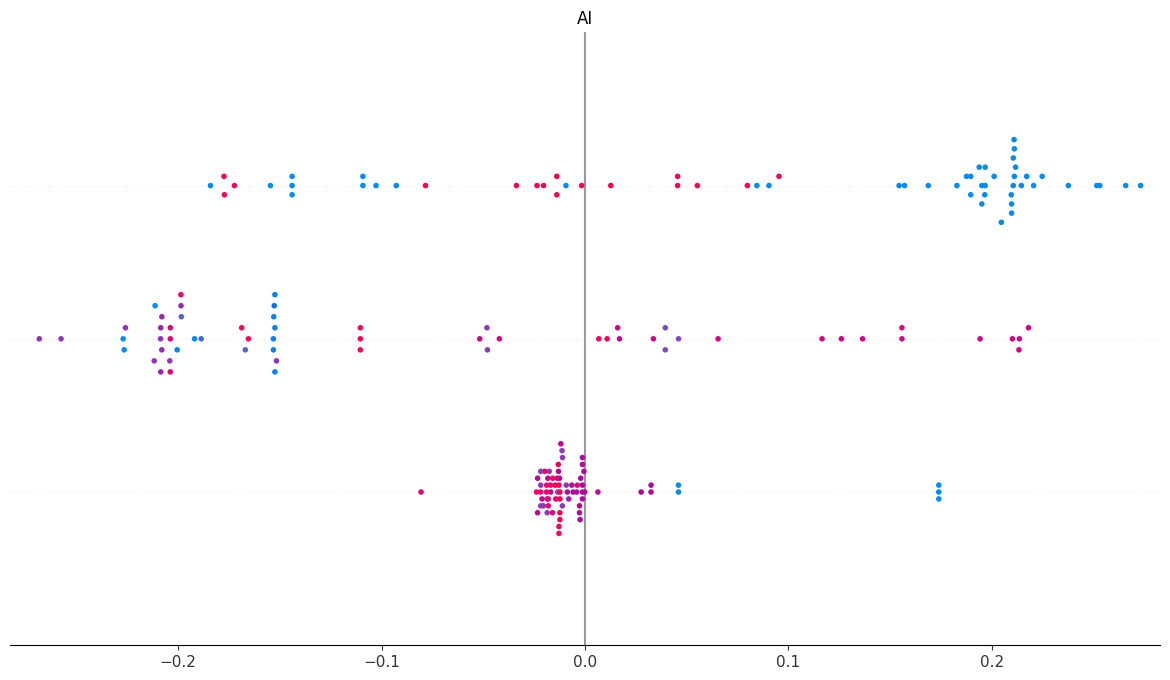

✅ Saved SHAP plot for 013EC_Localisation in: plots/SHAP_RawData-Cibles.xlsx_Poteaux_Plots/013EC_Localisation_SHAP.png
📌 Final shape after SHAP processing: (68, 14)
🔍 Analyzing SHAP for target: 012EC_Ouvrage
📌 Initial shape before SHAP processing: (68, 18)
📊 SHAP values shape: 68, Feature matrix shape: (68, 14)


<Figure size 640x480 with 0 Axes>

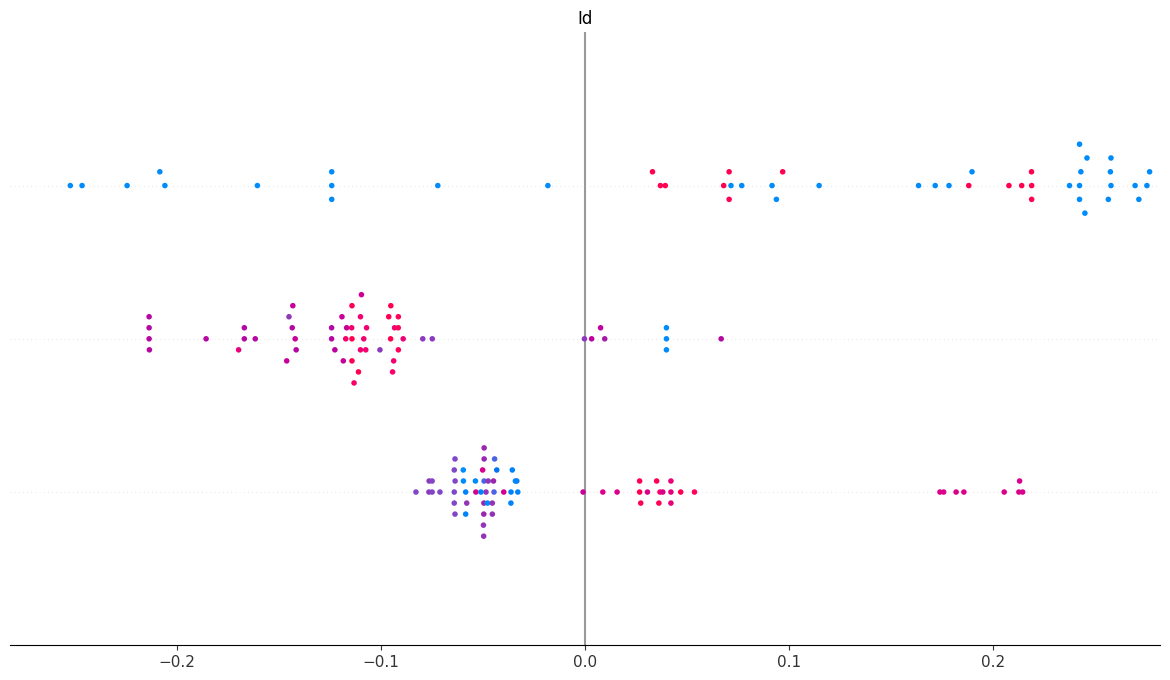

✅ Saved SHAP plot for 012EC_Ouvrage in: plots/SHAP_RawData-Cibles.xlsx_Poteaux_Plots/012EC_Ouvrage_SHAP.png
📌 Final shape after SHAP processing: (68, 14)

Processing SHAP for maquette_23001.xlsx_Sols...
🎯 Target columns found in maquette_23001.xlsx_Sols: {'011EC_Lot', '014EC_Mode Constructif', '013EC_Localisation', '012EC_Ouvrage'}
🔍 Analyzing SHAP for target: 011EC_Lot
📌 Initial shape before SHAP processing: (107, 27)
📊 SHAP values shape: 107, Feature matrix shape: (107, 23)


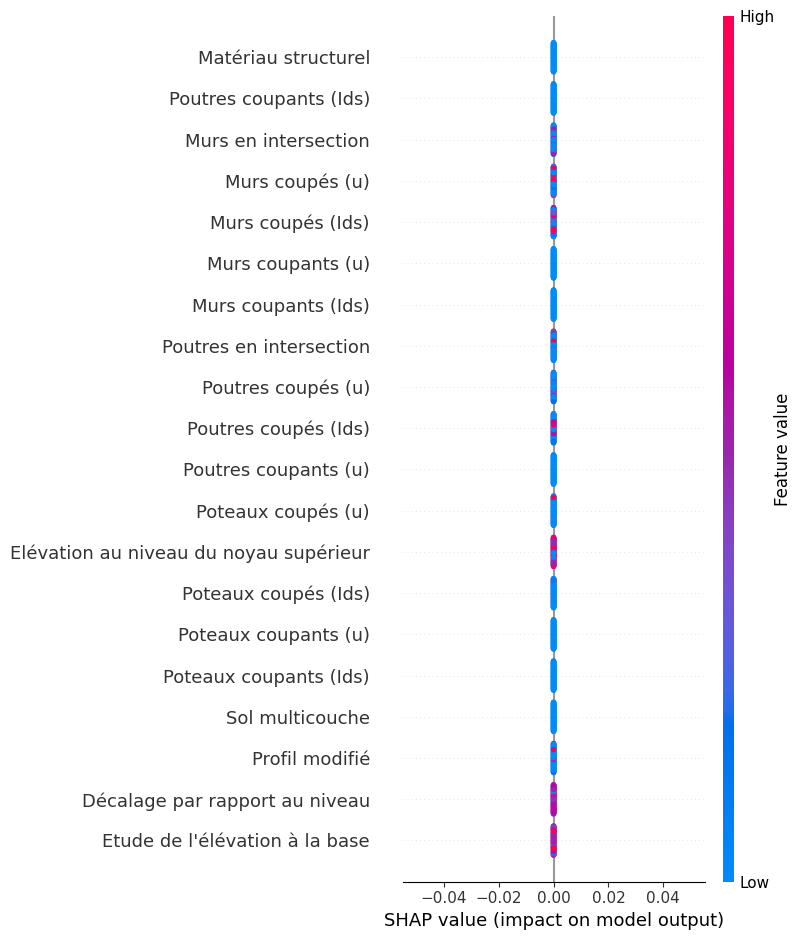

✅ Saved SHAP plot for 011EC_Lot in: plots/SHAP_maquette_23001.xlsx_Sols_Plots/011EC_Lot_SHAP.png
📌 Final shape after SHAP processing: (107, 23)
🔍 Analyzing SHAP for target: 014EC_Mode Constructif
📌 Initial shape before SHAP processing: (107, 27)
📊 SHAP values shape: 107, Feature matrix shape: (107, 23)


<Figure size 640x480 with 0 Axes>

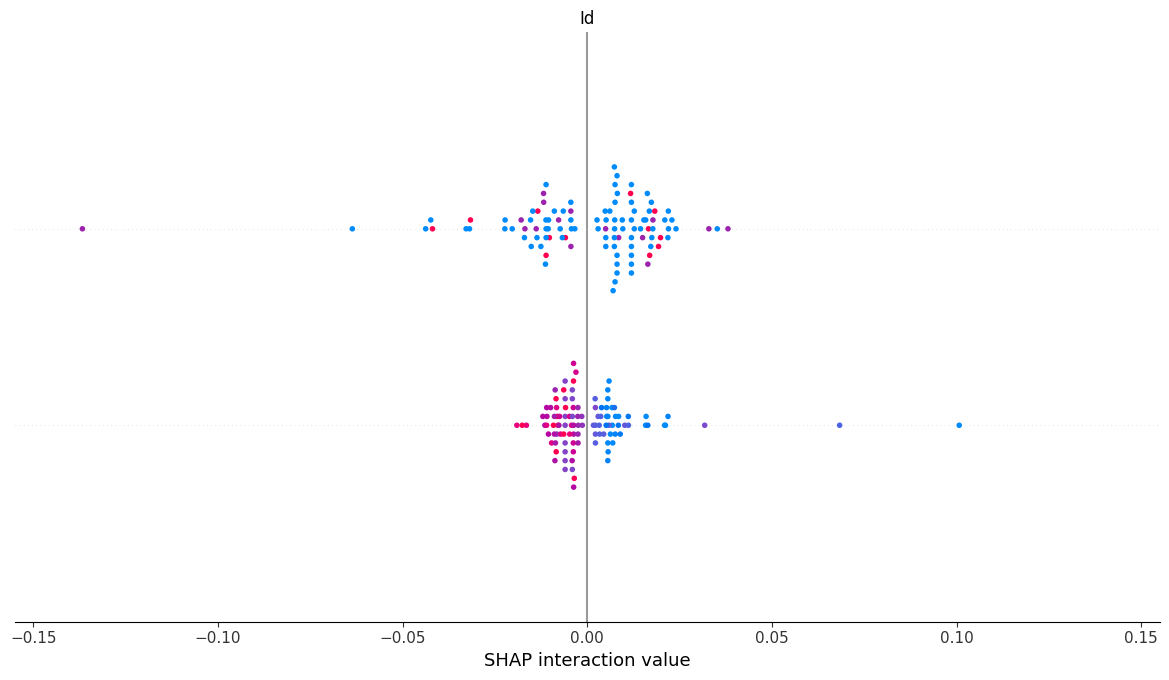

✅ Saved SHAP plot for 014EC_Mode Constructif in: plots/SHAP_maquette_23001.xlsx_Sols_Plots/014EC_Mode Constructif_SHAP.png
📌 Final shape after SHAP processing: (107, 23)
🔍 Analyzing SHAP for target: 013EC_Localisation
📌 Initial shape before SHAP processing: (107, 27)
📊 SHAP values shape: 107, Feature matrix shape: (107, 23)


<Figure size 640x480 with 0 Axes>

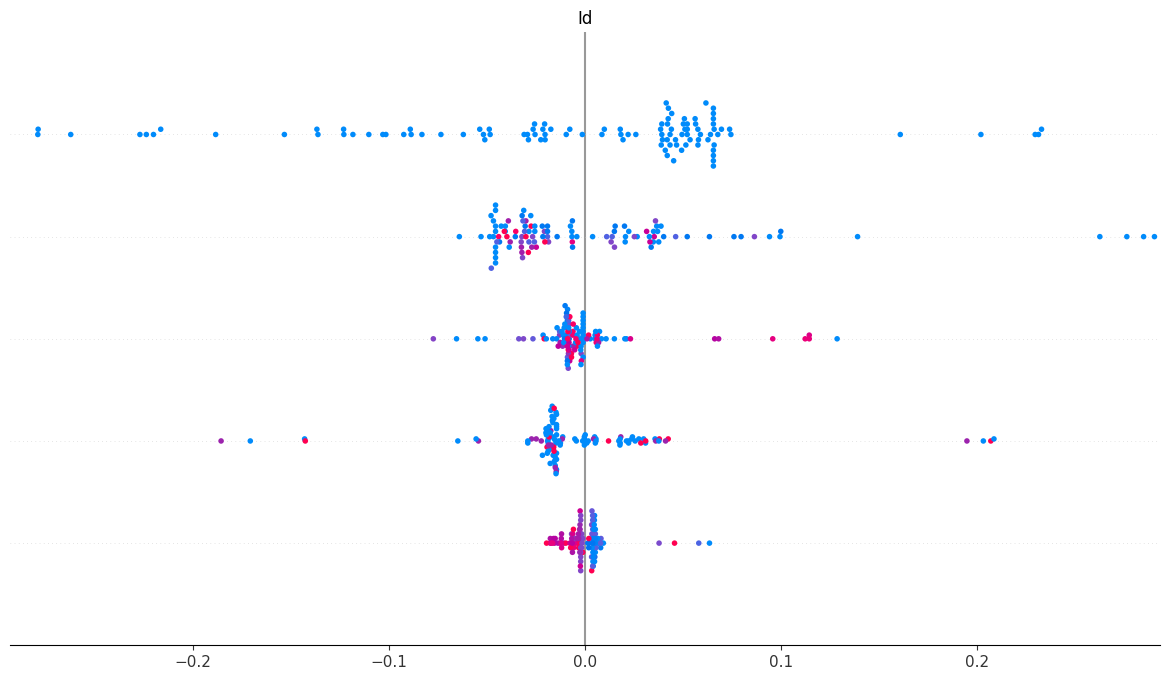

✅ Saved SHAP plot for 013EC_Localisation in: plots/SHAP_maquette_23001.xlsx_Sols_Plots/013EC_Localisation_SHAP.png
📌 Final shape after SHAP processing: (107, 23)
🔍 Analyzing SHAP for target: 012EC_Ouvrage
📌 Initial shape before SHAP processing: (107, 27)
📊 SHAP values shape: 107, Feature matrix shape: (107, 23)


<Figure size 640x480 with 0 Axes>

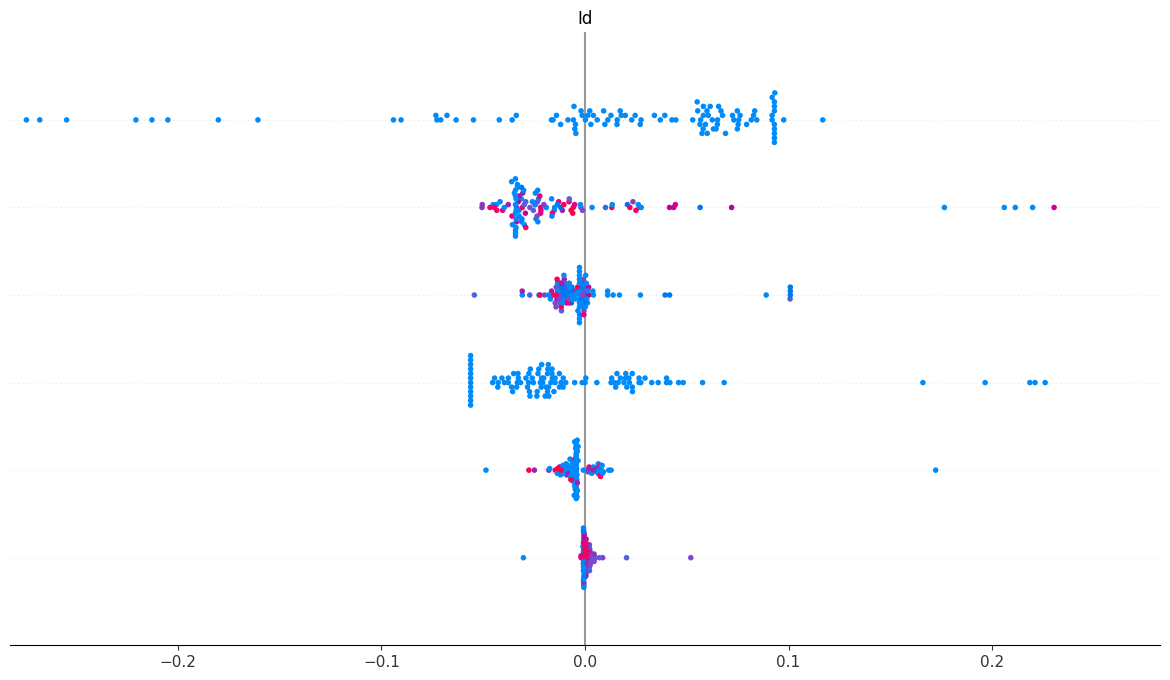

✅ Saved SHAP plot for 012EC_Ouvrage in: plots/SHAP_maquette_23001.xlsx_Sols_Plots/012EC_Ouvrage_SHAP.png
📌 Final shape after SHAP processing: (107, 23)

Processing SHAP for maquette_23001.xlsx_Poteaux...
🎯 Target columns found in maquette_23001.xlsx_Poteaux: {'011EC_Lot', '014EC_Mode Constructif', '013EC_Localisation', '012EC_Ouvrage'}
🔍 Analyzing SHAP for target: 011EC_Lot
📌 Initial shape before SHAP processing: (68, 18)
📊 SHAP values shape: 68, Feature matrix shape: (68, 14)


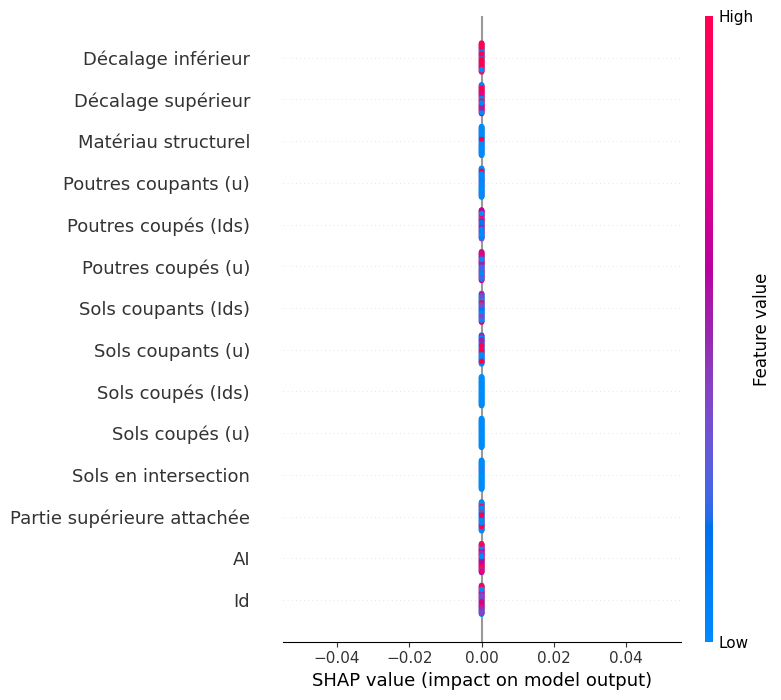

✅ Saved SHAP plot for 011EC_Lot in: plots/SHAP_maquette_23001.xlsx_Poteaux_Plots/011EC_Lot_SHAP.png
📌 Final shape after SHAP processing: (68, 14)
🔍 Analyzing SHAP for target: 014EC_Mode Constructif
📌 Initial shape before SHAP processing: (68, 18)
📊 SHAP values shape: 68, Feature matrix shape: (68, 14)


<Figure size 640x480 with 0 Axes>

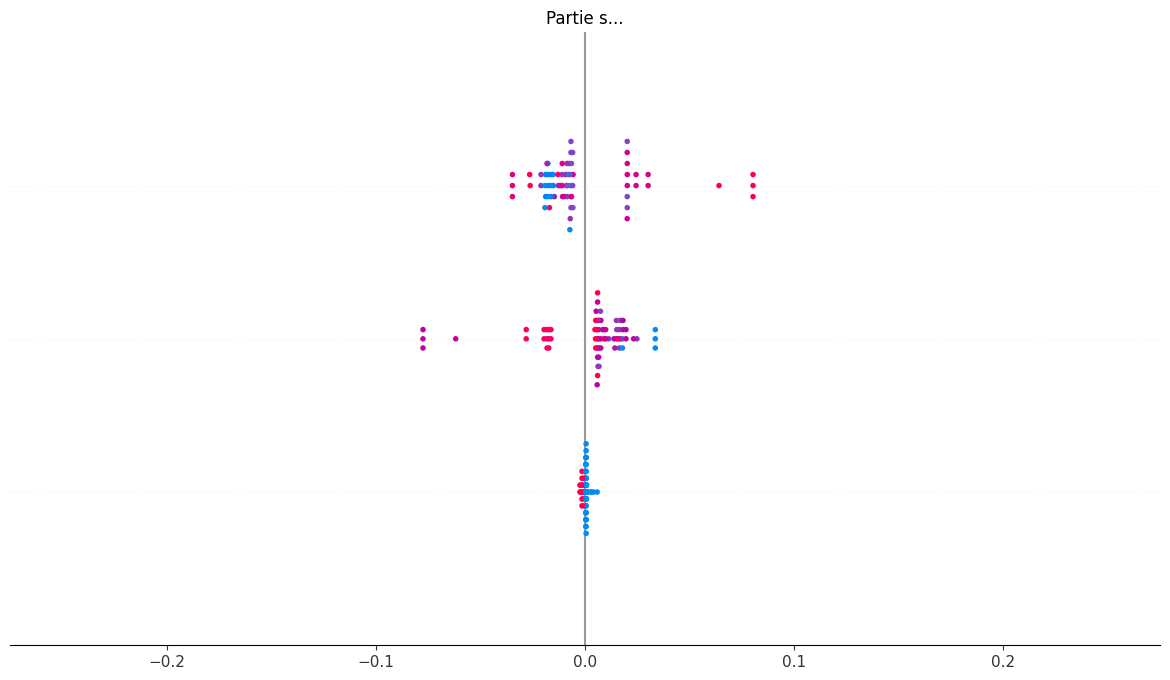

✅ Saved SHAP plot for 014EC_Mode Constructif in: plots/SHAP_maquette_23001.xlsx_Poteaux_Plots/014EC_Mode Constructif_SHAP.png
📌 Final shape after SHAP processing: (68, 14)
🔍 Analyzing SHAP for target: 013EC_Localisation
📌 Initial shape before SHAP processing: (68, 18)
📊 SHAP values shape: 68, Feature matrix shape: (68, 14)


<Figure size 640x480 with 0 Axes>

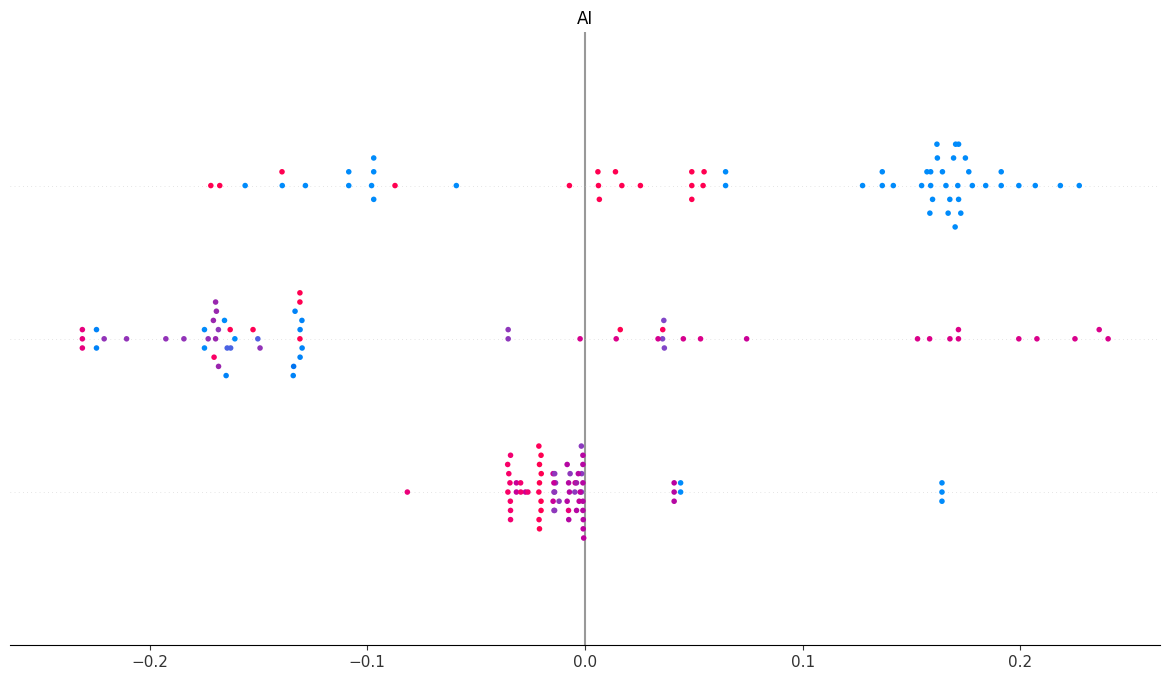

✅ Saved SHAP plot for 013EC_Localisation in: plots/SHAP_maquette_23001.xlsx_Poteaux_Plots/013EC_Localisation_SHAP.png
📌 Final shape after SHAP processing: (68, 14)
🔍 Analyzing SHAP for target: 012EC_Ouvrage
📌 Initial shape before SHAP processing: (68, 18)
📊 SHAP values shape: 68, Feature matrix shape: (68, 14)


<Figure size 640x480 with 0 Axes>

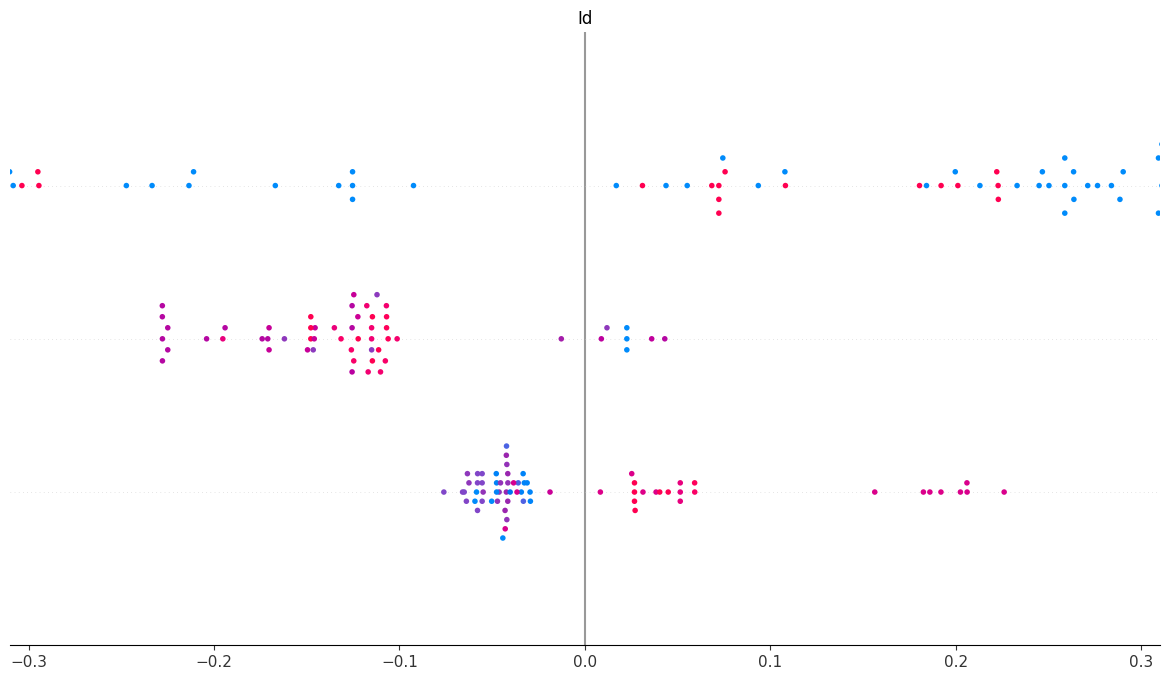

✅ Saved SHAP plot for 012EC_Ouvrage in: plots/SHAP_maquette_23001.xlsx_Poteaux_Plots/012EC_Ouvrage_SHAP.png
📌 Final shape after SHAP processing: (68, 14)


In [15]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import os

# Ensure SHAP initializes properly
shap.initjs()

# Function to create subfolder for SHAP plots
def get_plot_subfolder(file_name):
    subfolder_name = f"{file_name}_Plots"
    subfolder_path = os.path.join("plots", subfolder_name)  # Adjust path as needed

    # Create subfolder if it doesn’t exist
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)

    return subfolder_path

# Loop through all fully processed dataframes
for df_name, df in final_cleaned_dataframes.items():  # ✅ Use fully processed dataset
    print(f"\nProcessing SHAP for {df_name}...")

    # Identify available target columns in the current dataframe
    # Identify target columns by checking if any target column is a substring of the dataframe's columns
    existing_target_columns = target_columns_found

    if existing_target_columns:
        print(f"🎯 Target columns found in {df_name}: {existing_target_columns}")

        for target_column in existing_target_columns:
            print(f"🔍 Analyzing SHAP for target: {target_column}")

            # Display shape before training
            initial_shape = df.shape
            print(f"📌 Initial shape before SHAP processing: {initial_shape}")

            # Prepare the data
            X = df.drop(columns=existing_target_columns)  # Exclude target columns from features

            # Convert categorical columns in X to numeric
            for col in X.select_dtypes(include=["object"]).columns:
                X[col] = X[col].astype("category").cat.codes

            # Convert target column to numeric
            y = df[target_column].astype("category").cat.codes

            # Train RandomForestClassifier
            model = RandomForestClassifier()
            model.fit(X, y)

            # Compute SHAP values
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X)

            # Verify SHAP output shape before plotting
            print(f"📊 SHAP values shape: {len(shap_values)}, Feature matrix shape: {X.shape}")
            if isinstance(shap_values, list):
                shap_values = shap_values[0]  # Use first class for visualization in multi-class models

            # Create subfolder for SHAP plots
            plot_subfolder = get_plot_subfolder(f"SHAP_{df_name}")
            plot_path = os.path.join(plot_subfolder, f"{target_column}_SHAP.png")

            # Display & save SHAP summary plot
            shap.summary_plot(shap_values, X, show=False)
            plt.savefig(plot_path)
            plt.show()

            print(f"✅ Saved SHAP plot for {target_column} in: {plot_path}")

            # Display shape after SHAP analysis
            final_shape = X.shape
            print(f"📌 Final shape after SHAP processing: {final_shape}")

    else:
        print(f"⚠️ No valid target columns found in {df_name}. Skipping...")

<!-- ## Training and testing  -->

<!-- Where to Go from Here?
🔹 Feature engineering: If accuracy is low, refine features further
🔹 Hyperparameter tuning: Optimize n_estimators, max_depth, etc.
🔹 Compare multiple models: Try XGBoost or SVM for better performance

Your Next Step
Run the model training and evaluation, then let me know if you'd like tuning suggestions or deeper insights! 🚀🔥
This is getting exciting—you're building something powerful! 💡 -->


## Machine Learning Models

In [16]:
# Iterate over each dataframe in the dictionary and print its dtypes
for df_name, df in final_cleaned_dataframes.items():
	print(f"Dtypes for {df_name}:")
	print(df.dtypes)
	print("\n")

Dtypes for maquette_23017.xlsx_Sols:
Id                                          int64
011EC_Lot                                  object
012EC_Ouvrage                              object
013EC_Localisation                         object
014EC_Mode Constructif                     object
Murs en intersection                        int64
Murs coupés (u)                             int64
Murs coupés (Ids)                          object
Murs coupants (u)                           int64
Poutres en intersection                     int64
Poutres coupés (Ids)                       object
Poteaux en intersection                     int64
Poteaux coupés (Ids)                       object
Sol multicouche                              bool
Profil modifié                               bool
Décalage par rapport au niveau            float64
Etude de l'élévation à la base            float64
Elévation au niveau du noyau inférieur    float64
Matériau structurel                        object
dtype: object

In [17]:
import pandas as pd

# Function to convert ID strings into a numeric count feature
def count_ids(id_string):
    """Convert string of IDs into a numeric count."""
    return len(id_string.split(",")) if isinstance(id_string, str) else 0

# Apply processing to fully cleaned datasets
for df_name, df in final_cleaned_dataframes.items():
    print(f"\n🔄 Processing ID count transformation for {df_name}...")

    # Identify relevant ID columns
    id_columns = [col for col in df.columns if any(keyword in col.lower() for keyword in ["coupés_(ids)", "coupants_(ids)"])]

    if id_columns:
        print(f"📌 Found ID columns: {id_columns}")

        # Transform ID columns into numeric count and drop originals
        df[[f"{col}_count" for col in id_columns]] = df[id_columns].applymap(count_ids)
        df.drop(columns=id_columns, inplace=True)  # Remove original text-based ID columns

    # Ensure only ID-related columns are converted to numeric
    df[id_columns] = df[id_columns].apply(pd.to_numeric, errors="coerce").fillna(0)

    # Store the updated dataframe
    final_cleaned_dataframes[df_name] = df

    print(f"✅ Final shape after ID count transformation: {df.shape}")

print("🚀 ID count transformation completed successfully!")


🔄 Processing ID count transformation for maquette_23017.xlsx_Sols...
✅ Final shape after ID count transformation: (29, 19)

🔄 Processing ID count transformation for maquette_23016.xlsx_Sols...
✅ Final shape after ID count transformation: (45, 21)

🔄 Processing ID count transformation for maquette_23002.xlsx_Sols...
✅ Final shape after ID count transformation: (32, 24)

🔄 Processing ID count transformation for RawData-Cibles.xlsx_Sols...
✅ Final shape after ID count transformation: (107, 27)

🔄 Processing ID count transformation for RawData-Cibles.xlsx_Poteaux...
✅ Final shape after ID count transformation: (68, 18)

🔄 Processing ID count transformation for maquette_23001.xlsx_Sols...
✅ Final shape after ID count transformation: (107, 27)

🔄 Processing ID count transformation for maquette_23001.xlsx_Poteaux...
✅ Final shape after ID count transformation: (68, 18)
🚀 ID count transformation completed successfully!


In [18]:
# Iterate over each dataframe in the dictionary and print its dtypes
for df_name, df in final_cleaned_dataframes.items():
	print(f"Dtypes for {df_name}:")
	print(df.dtypes)
	print("\n")

Dtypes for maquette_23017.xlsx_Sols:
Id                                          int64
011EC_Lot                                  object
012EC_Ouvrage                              object
013EC_Localisation                         object
014EC_Mode Constructif                     object
Murs en intersection                        int64
Murs coupés (u)                             int64
Murs coupés (Ids)                          object
Murs coupants (u)                           int64
Poutres en intersection                     int64
Poutres coupés (Ids)                       object
Poteaux en intersection                     int64
Poteaux coupés (Ids)                       object
Sol multicouche                              bool
Profil modifié                               bool
Décalage par rapport au niveau            float64
Etude de l'élévation à la base            float64
Elévation au niveau du noyau inférieur    float64
Matériau structurel                        object
dtype: object

In [19]:
for df_name, df in final_cleaned_dataframes.items():
    categorical_cols = df.select_dtypes(include=["object"]).columns
    print(f"\n📌 {df_name} - Categorical Columns Before Encoding: {categorical_cols.tolist()}")


📌 maquette_23017.xlsx_Sols - Categorical Columns Before Encoding: ['011EC_Lot', '012EC_Ouvrage', '013EC_Localisation', '014EC_Mode Constructif', 'Murs coupés (Ids)', 'Poutres coupés (Ids)', 'Poteaux coupés (Ids)', 'Matériau structurel']

📌 maquette_23016.xlsx_Sols - Categorical Columns Before Encoding: ['011EC_Lot', '012EC_Ouvrage', '013EC_Localisation', '014EC_Mode Constructif', 'Murs coupés (Ids)', 'Poutres coupés (Ids)', 'Poteaux coupés (Ids)', 'Matériau structurel']

📌 maquette_23002.xlsx_Sols - Categorical Columns Before Encoding: ['011EC_Lot', '012EC_Ouvrage', '013EC_Localisation', '014EC_Mode Constructif', 'Poutres coupés (Ids)', 'Matériau structurel']

📌 RawData-Cibles.xlsx_Sols - Categorical Columns Before Encoding: ['011EC_Lot', '012EC_Ouvrage', '013EC_Localisation', '014EC_Mode Constructif', 'Murs coupés (Ids)', 'Poutres coupés (Ids)', 'Poteaux coupés (Ids)', 'Matériau structurel']

📌 RawData-Cibles.xlsx_Poteaux - Categorical Columns Before Encoding: ['011EC_Lot', '012EC_Ou

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Dictionaries to store encoders
feature_encoders = {}  # Stores encoders for feature columns
target_encoders = {}  # Stores encoders for target columns

# Encode features and targets separately
for df_name, df in final_cleaned_dataframes.items():
    print(f"\n🔄 Encoding categorical features for {df_name}...")

    # Identify categorical columns again after ID transformation
    categorical_cols = df.select_dtypes(include=["object"]).columns
    target_cols = [col for col in categorical_cols if col in TARGET_COLUMNS]
    feature_cols = [col for col in categorical_cols if col not in TARGET_COLUMNS]

    # Encode target columns
    for col in target_cols:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col].astype(str))
        target_encoders[f"{df_name}_{col}"] = encoder
        print(f"✅ Stored Target Encoder for {df_name} - {col}")

    # Encode feature columns
    one_hot_cols = []
    for col in feature_cols:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col].astype(str))
        feature_encoders[f"{df_name}_{col}"] = encoder
        print(f"✅ Stored Feature Encoder for {df_name} - {col}")
        one_hot_cols.append(col)  # Mark column for One-Hot Encoding if needed

    # Apply One-Hot Encoding only to select categorical variables
    if one_hot_cols:
        encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
        encoded_values = encoder.fit_transform(df[one_hot_cols])

        # Create a new DataFrame with proper column names
        encoded_df = pd.DataFrame(encoded_values, index=df.index, columns=encoder.get_feature_names_out(one_hot_cols))

        # Remove original one-hot columns and add encoded features
        df.drop(columns=one_hot_cols, inplace=True)
        df = pd.concat([df, encoded_df], axis=1)

    # Save updated dataframe
    final_cleaned_dataframes[df_name] = df

    print(f"✅ Successfully encoded categorical features for {df_name}. New shape: {df.shape}")

print("🚀 Final categorical encoding applied successfully across all datasets!")


🔄 Encoding categorical features for maquette_23017.xlsx_Sols...
✅ Stored Target Encoder for maquette_23017.xlsx_Sols - 011EC_Lot
✅ Stored Target Encoder for maquette_23017.xlsx_Sols - 012EC_Ouvrage
✅ Stored Target Encoder for maquette_23017.xlsx_Sols - 013EC_Localisation
✅ Stored Target Encoder for maquette_23017.xlsx_Sols - 014EC_Mode Constructif
✅ Stored Feature Encoder for maquette_23017.xlsx_Sols - Murs coupés (Ids)
✅ Stored Feature Encoder for maquette_23017.xlsx_Sols - Poutres coupés (Ids)
✅ Stored Feature Encoder for maquette_23017.xlsx_Sols - Poteaux coupés (Ids)
✅ Stored Feature Encoder for maquette_23017.xlsx_Sols - Matériau structurel
✅ Successfully encoded categorical features for maquette_23017.xlsx_Sols. New shape: (29, 36)

🔄 Encoding categorical features for maquette_23016.xlsx_Sols...
✅ Stored Target Encoder for maquette_23016.xlsx_Sols - 011EC_Lot
✅ Stored Target Encoder for maquette_23016.xlsx_Sols - 012EC_Ouvrage
✅ Stored Target Encoder for maquette_23016.xlsx_Sols

In [21]:
for df_name, df in final_cleaned_dataframes.items():
    categorical_cols = df.select_dtypes(include=["object"]).columns
    print(f"\n📌 {df_name} - Categorical Columns After Encoding: {categorical_cols.tolist()}")


📌 maquette_23017.xlsx_Sols - Categorical Columns After Encoding: []

📌 maquette_23016.xlsx_Sols - Categorical Columns After Encoding: []

📌 maquette_23002.xlsx_Sols - Categorical Columns After Encoding: []

📌 RawData-Cibles.xlsx_Sols - Categorical Columns After Encoding: []

📌 RawData-Cibles.xlsx_Poteaux - Categorical Columns After Encoding: []

📌 maquette_23001.xlsx_Sols - Categorical Columns After Encoding: []

📌 maquette_23001.xlsx_Poteaux - Categorical Columns After Encoding: []


In [ ]:
# print(train_test_data.keys())

In [ ]:
# # RandomForestClassifier by Excel

# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Train and evaluate models on each dataset
# model_results = {}

# for key, (X_train, X_test, y_train, y_test) in train_test_data.items():
#     print(f"\n🚀 Training model for {key}...")

#     # Train a Random Forest model
#     model = RandomForestClassifier(n_estimators=100, random_state=42)
#     model.fit(X_train, y_train)

#     # Predictions
#     y_train_pred = model.predict(X_train)  # Predictions on training data
#     y_test_pred = model.predict(X_test)  # Predictions on test data

#     # Evaluate accuracy
#     train_accuracy = accuracy_score(y_train, y_train_pred)
#     test_accuracy = accuracy_score(y_test, y_test_pred)
#     model_results[key] = (train_accuracy, test_accuracy)

#     print(f"📊 Training Accuracy for {key}: {train_accuracy:.4f}")
#     print(f"🎯 Test Accuracy for {key}: {test_accuracy:.4f}")

# # Plot Learning Curve
# plt.figure(figsize=(10, 5))

# train_accs = [train_accuracy for train_accuracy, _ in model_results.values()]
# test_accs = [test_accuracy for _, test_accuracy in model_results.values()]
# datasets = list(model_results.keys())

# plt.plot(datasets, train_accs, marker='o', label="Training Accuracy", color="blue")
# plt.plot(datasets, test_accs, marker='s', label="Test Accuracy", color="red")

# plt.xticks(rotation=90)
# plt.ylabel("Accuracy")
# plt.title("Model Learning Curve Across Datasets")
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# import pandas as pd
# import numpy as np
# import os
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
# from sklearn.metrics import accuracy_score
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler

# # Ensure necessary directories exist
# os.makedirs('data/processed_data', exist_ok=True)

# def train_random_forest(X_combined, y_combined):
#     """Trains a single Random Forest model on processed data with evaluation plots."""
#     print("\n🔍 Checking for missing values...")
#     imputer = SimpleImputer(strategy='mean')
#     X_combined = pd.DataFrame(imputer.fit_transform(X_combined), columns=X_combined.columns)
#     X_combined.dropna(inplace=True)
#     y_combined.dropna(inplace=True)

#     # Apply feature scaling
#     scaler = StandardScaler()
#     X_combined = pd.DataFrame(scaler.fit_transform(X_combined), columns=X_combined.columns)

#     # Split dataset
#     X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

#     print(f"\n🚀 Training on merged dataset with {X_train.shape[0]} samples...")

#     # Train Random Forest model
#     model = RandomForestClassifier(n_estimators=200, random_state=42)
#     model.fit(X_train, y_train)

#     # Predictions
#     y_train_pred = model.predict(X_train)
#     y_test_pred = model.predict(X_test)

#     # Evaluate accuracy
#     train_accuracy = accuracy_score(y_train, y_train_pred)
#     test_accuracy = accuracy_score(y_test, y_test_pred)

#     print(f"📊 Training Accuracy: {train_accuracy:.4f}")
#     print(f"🎯 Test Accuracy: {test_accuracy:.4f}")

#     # Plot Accuracy Comparison
#     plt.figure(figsize=(6, 4))
#     plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=['blue', 'red'])
#     plt.ylabel("Accuracy")
#     plt.title("Model Performance - Random Forest")
#     plt.grid(True)
#     plt.show()

#     # Generate Learning Curve
#     train_sizes, train_scores, test_scores = learning_curve(
#         model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
#         train_sizes=np.linspace(0.1, 1.0, 5)
#     )

#     # Compute mean and standard deviation
#     train_mean = np.mean(train_scores, axis=1)
#     train_std = np.std(train_scores, axis=1)
#     test_mean = np.mean(test_scores, axis=1)
#     test_std = np.std(test_scores, axis=1)

#     # Plot Learning Curve
#     plt.figure(figsize=(8, 5))
#     plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Accuracy")
#     plt.plot(train_sizes, test_mean, 'o-', color="red", label="Validation Accuracy")
#     plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
#     plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")
#     plt.xlabel("Training Set Size")
#     plt.ylabel("Accuracy")
#     plt.title("Learning Curve - Random Forest")
#     plt.legend(loc="best")
#     plt.grid()
#     plt.show()

# def process_data(cleaned_dataframes, target_columns):
#     """
#     From each cleaned df:
#       • extract y = df[target_columns]
#       • extract X = df.drop(columns=target_columns)
#     then stack them all into one big X, y pair.
#     """
#     X_parts = []
#     y_parts = []

#     for df_name, df in cleaned_dataframes.items():
#         # check that all target columns are present
#         missing = set(target_columns) - set(df.columns)
#         if missing:
#             print(f"⚠️  Skipping {df_name}: missing targets {missing}")
#             continue

#         # isolate X, y
#         y = df[target_columns]
#         X = df.drop(columns=target_columns)

#         print(f"✅  {df_name}: X shape {X.shape}, y shape {y.shape}")
#         X_parts.append(X)
#         y_parts.append(y)

#     if not X_parts:
#         raise ValueError("No dataframes contained all target columns!")

#     # concat all the pieces
#     X_combined = pd.concat(X_parts, axis=0, ignore_index=True)
#     y_combined = pd.concat(y_parts, axis=0, ignore_index=True)

#     print(f"\n📊 Combined dataset: X {X_combined.shape}, y {y_combined.shape}")
#     return X_combined, y_combined

# # Run training function
# X_combined, y_combined = process_data(final_cleaned_dataframes, TARGET_COLUMNS)

# # train & evaluate
# train_random_forest(X_combined, y_combined)

✅  maquette_23017.xlsx_Sols: X shape (29, 32), y shape (29, 4)
✅  maquette_23016.xlsx_Sols: X shape (45, 149), y shape (45, 4)
✅  maquette_23002.xlsx_Sols: X shape (32, 38), y shape (32, 4)
✅  RawData-Cibles.xlsx_Sols: X shape (107, 152), y shape (107, 4)
✅  RawData-Cibles.xlsx_Poteaux: X shape (68, 80), y shape (68, 4)
✅  maquette_23001.xlsx_Sols: X shape (107, 152), y shape (107, 4)
✅  maquette_23001.xlsx_Poteaux: X shape (68, 80), y shape (68, 4)

📊 Combined dataset: X (456, 209), y (456, 4)

🔍 Checking for missing values...

🚀 Training on merged dataset with 364 samples...


ValueError: multiclass-multioutput is not supported

In [ ]:
# import pandas as pd
# import numpy as np
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns
# import joblib
# from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.impute import SimpleImputer
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier

# # Create necessary directories
# os.makedirs('data/processed_data', exist_ok=True)

# # Define multiple ML models
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
#     "SVM": SVC(kernel="rbf", probability=True, random_state=42),
#     "KNN": KNeighborsClassifier(n_neighbors=3),
#     "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5),
#     "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
#     "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
#     "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, random_state=42),
# }

# failed_models = []

# def process_data(final_cleaned_dataframes, TARGET_COLUMNS):
#     """Detects missing values, merges all datasets, resets index, and saves processed data."""
#     all_X = []
#     all_y = []

#     print("\n✅ Checking available dataframes and target columns...")
#     print("Dataframes found:", list(final_cleaned_dataframes.keys()))
#     print("Target columns expected:", TARGET_COLUMNS)

#     for df_name, df in final_cleaned_dataframes.items():
#         existing_target_columns = [col for col in df.columns if any(target in col for target in TARGET_COLUMNS)]

#         if not existing_target_columns:
#             print(f"⚠️ {df_name}: No matching target columns found.")
#             continue

#         print(f"\n🔍 Processing {df_name} - Found target columns: {existing_target_columns}")

#         for target_column in existing_target_columns:
#             print(f"📌 Processing data for target: {target_column}")

#             X = df.drop(columns=existing_target_columns)
#             y = df[target_column]

#             if y.nunique() == 1:
#                 print(f"⚠️ Skipping {df_name}_{target_column}: Only one class present.")
#                 continue

#             X = X.reset_index(drop=True)
#             y = y.reset_index(drop=True)

#             all_X.append(X)
#             all_y.append(y)

#     print(f"\n✅ Total datasets processed: {len(all_X)}")

#     if not all_X or not all_y:
#         msg = "🚨 No objects to concatenate. Check TARGET_COLUMNS or ensure target values vary."
#         print(msg)
#         raise ValueError(msg)

#     X_combined = pd.concat(all_X, axis=0).reset_index(drop=True)
#     y_combined = pd.concat(all_y, axis=0).reset_index(drop=True)

#     print(f"\n✅ Final merged dataset shape: {X_combined.shape}, {y_combined.shape}")

#     return X_combined, y_combined

# def train_models(X_combined, y_combined):
#     """Trains multiple ML models & evaluates performance."""
#     print("\n🔍 Checking for NaN values...")
#     imputer = SimpleImputer(strategy='mean')
#     X_combined = pd.DataFrame(imputer.fit_transform(X_combined), columns=X_combined.columns)
#     X_combined.dropna(inplace=True)
#     y_combined.dropna(inplace=True)

#     X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

#     model_results = {}

#     plt.figure(figsize=(8, 5))

#     for name, model in models.items():
#         print(f"\n🚀 Training {name}...")
#         try:
#             cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
#             model.fit(X_train, y_train)
#             y_pred = model.predict(X_test)

#             test_accuracy = accuracy_score(y_test, y_pred)
#             model_results[name] = test_accuracy

#             print(f"✅ {name}: Test Accuracy = {test_accuracy:.4f}")

#             # Learning Curve
#             train_sizes, train_scores, test_scores = learning_curve(
#                 model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
#                 train_sizes=np.linspace(0.1, 1.0, 5)
#             )

#             test_mean = np.mean(test_scores, axis=1)
#             test_std = np.std(test_scores, axis=1)

#             plt.plot(train_sizes, test_mean, marker='o', label=f"{name} (Acc: {test_mean[-1]:.2f})")
#             plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

#         except Exception as e:
#             print(f"⚠️ Error training {name}: {e}")
#             failed_models.append(name)

#     plt.xlabel("Training Set Size")
#     plt.ylabel("Accuracy")
#     plt.title("Learning Curve - All Models")
#     plt.legend(loc="best")
#     plt.grid()
#     plt.show()

#     # Rank models
#     print("\n📊 Model Rankings by Test Accuracy:")
#     ranked_models = sorted(model_results.items(), key=lambda x: x[1], reverse=True)
#     ranking_df = pd.DataFrame(ranked_models, columns=["Model", "Test Accuracy"])
#     print(ranking_df.to_string(index=False))

#     # Save the top models
#     best_models = ranked_models[:2]
#     combined_X_train, combined_y_train = X_combined, y_combined

#     for name, acc in best_models:
#         model = models[name]
#         model.fit(combined_X_train, combined_y_train)
#         joblib.dump(model, f'models/machine_learning/{name.replace(" ", "_")}_combined.pkl')

#     print("\n🚀 Model evaluation, ranking, and saving completed!")
#     print(f"⚠️ Models that failed: {failed_models}")

# # Run the pipeline
# X_combined, y_combined = process_data(final_cleaned_dataframes, TARGET_COLUMNS)
# train_models(X_combined, y_combined)


✅ Checking available dataframes and target columns...
Dataframes found: ['maquette_23017.xlsx_Sols', 'maquette_23016.xlsx_Sols', 'maquette_23002.xlsx_Sols', 'RawData-Cibles.xlsx_Sols', 'RawData-Cibles.xlsx_Poteaux', 'maquette_23001.xlsx_Sols', 'maquette_23001.xlsx_Poteaux']
Target columns expected: ['011EC_Lot', '012EC_Ouvrage', '013EC_Localisation', '014EC_Mode Constructif']

🔍 Processing maquette_23017.xlsx_Sols - Found target columns: ['011EC_Lot', '012EC_Ouvrage', '013EC_Localisation', '014EC_Mode Constructif']
📌 Processing data for target: 011EC_Lot
⚠️ Skipping maquette_23017.xlsx_Sols_011EC_Lot: Only one class present.
📌 Processing data for target: 012EC_Ouvrage
📌 Processing data for target: 013EC_Localisation
📌 Processing data for target: 014EC_Mode Constructif
⚠️ Skipping maquette_23017.xlsx_Sols_014EC_Mode Constructif: Only one class present.

🔍 Processing maquette_23016.xlsx_Sols - Found target columns: ['011EC_Lot', '012EC_Ouvrage', '013EC_Localisation', '014EC_Mode Constru

/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 membe

✅ Logistic Regression: Test Accuracy = 0.5000


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver


🚀 Training SVM...
✅ SVM: Test Accuracy = 0.4878


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



🚀 Training KNN...
✅ KNN: Test Accuracy = 0.4553


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



🚀 Training Decision Tree...
✅ Decision Tree: Test Accuracy = 0.6057


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



🚀 Training Random Forest...


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


✅ Random Forest: Test Accuracy = 0.5407


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



🚀 Training AdaBoost...


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


✅ AdaBoost: Test Accuracy = 0.4228


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



🚀 Training Gradient Boosting...


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


✅ Gradient Boosting: Test Accuracy = 0.5935


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


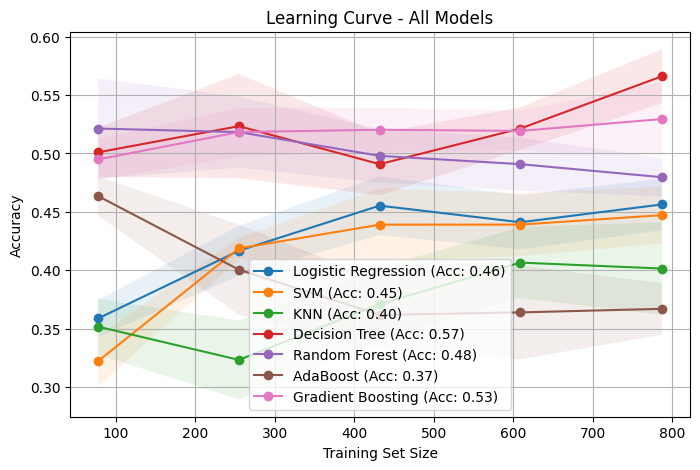


📊 Model Rankings by Test Accuracy:
              Model  Test Accuracy
      Decision Tree       0.605691
  Gradient Boosting       0.593496
      Random Forest       0.540650
Logistic Regression       0.500000
                SVM       0.487805
                KNN       0.455285
           AdaBoost       0.422764

🚀 Model evaluation, ranking, and saving completed!
⚠️ Models that failed: []


In [32]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Create necessary directories
os.makedirs('data/processed_data', exist_ok=True)

# Define ML models (Updated Logistic Regression)
models = {
    "Logistic Regression": LogisticRegression(solver="saga", max_iter=5000, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, random_state=42),
}

failed_models = []

def process_data(final_cleaned_dataframes, TARGET_COLUMNS):
    """Detects missing values, merges all datasets, resets index, and saves processed data."""
    all_X = []
    all_y = []

    print("\n✅ Checking available dataframes and target columns...")
    print("Dataframes found:", list(final_cleaned_dataframes.keys()))
    print("Target columns expected:", TARGET_COLUMNS)

    for df_name, df in final_cleaned_dataframes.items():
        existing_target_columns = [col for col in df.columns if any(target in col for target in TARGET_COLUMNS)]

        if not existing_target_columns:
            print(f"⚠️ {df_name}: No matching target columns found.")
            continue

        print(f"\n🔍 Processing {df_name} - Found target columns: {existing_target_columns}")

        for target_column in existing_target_columns:
            print(f"📌 Processing data for target: {target_column}")

            X = df.drop(columns=existing_target_columns)
            y = df[target_column]

            if y.nunique() == 1:
                print(f"⚠️ Skipping {df_name}_{target_column}: Only one class present.")
                continue

            X = X.reset_index(drop=True)
            y = y.reset_index(drop=True)

            all_X.append(X)
            all_y.append(y)

    print(f"\n✅ Total datasets processed: {len(all_X)}")

    if not all_X or not all_y:
        msg = "🚨 No objects to concatenate. Check TARGET_COLUMNS or ensure target values vary."
        print(msg)
        raise ValueError(msg)

    X_combined = pd.concat(all_X, axis=0).reset_index(drop=True)
    y_combined = pd.concat(all_y, axis=0).reset_index(drop=True)

    print(f"\n✅ Final merged dataset shape: {X_combined.shape}, {y_combined.shape}")

    return X_combined, y_combined

def train_models(X_combined, y_combined):
    """Trains multiple ML models & evaluates performance."""
    print("\n🔍 Checking for NaN values...")
    imputer = SimpleImputer(strategy='mean')
    X_combined = pd.DataFrame(imputer.fit_transform(X_combined), columns=X_combined.columns)
    X_combined.dropna(inplace=True)
    y_combined.dropna(inplace=True)

    # Apply Standard Scaling
    scaler = StandardScaler()
    X_combined = pd.DataFrame(scaler.fit_transform(X_combined), columns=X_combined.columns)

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

    model_results = {}

    plt.figure(figsize=(8, 5))

    for name, model in models.items():
        print(f"\n🚀 Training {name}...")
        try:
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            test_accuracy = accuracy_score(y_test, y_pred)
            model_results[name] = test_accuracy

            print(f"✅ {name}: Test Accuracy = {test_accuracy:.4f}")

            # Learning Curve
            train_sizes, train_scores, test_scores = learning_curve(
                model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
                train_sizes=np.linspace(0.1, 1.0, 5)
            )

            test_mean = np.mean(test_scores, axis=1)
            test_std = np.std(test_scores, axis=1)

            plt.plot(train_sizes, test_mean, marker='o', label=f"{name} (Acc: {test_mean[-1]:.2f})")
            plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

        except Exception as e:
            print(f"⚠️ Error training {name}: {e}")
            failed_models.append(name)

    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve - All Models")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

    # Rank models
    print("\n📊 Model Rankings by Test Accuracy:")
    ranked_models = sorted(model_results.items(), key=lambda x: x[1], reverse=True)
    ranking_df = pd.DataFrame(ranked_models, columns=["Model", "Test Accuracy"])
    print(ranking_df.to_string(index=False))

    # Save the top models
    best_models = ranked_models[:2]
    combined_X_train, combined_y_train = X_combined, y_combined

    for name, acc in best_models:
        model = models[name]
        model.fit(combined_X_train, combined_y_train)
        joblib.dump(model, os.path.join(ML_MODELS_DIR, f'{name.replace(" ", "_")}_combined.pkl'))

    print("\n🚀 Model evaluation, ranking, and saving completed!")
    print(f"⚠️ Models that failed: {failed_models}")

# Run the pipeline
X_combined, y_combined = process_data(final_cleaned_dataframes, TARGET_COLUMNS)
train_models(X_combined, y_combined)

In [ ]:
# %pip install xgboost
# %pip install lightgbm

In [ ]:
# print("Unique values in y_train:", np.unique(y_train))
# print("Unique values in y_test:", np.unique(y_test))


🔍 Optimizing Random Forest for iris_dataset...
✅ Best Random Forest: Test Accuracy = 0.9500

🔍 Optimizing Logistic Regression for iris_dataset...
✅ Best Logistic Regression: Test Accuracy = 0.9667

🔍 Optimizing SVM for iris_dataset...
✅ Best SVM: Test Accuracy = 0.9750

🔍 Optimizing KNN for iris_dataset...
✅ Best KNN: Test Accuracy = 0.9583

🔍 Optimizing Decision Tree for iris_dataset...
✅ Best Decision Tree: Test Accuracy = 0.9500

🔍 Optimizing AdaBoost for iris_dataset...
✅ Best AdaBoost: Test Accuracy = 0.9667

🔍 Optimizing Gradient Boosting for iris_dataset...
✅ Best Gradient Boosting: Test Accuracy = 0.9500

📊 Ranking for iris_dataset:
              Model  Test Accuracy
                SVM       0.975000
Logistic Regression       0.966667
           AdaBoost       0.966667
                KNN       0.958333
      Random Forest       0.950000
      Decision Tree       0.950000
  Gradient Boosting       0.950000


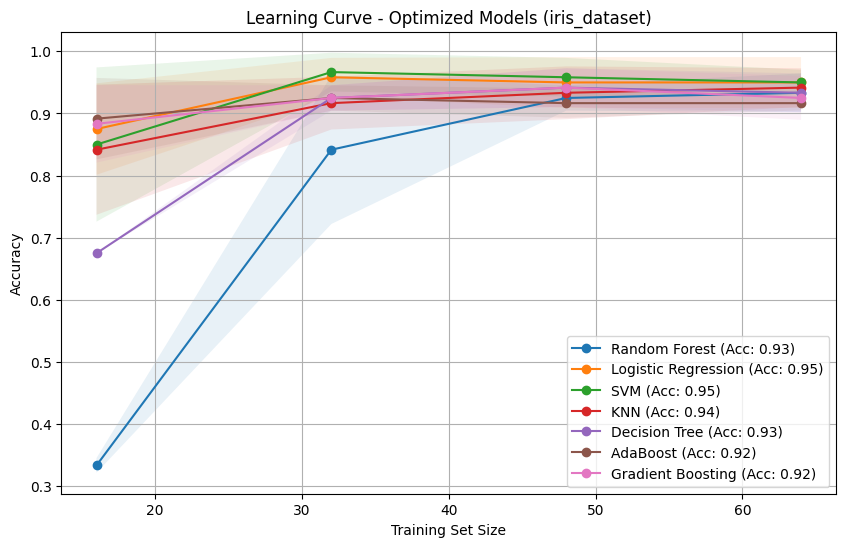


🚀 Hyperparameter tuning, ranking, and saving completed!
⚠️ Models that failed: []


In [ ]:
import numpy as np
import os
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Define models and search spaces for Bayesian tuning
param_spaces = {
    "Random Forest": {
        'n_estimators': Integer(100, 1000),
        'max_depth': Integer(3, 30),
        'min_samples_split': Integer(2, 15),
        'max_features': Categorical(['sqrt', 'log2', None])
    },
    "Logistic Regression": {
        'C': Real(0.01, 10, prior='log-uniform'),
        'solver': Categorical(['liblinear', 'lbfgs', 'saga'])
    },
    "SVM": {
        'C': Real(0.1, 10, prior='log-uniform'),
        'gamma': Real(0.01, 1, prior='log-uniform'),
        'kernel': Categorical(['linear', 'rbf'])
    },
    "KNN": {
        'n_neighbors': Integer(3, 15),
        'weights': Categorical(['uniform', 'distance']),
        'metric': Categorical(['euclidean', 'manhattan', 'minkowski'])
    },
    "Decision Tree": {
        'max_depth': Integer(3, 20),
        'min_samples_split': Integer(2, 10)
    },
    "AdaBoost": {
        'n_estimators': Integer(50, 500),
        'learning_rate': Real(0.01, 1, prior='log-uniform')
    },
    "Gradient Boosting": {
        'n_estimators': Integer(50, 500),
        'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
        'max_depth': Integer(3, 15)
    }
}

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

failed_models = []

def optimize_model(model, param_space, X_train, y_train):
    """Bayesian optimization of hyperparameters."""
    opt = BayesSearchCV(
        model,
        param_space,
        n_iter=50,  # Number of optimization steps
        cv=3,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1
    )
    opt.fit(X_train, y_train)
    return opt.best_estimator_, opt.best_score_

def plot_learning_curve(model, X_train, y_train, dataset_name, model_name):
    """Plots learning curves for all models in one graph."""
    try:
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1,
            train_sizes=np.linspace(0.2, 0.8, 4)
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        plt.plot(train_sizes, test_mean, marker='o', label=f"{model_name} (Acc: {test_mean[-1]:.2f})")
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

    except Exception as e:
        print(f"⚠️ Error generating learning curve for {model_name}: {e}")
        failed_models.append(model_name)

def tune_all_models(X_train, y_train, dataset_name):
    """Runs hyperparameter optimization, saves models, and ranks them."""
    best_models = {}

    plt.figure(figsize=(10, 6))  # Single plot for all learning curves

    for model_name, param_space in param_spaces.items():
        print(f"\n🔍 Optimizing {model_name} for {dataset_name}...")
        best_model, best_score = optimize_model(models[model_name], param_space, X_train, y_train)
        best_models[model_name] = (best_model, best_score)

        print(f"✅ Best {model_name}: Test Accuracy = {best_score:.4f}")
        joblib.dump(best_model, os.path.join(ML_MODELS_DIR, f'{model_name.replace(" ", "_")}_optimized.pkl'))


        # Plot learning curves for all models in the same graph
        plot_learning_curve(best_model, X_train, y_train, dataset_name, model_name)

    # Rank models
    ranked_models = sorted(best_models.items(), key=lambda x: x[1][1], reverse=True)
    print(f"\n📊 Ranking for {dataset_name}:")
    ranking_df = pd.DataFrame({
        "Model": [model for model, _ in ranked_models],
        "Test Accuracy": [metrics[1] for _, metrics in ranked_models]
    })
    print(ranking_df.to_string(index=False))

    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title(f"Learning Curve - Optimized Models ({dataset_name})")
    plt.legend(loc="best")
    plt.grid()
    plt.savefig(f'plots/{dataset_name}_optimized_learning_curves.png')
    plt.show()
    plt.close()

    return ranked_models

# Example Data (Replace with Real `train_test_data`)
if "train_test_data" not in globals():
    from sklearn.datasets import load_iris
    iris = load_iris()
    X, y = pd.DataFrame(iris.data, columns=iris.feature_names), pd.Series(iris.target)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    train_test_data = {"iris_dataset": (X_train, X_test, y_train, y_test)}

# Run model tuning
for dataset_name, (X_train, X_test, y_train, y_test) in train_test_data.items():
    ranked_models = tune_all_models(X_train, y_train, dataset_name)

print("\n🚀 Hyperparameter tuning, ranking, and saving completed!")
print(f"⚠️ Models that failed: {failed_models}")

## Deep-Learning Section

In [ ]:
# %pip install scikit-optimize

<!-- ## Deep Learning -->

In [52]:
print(f"Available columns in dataset: {list(df.columns)}")
print(f"TARGET_COLUMNS: {TARGET_COLUMNS}")

existing_target_columns = [col for col in df.columns if col.strip().lower() in [t.lower() for t in TARGET_COLUMNS]]
print(f"Unique values in target column: {df[existing_target_columns[0]].nunique()}" if existing_target_columns else "No target column found.")

Available columns in dataset: ['Id', '011EC_Lot', '012EC_Ouvrage', '013EC_Localisation', '014EC_Mode Constructif', 'Nom', 'Hauteur', 'Epaisseur', 'AI', 'AS', 'Sols en intersection', 'Sols coupés (u)', 'Sols coupés (Ids)', 'Sols coupants (u)', 'Sols coupants (Ids)', 'Sol au-dessus', 'Sol en-dessous', 'Fenêtres', 'Portes', 'Ouvertures', 'Murs imbriqués', 'Mur multicouche', 'Mur empilé', 'Profil modifié', 'Image', 'Catégorie', 'Section', "Type prédéfini d'IFC", 'Exporter au format IFC sous', 'Exporter au format IFC', 'IfcGUID', 'A une association', "Enrobage d'armature - Autres faces", "Enrobage d'armature - Face intérieure", "Enrobage d'armature - Face extérieure", 'Variantes', 'Extension inférieure', 'Extension supérieure', 'Volume', 'Surface', 'Phase de démolition', 'Phase de création', 'Commentaires', 'Marque centrale visible', 'Longueur', 'Famille et type', 'Famille', 'Type', 'Nom de la famille', 'Nom du type', 'ID du type', 'Lié au volume', 'Structure', 'Identifiant', 'Ligne de just

In [56]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Dictionaries to store encoders
feature_encoders = {}  # Stores encoders for feature columns
target_encoders = {}   # Stores encoders for target columns

USE_ONE_HOT = False

# Iterate over the clean dataframes
for df_name, df in final_cleaned_dataframes.items():
    print(f"\n🔄 Encoding categorical features for {df_name}...")

    # Identify categorical columns in the DataFrame
    categorical_cols = df.select_dtypes(include=["object"]).columns

    # Split columns between target and features based on TARGET_COLUMNS
    target_cols = [col for col in categorical_cols if col in TARGET_COLUMNS]
    feature_cols = [col for col in categorical_cols if col not in TARGET_COLUMNS]

    # ---------------------------------------------
    # Encode target columns (for classification tasks you may later decide
    # to one-hot encode these as needed for your deep learning model)
    # ---------------------------------------------
    for col in target_cols:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col].astype(str))
        target_encoders[f"{df_name}_{col}"] = encoder
        print(f"✅ Stored Target Encoder for {df_name} - {col}")

    # ---------------------------------------------
    # Encode feature columns
    # For deep learning, integer encoding is generally preferred so that
    # embeddings can be used (especially if the cardinality isn’t extremely low).
    # ---------------------------------------------
    for col in feature_cols:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col].astype(str))
        feature_encoders[f"{df_name}_{col}"] = encoder
        print(f"✅ Stored Feature Encoder for {df_name} - {col}")

    # ---------------------------------------------
    # Optionally apply One-Hot Encoding to features if desired.
    # For deep learning models using embeddings, you would typically keep the integer encoding.
    # ---------------------------------------------
    if USE_ONE_HOT:
        one_hot_cols = feature_cols  # you can modify this list if you want one-hot on a subset
        if one_hot_cols:
            encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
            encoded_values = encoder.fit_transform(df[one_hot_cols])
            encoded_df = pd.DataFrame(
                encoded_values,
                index=df.index,
                columns=encoder.get_feature_names_out(one_hot_cols)
            )
            # Drop the original one-hot columns and add the encoded columns
            df.drop(columns=one_hot_cols, inplace=True)
            df = pd.concat([df, encoded_df], axis=1)
            print(f"✅ Applied One-Hot Encoding for columns: {one_hot_cols}")

    # Save the updated DataFrame back
    final_cleaned_dataframes[df_name] = df
    print(f"✅ Successfully encoded categorical features for {df_name}. New shape: {df.shape}")

print("🚀 Final categorical encoding applied successfully across all datasets!")


🔄 Encoding categorical features for maquette_23017.xlsx_Sols...
✅ Successfully encoded categorical features for maquette_23017.xlsx_Sols. New shape: (29, 36)

🔄 Encoding categorical features for maquette_23016.xlsx_Sols...
✅ Successfully encoded categorical features for maquette_23016.xlsx_Sols. New shape: (45, 153)

🔄 Encoding categorical features for maquette_23002.xlsx_Sols...
✅ Successfully encoded categorical features for maquette_23002.xlsx_Sols. New shape: (32, 42)

🔄 Encoding categorical features for RawData-Cibles.xlsx_Sols...
✅ Successfully encoded categorical features for RawData-Cibles.xlsx_Sols. New shape: (107, 156)

🔄 Encoding categorical features for RawData-Cibles.xlsx_Poteaux...
✅ Successfully encoded categorical features for RawData-Cibles.xlsx_Poteaux. New shape: (68, 84)

🔄 Encoding categorical features for maquette_23001.xlsx_Sols...
✅ Successfully encoded categorical features for maquette_23001.xlsx_Sols. New shape: (107, 156)

🔄 Encoding categorical features fo


🔄 Processing dataframe: maquette_23017.xlsx_Sols
🎯 Training model for target column: 011EC_Lot
Epoch 1/20
1/1 [==============================] - 1s 814ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 52ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 46ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 

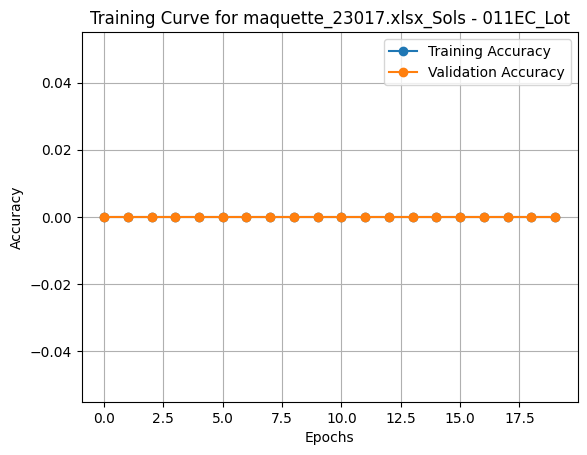

🎯 Training model for target column: 012EC_Ouvrage
Epoch 1/20
1/1 [==============================] - 1s 802ms/step - loss: 0.9362 - accuracy: 0.3043 - val_loss: 0.7089 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 50ms/step - loss: 0.7976 - accuracy: 0.4783 - val_loss: 0.6240 - val_accuracy: 0.6667
Epoch 3/20
1/1 [==============================] - 0s 48ms/step - loss: 0.6284 - accuracy: 0.7391 - val_loss: 0.5500 - val_accuracy: 0.8333
Epoch 4/20
1/1 [==============================] - 0s 48ms/step - loss: 0.5214 - accuracy: 0.8696 - val_loss: 0.4854 - val_accuracy: 0.8333
Epoch 5/20
1/1 [==============================] - 0s 51ms/step - loss: 0.3971 - accuracy: 0.9565 - val_loss: 0.4305 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 53ms/step - loss: 0.4172 - accuracy: 0.9130 - val_loss: 0.3827 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 52ms/step - loss: 0.4138 - accuracy: 0.9130 - val_loss: 0.3403

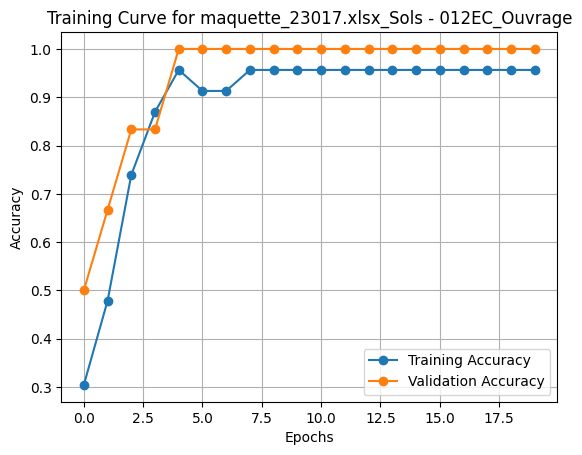

🎯 Training model for target column: 013EC_Localisation
Epoch 1/20
1/1 [==============================] - 1s 759ms/step - loss: 0.9885 - accuracy: 0.3913 - val_loss: 1.0585 - val_accuracy: 0.6667
Epoch 2/20
1/1 [==============================] - 0s 47ms/step - loss: 1.0456 - accuracy: 0.4348 - val_loss: 0.9938 - val_accuracy: 0.6667
Epoch 3/20
1/1 [==============================] - 0s 48ms/step - loss: 0.8642 - accuracy: 0.7391 - val_loss: 0.9323 - val_accuracy: 0.8333
Epoch 4/20
1/1 [==============================] - 0s 55ms/step - loss: 0.8151 - accuracy: 0.8696 - val_loss: 0.8730 - val_accuracy: 0.8333
Epoch 5/20
1/1 [==============================] - 0s 59ms/step - loss: 0.7726 - accuracy: 0.8261 - val_loss: 0.8192 - val_accuracy: 0.8333
Epoch 6/20
1/1 [==============================] - 0s 53ms/step - loss: 0.7336 - accuracy: 0.8696 - val_loss: 0.7665 - val_accuracy: 0.8333
Epoch 7/20
1/1 [==============================] - 0s 56ms/step - loss: 0.6868 - accuracy: 0.8696 - val_loss: 0

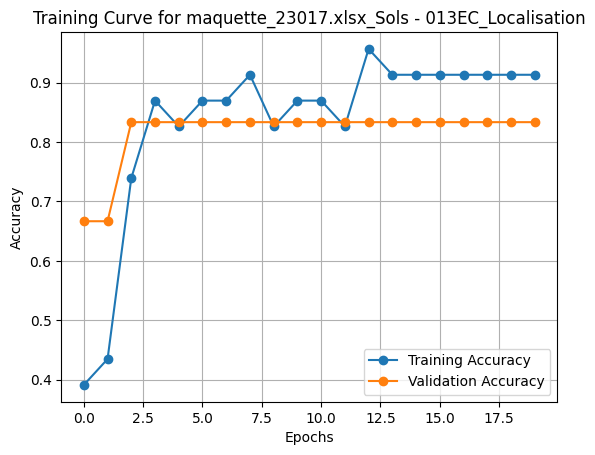

🎯 Training model for target column: 014EC_Mode Constructif
Epoch 1/20
1/1 [==============================] - 1s 791ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/20

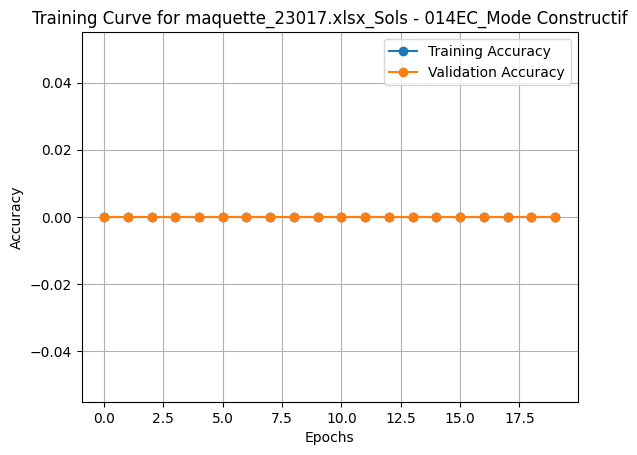


🔄 Processing dataframe: maquette_23016.xlsx_Sols
🎯 Training model for target column: 011EC_Lot
Epoch 1/20
2/2 [==============================] - 1s 232ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 

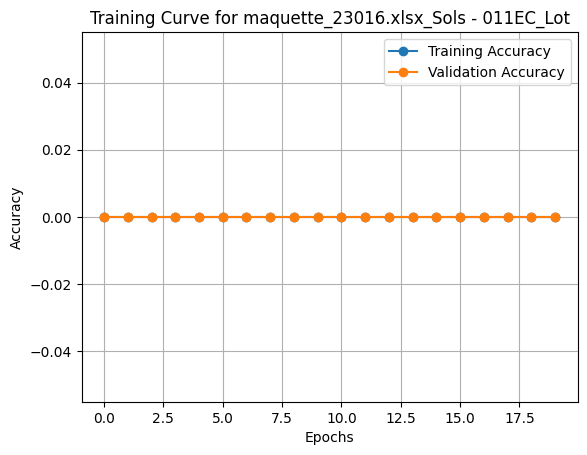

🎯 Training model for target column: 012EC_Ouvrage
Epoch 1/20
2/2 [==============================] - 1s 234ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/20
2/2 [===

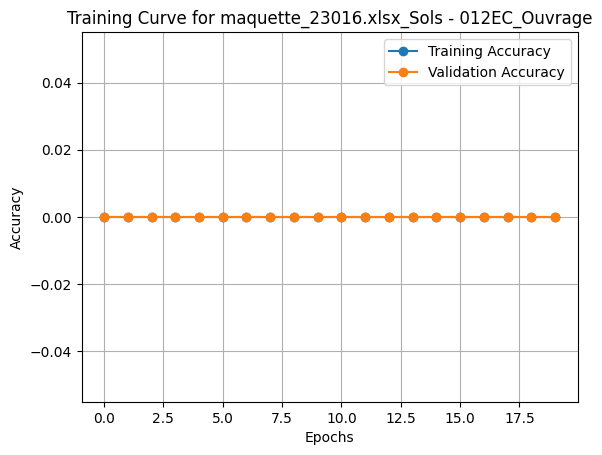

🎯 Training model for target column: 013EC_Localisation
Epoch 1/20
2/2 [==============================] - 1s 232ms/step - loss: 0.6490 - accuracy: 0.6667 - val_loss: 0.9928 - val_accuracy: 0.3333
Epoch 2/20
2/2 [==============================] - 0s 44ms/step - loss: 0.5695 - accuracy: 0.8056 - val_loss: 1.0119 - val_accuracy: 0.4444
Epoch 3/20
2/2 [==============================] - 0s 42ms/step - loss: 0.2927 - accuracy: 0.9444 - val_loss: 1.0294 - val_accuracy: 0.4444
Epoch 4/20
2/2 [==============================] - 0s 45ms/step - loss: 0.2606 - accuracy: 0.9444 - val_loss: 1.0476 - val_accuracy: 0.4444
Epoch 5/20
2/2 [==============================] - 0s 45ms/step - loss: 0.2856 - accuracy: 0.9167 - val_loss: 1.0636 - val_accuracy: 0.4444
Epoch 6/20
2/2 [==============================] - 0s 48ms/step - loss: 0.2030 - accuracy: 0.9444 - val_loss: 1.0831 - val_accuracy: 0.4444
Epoch 7/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1725 - accuracy: 0.9167 - val_loss: 1

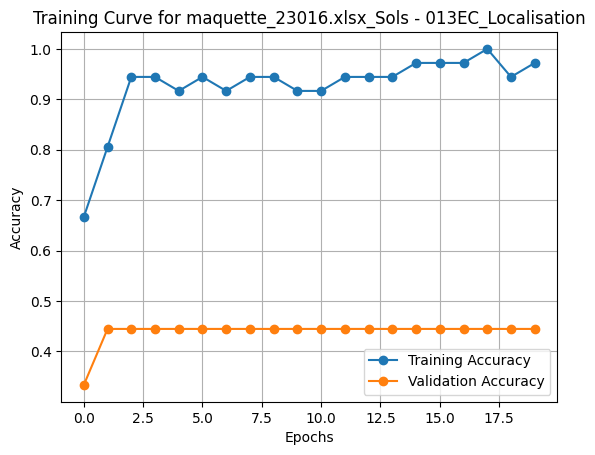

🎯 Training model for target column: 014EC_Mode Constructif
Epoch 1/20
2/2 [==============================] - 1s 226ms/step - loss: 0.9328 - accuracy: 0.3611 - val_loss: 1.1452 - val_accuracy: 0.5556
Epoch 2/20
2/2 [==============================] - 0s 42ms/step - loss: 0.7356 - accuracy: 0.5556 - val_loss: 0.9288 - val_accuracy: 0.5556
Epoch 3/20
2/2 [==============================] - 0s 44ms/step - loss: 0.6472 - accuracy: 0.6389 - val_loss: 0.8203 - val_accuracy: 0.2222
Epoch 4/20
2/2 [==============================] - 0s 41ms/step - loss: 0.3749 - accuracy: 0.8889 - val_loss: 0.7501 - val_accuracy: 0.3333
Epoch 5/20
2/2 [==============================] - 0s 44ms/step - loss: 0.3934 - accuracy: 0.8611 - val_loss: 0.7244 - val_accuracy: 0.3333
Epoch 6/20
2/2 [==============================] - 0s 43ms/step - loss: 0.4039 - accuracy: 0.8333 - val_loss: 0.7308 - val_accuracy: 0.3333
Epoch 7/20
2/2 [==============================] - 0s 46ms/step - loss: 0.3612 - accuracy: 0.8333 - val_los

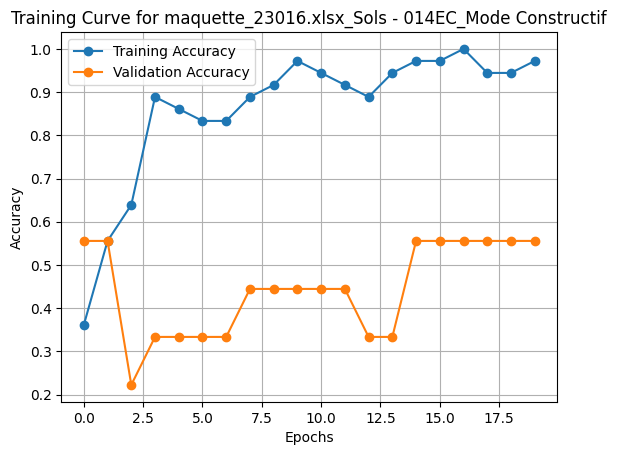


🔄 Processing dataframe: maquette_23002.xlsx_Sols
🎯 Training model for target column: 011EC_Lot
Epoch 1/20
1/1 [==============================] - 1s 844ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 

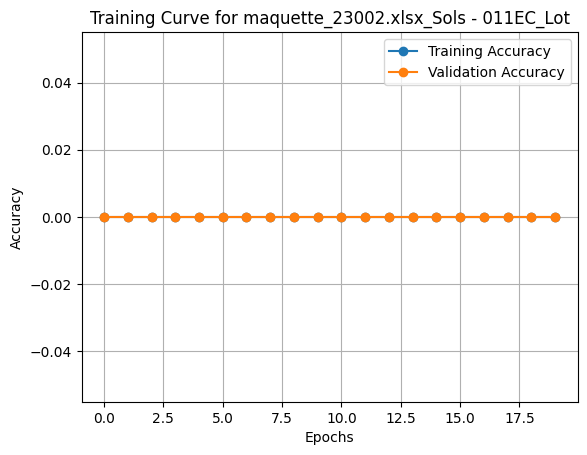

🎯 Training model for target column: 012EC_Ouvrage
Epoch 1/20
1/1 [==============================] - 1s 810ms/step - loss: 0.5521 - accuracy: 0.7200 - val_loss: 0.5315 - val_accuracy: 0.8571
Epoch 2/20
1/1 [==============================] - 0s 51ms/step - loss: 0.5808 - accuracy: 0.7200 - val_loss: 0.4997 - val_accuracy: 0.8571
Epoch 3/20
1/1 [==============================] - 0s 44ms/step - loss: 0.5589 - accuracy: 0.7200 - val_loss: 0.4659 - val_accuracy: 0.8571
Epoch 4/20
1/1 [==============================] - 0s 46ms/step - loss: 0.6072 - accuracy: 0.7200 - val_loss: 0.4366 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 46ms/step - loss: 0.4554 - accuracy: 0.9200 - val_loss: 0.4098 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 43ms/step - loss: 0.5046 - accuracy: 0.7600 - val_loss: 0.3851 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 52ms/step - loss: 0.4250 - accuracy: 0.8400 - val_loss: 0.3627

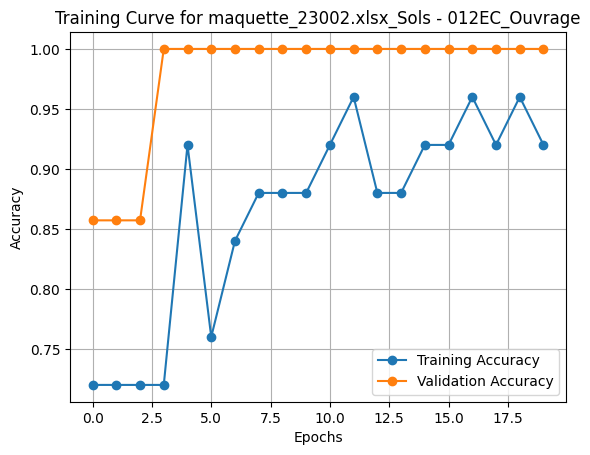

🎯 Training model for target column: 013EC_Localisation
Epoch 1/20
1/1 [==============================] - 1s 806ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 54ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 46ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/20
1/1

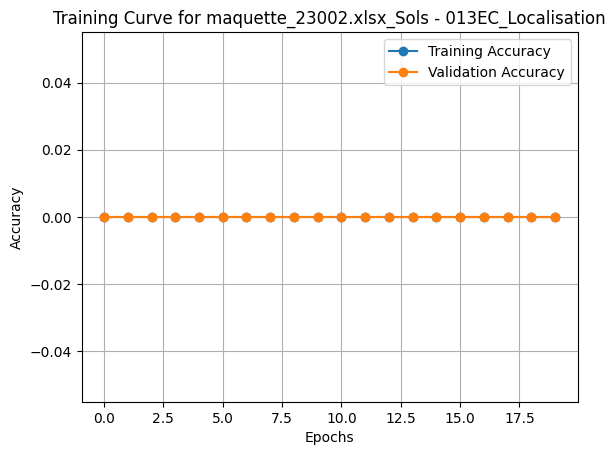

🎯 Training model for target column: 014EC_Mode Constructif
Epoch 1/20
1/1 [==============================] - 1s 838ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 46ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 46ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/20

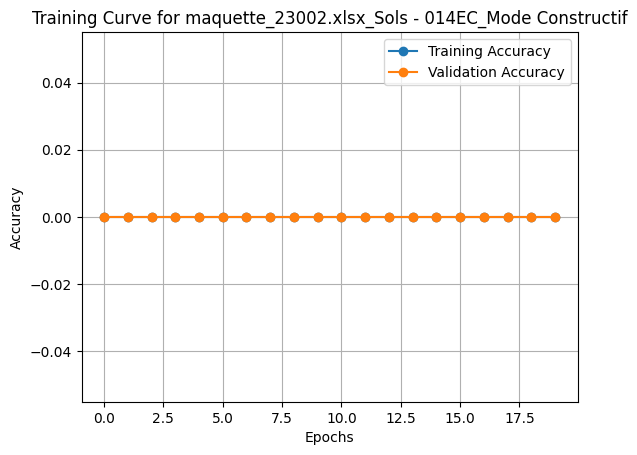


🔄 Processing dataframe: RawData-Cibles.xlsx_Sols
🎯 Training model for target column: 011EC_Lot
Epoch 1/20
3/3 [==============================] - 1s 160ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
3/3 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/20
3/3 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/20
3/3 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/20
3/3 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/20
3/3 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 

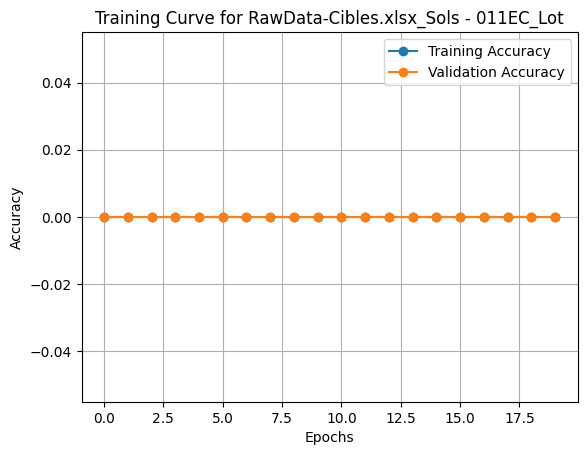

🎯 Training model for target column: 012EC_Ouvrage
Epoch 1/20
3/3 [==============================] - 1s 125ms/step - loss: 1.6474 - accuracy: 0.2706 - val_loss: 1.3995 - val_accuracy: 0.6364
Epoch 2/20
3/3 [==============================] - 0s 24ms/step - loss: 1.3308 - accuracy: 0.4941 - val_loss: 1.2912 - val_accuracy: 0.6818
Epoch 3/20
3/3 [==============================] - 0s 25ms/step - loss: 1.1864 - accuracy: 0.6000 - val_loss: 1.2233 - val_accuracy: 0.6818
Epoch 4/20
3/3 [==============================] - 0s 25ms/step - loss: 1.0778 - accuracy: 0.6000 - val_loss: 1.1699 - val_accuracy: 0.6818
Epoch 5/20
3/3 [==============================] - 0s 23ms/step - loss: 0.9140 - accuracy: 0.7529 - val_loss: 1.1268 - val_accuracy: 0.6818
Epoch 6/20
3/3 [==============================] - 0s 23ms/step - loss: 0.8822 - accuracy: 0.7176 - val_loss: 1.0940 - val_accuracy: 0.6818
Epoch 7/20
3/3 [==============================] - 0s 24ms/step - loss: 0.8797 - accuracy: 0.6941 - val_loss: 1.0719

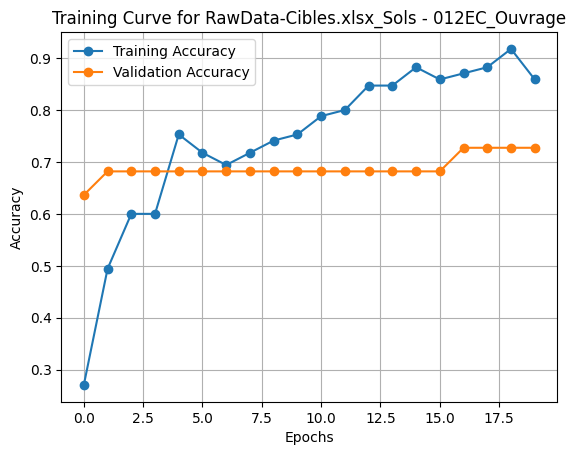

🎯 Training model for target column: 013EC_Localisation
Epoch 1/20
3/3 [==============================] - 1s 112ms/step - loss: 1.4599 - accuracy: 0.4000 - val_loss: 1.6144 - val_accuracy: 0.6364
Epoch 2/20
3/3 [==============================] - 0s 23ms/step - loss: 1.3880 - accuracy: 0.4706 - val_loss: 1.5054 - val_accuracy: 0.6818
Epoch 3/20
3/3 [==============================] - 0s 27ms/step - loss: 1.0703 - accuracy: 0.6941 - val_loss: 1.5133 - val_accuracy: 0.6818
Epoch 4/20
3/3 [==============================] - 0s 55ms/step - loss: 0.8935 - accuracy: 0.7294 - val_loss: 1.5236 - val_accuracy: 0.6818
Epoch 5/20
3/3 [==============================] - 0s 29ms/step - loss: 0.8638 - accuracy: 0.7294 - val_loss: 1.5349 - val_accuracy: 0.6818
Epoch 6/20
3/3 [==============================] - 0s 25ms/step - loss: 0.7386 - accuracy: 0.7529 - val_loss: 1.5358 - val_accuracy: 0.6818
Epoch 7/20
3/3 [==============================] - 0s 25ms/step - loss: 0.7221 - accuracy: 0.7529 - val_loss: 1

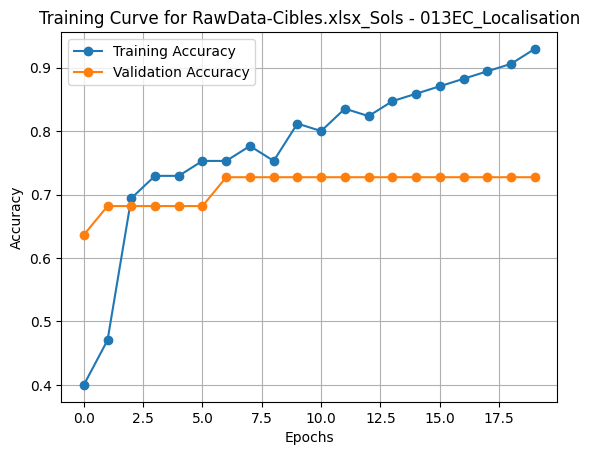

🎯 Training model for target column: 014EC_Mode Constructif
Epoch 1/20
3/3 [==============================] - 1s 138ms/step - loss: 1.1526 - accuracy: 0.3059 - val_loss: 0.5753 - val_accuracy: 0.8636
Epoch 2/20
3/3 [==============================] - 0s 22ms/step - loss: 0.6776 - accuracy: 0.6118 - val_loss: 0.4211 - val_accuracy: 0.9545
Epoch 3/20
3/3 [==============================] - 0s 24ms/step - loss: 0.3611 - accuracy: 0.8824 - val_loss: 0.3214 - val_accuracy: 0.9545
Epoch 4/20
3/3 [==============================] - 0s 21ms/step - loss: 0.2215 - accuracy: 0.9529 - val_loss: 0.2591 - val_accuracy: 0.9545
Epoch 5/20
3/3 [==============================] - 0s 22ms/step - loss: 0.1709 - accuracy: 0.9765 - val_loss: 0.2201 - val_accuracy: 0.9545
Epoch 6/20
3/3 [==============================] - 0s 23ms/step - loss: 0.0969 - accuracy: 0.9765 - val_loss: 0.1976 - val_accuracy: 0.9545
Epoch 7/20
3/3 [==============================] - 0s 24ms/step - loss: 0.1282 - accuracy: 0.9765 - val_los

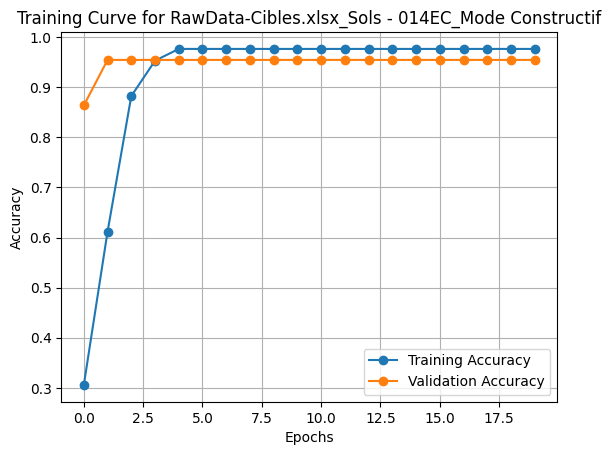


🔄 Processing dataframe: RawData-Cibles.xlsx_Poteaux
🎯 Training model for target column: 011EC_Lot
Epoch 1/20
2/2 [==============================] - 1s 217ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+

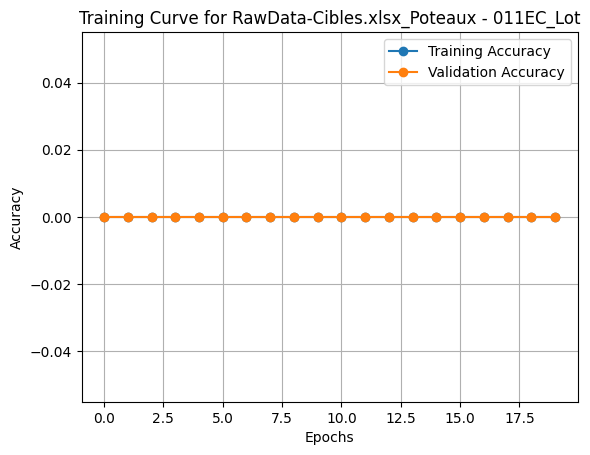

🎯 Training model for target column: 012EC_Ouvrage
Epoch 1/20
2/2 [==============================] - 1s 283ms/step - loss: 1.3022 - accuracy: 0.3704 - val_loss: 1.1466 - val_accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 0s 46ms/step - loss: 1.1261 - accuracy: 0.5185 - val_loss: 1.0881 - val_accuracy: 0.4286
Epoch 3/20
2/2 [==============================] - 0s 44ms/step - loss: 0.8715 - accuracy: 0.5926 - val_loss: 1.0449 - val_accuracy: 0.4286
Epoch 4/20
2/2 [==============================] - 0s 41ms/step - loss: 0.8421 - accuracy: 0.7037 - val_loss: 1.0106 - val_accuracy: 0.4286
Epoch 5/20
2/2 [==============================] - 0s 43ms/step - loss: 0.8282 - accuracy: 0.6667 - val_loss: 0.9876 - val_accuracy: 0.4286
Epoch 6/20
2/2 [==============================] - 0s 43ms/step - loss: 0.7639 - accuracy: 0.6481 - val_loss: 0.9652 - val_accuracy: 0.5000
Epoch 7/20
2/2 [==============================] - 0s 59ms/step - loss: 0.7242 - accuracy: 0.6667 - val_loss: 0.9418

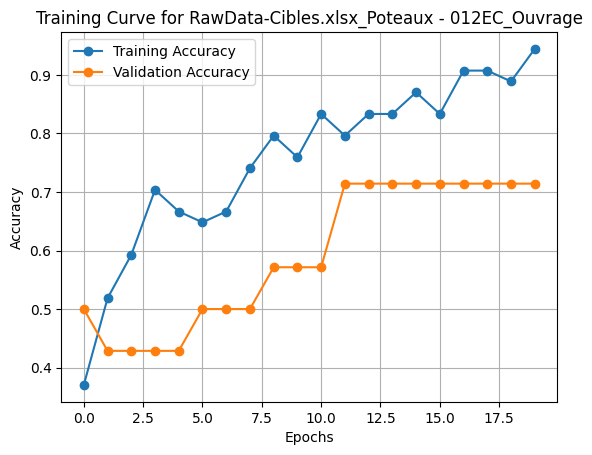

🎯 Training model for target column: 013EC_Localisation
Epoch 1/20
2/2 [==============================] - 1s 222ms/step - loss: 1.1404 - accuracy: 0.3704 - val_loss: 0.9312 - val_accuracy: 0.6429
Epoch 2/20
2/2 [==============================] - 0s 43ms/step - loss: 0.9478 - accuracy: 0.5185 - val_loss: 0.8442 - val_accuracy: 0.6429
Epoch 3/20
2/2 [==============================] - 0s 43ms/step - loss: 0.8310 - accuracy: 0.6296 - val_loss: 0.7803 - val_accuracy: 0.6429
Epoch 4/20
2/2 [==============================] - 0s 41ms/step - loss: 0.7787 - accuracy: 0.6667 - val_loss: 0.7351 - val_accuracy: 0.6429
Epoch 5/20
2/2 [==============================] - 0s 42ms/step - loss: 0.7474 - accuracy: 0.6852 - val_loss: 0.7019 - val_accuracy: 0.6429
Epoch 6/20
2/2 [==============================] - 0s 47ms/step - loss: 0.6788 - accuracy: 0.6667 - val_loss: 0.6738 - val_accuracy: 0.6429
Epoch 7/20
2/2 [==============================] - 0s 45ms/step - loss: 0.6164 - accuracy: 0.7407 - val_loss: 0

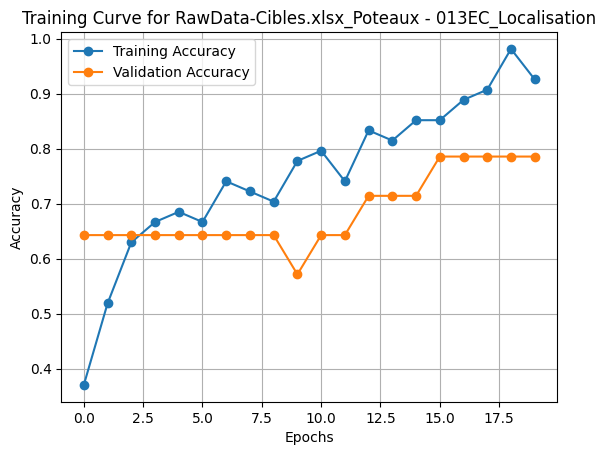

🎯 Training model for target column: 014EC_Mode Constructif
Epoch 1/20
2/2 [==============================] - 1s 223ms/step - loss: 1.4756 - accuracy: 0.2778 - val_loss: 1.2529 - val_accuracy: 0.2857
Epoch 2/20
2/2 [==============================] - 0s 44ms/step - loss: 1.1747 - accuracy: 0.5741 - val_loss: 1.0976 - val_accuracy: 0.5714
Epoch 3/20
2/2 [==============================] - 0s 41ms/step - loss: 0.9855 - accuracy: 0.5556 - val_loss: 0.9774 - val_accuracy: 0.7143
Epoch 4/20
2/2 [==============================] - 0s 44ms/step - loss: 0.7759 - accuracy: 0.6667 - val_loss: 0.8878 - val_accuracy: 0.7143
Epoch 5/20
2/2 [==============================] - 0s 45ms/step - loss: 0.8805 - accuracy: 0.5741 - val_loss: 0.8171 - val_accuracy: 0.7143
Epoch 6/20
2/2 [==============================] - 0s 43ms/step - loss: 0.6873 - accuracy: 0.7407 - val_loss: 0.7585 - val_accuracy: 0.7143
Epoch 7/20
2/2 [==============================] - 0s 57ms/step - loss: 0.6301 - accuracy: 0.7222 - val_los

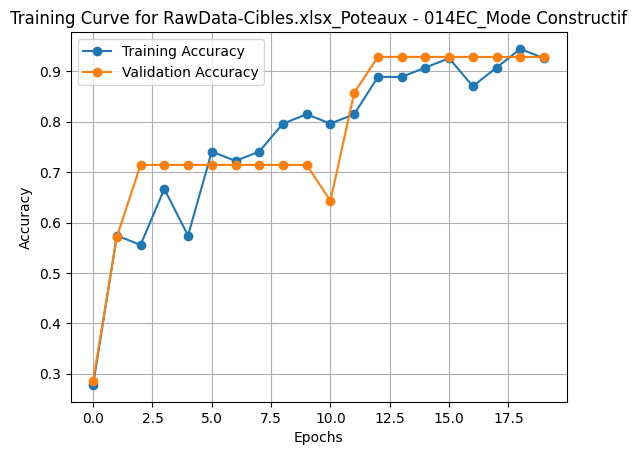


🔄 Processing dataframe: maquette_23001.xlsx_Sols
🎯 Training model for target column: 011EC_Lot
Epoch 1/20
3/3 [==============================] - 1s 118ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
3/3 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/20
3/3 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/20
3/3 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/20
3/3 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/20
3/3 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 

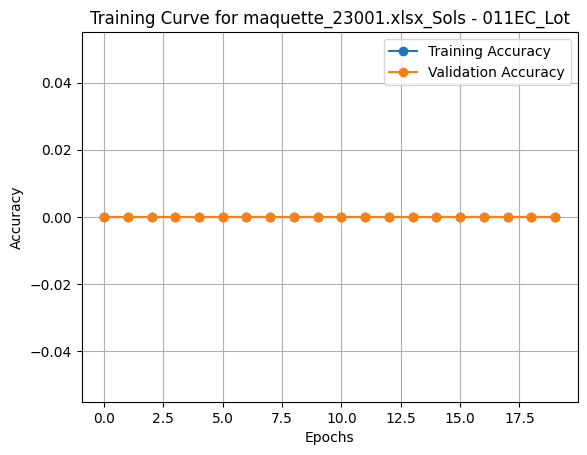

🎯 Training model for target column: 012EC_Ouvrage
Epoch 1/20
3/3 [==============================] - 1s 115ms/step - loss: 2.5975 - accuracy: 0.1176 - val_loss: 2.3699 - val_accuracy: 0.0455
Epoch 2/20
3/3 [==============================] - 0s 27ms/step - loss: 2.0598 - accuracy: 0.2118 - val_loss: 1.6559 - val_accuracy: 0.3636
Epoch 3/20
3/3 [==============================] - 0s 25ms/step - loss: 1.6090 - accuracy: 0.4000 - val_loss: 1.3494 - val_accuracy: 0.6364
Epoch 4/20
3/3 [==============================] - 0s 25ms/step - loss: 1.2300 - accuracy: 0.5647 - val_loss: 1.2361 - val_accuracy: 0.7273
Epoch 5/20
3/3 [==============================] - 0s 26ms/step - loss: 1.0382 - accuracy: 0.6588 - val_loss: 1.1558 - val_accuracy: 0.7273
Epoch 6/20
3/3 [==============================] - 0s 24ms/step - loss: 1.0039 - accuracy: 0.6824 - val_loss: 1.1022 - val_accuracy: 0.7273
Epoch 7/20
3/3 [==============================] - 0s 24ms/step - loss: 0.8342 - accuracy: 0.7647 - val_loss: 1.0643

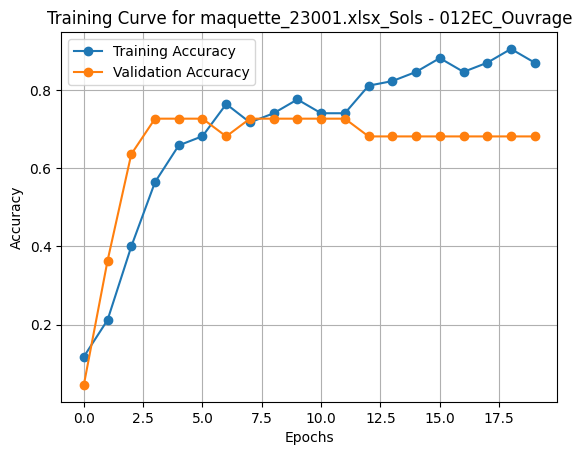

🎯 Training model for target column: 013EC_Localisation
Epoch 1/20
3/3 [==============================] - 1s 139ms/step - loss: 2.2662 - accuracy: 0.0706 - val_loss: 1.8226 - val_accuracy: 0.2273
Epoch 2/20
3/3 [==============================] - 0s 26ms/step - loss: 1.6549 - accuracy: 0.3176 - val_loss: 1.5933 - val_accuracy: 0.5909
Epoch 3/20
3/3 [==============================] - 0s 26ms/step - loss: 1.2718 - accuracy: 0.5765 - val_loss: 1.6263 - val_accuracy: 0.6818
Epoch 4/20
3/3 [==============================] - 0s 25ms/step - loss: 0.9700 - accuracy: 0.6941 - val_loss: 1.6705 - val_accuracy: 0.6818
Epoch 5/20
3/3 [==============================] - 0s 31ms/step - loss: 0.8336 - accuracy: 0.7647 - val_loss: 1.7433 - val_accuracy: 0.6818
Epoch 6/20
3/3 [==============================] - 0s 30ms/step - loss: 0.7481 - accuracy: 0.7412 - val_loss: 1.7630 - val_accuracy: 0.6818
Epoch 7/20
3/3 [==============================] - 0s 27ms/step - loss: 0.6675 - accuracy: 0.7647 - val_loss: 1

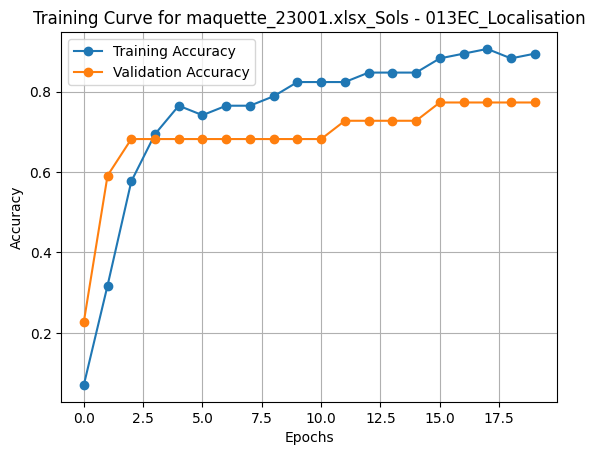

🎯 Training model for target column: 014EC_Mode Constructif
Epoch 1/20
3/3 [==============================] - 1s 139ms/step - loss: 0.8176 - accuracy: 0.5412 - val_loss: 0.4789 - val_accuracy: 0.9545
Epoch 2/20
3/3 [==============================] - 0s 26ms/step - loss: 0.3991 - accuracy: 0.8588 - val_loss: 0.3533 - val_accuracy: 0.9545
Epoch 3/20
3/3 [==============================] - 0s 25ms/step - loss: 0.2122 - accuracy: 0.9412 - val_loss: 0.2768 - val_accuracy: 0.9545
Epoch 4/20
3/3 [==============================] - 0s 27ms/step - loss: 0.1126 - accuracy: 0.9765 - val_loss: 0.2306 - val_accuracy: 0.9545
Epoch 5/20
3/3 [==============================] - 0s 27ms/step - loss: 0.0997 - accuracy: 0.9765 - val_loss: 0.1998 - val_accuracy: 0.9545
Epoch 6/20
3/3 [==============================] - 0s 26ms/step - loss: 0.0941 - accuracy: 0.9765 - val_loss: 0.1810 - val_accuracy: 0.9545
Epoch 7/20
3/3 [==============================] - 0s 30ms/step - loss: 0.0874 - accuracy: 0.9765 - val_los

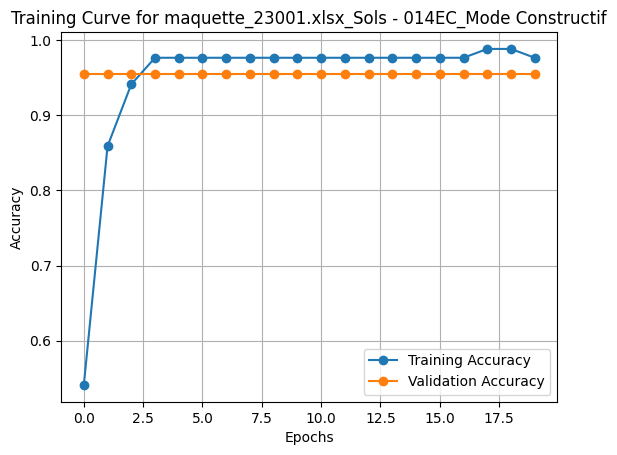


🔄 Processing dataframe: maquette_23001.xlsx_Poteaux
🎯 Training model for target column: 011EC_Lot
Epoch 1/20
2/2 [==============================] - 2s 259ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 0s 58ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/20
2/2 [==============================] - 0s 58ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+

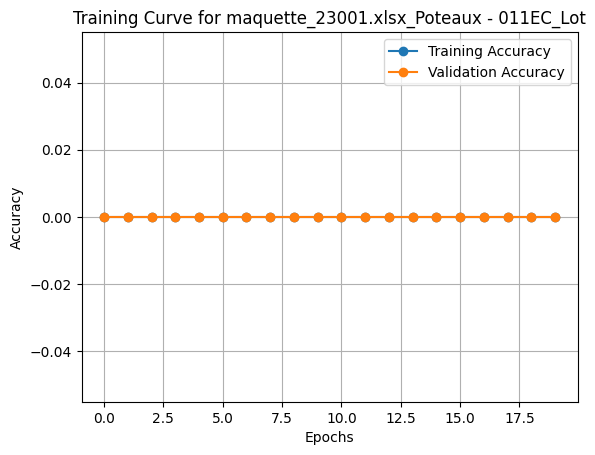

🎯 Training model for target column: 012EC_Ouvrage
Epoch 1/20
2/2 [==============================] - 1s 288ms/step - loss: 0.9701 - accuracy: 0.6667 - val_loss: 1.0582 - val_accuracy: 0.4286
Epoch 2/20
2/2 [==============================] - 0s 52ms/step - loss: 0.9061 - accuracy: 0.6481 - val_loss: 1.0108 - val_accuracy: 0.4286
Epoch 3/20
2/2 [==============================] - 0s 53ms/step - loss: 0.7935 - accuracy: 0.6481 - val_loss: 0.9740 - val_accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 0s 49ms/step - loss: 0.7943 - accuracy: 0.7222 - val_loss: 0.9367 - val_accuracy: 0.5000
Epoch 5/20
2/2 [==============================] - 0s 51ms/step - loss: 0.6695 - accuracy: 0.7593 - val_loss: 0.9047 - val_accuracy: 0.5000
Epoch 6/20
2/2 [==============================] - 0s 54ms/step - loss: 0.6171 - accuracy: 0.7222 - val_loss: 0.8746 - val_accuracy: 0.5000
Epoch 7/20
2/2 [==============================] - 0s 53ms/step - loss: 0.6450 - accuracy: 0.7593 - val_loss: 0.8439

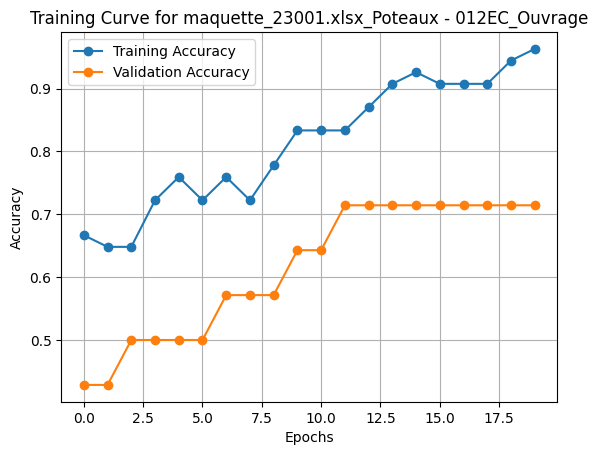

🎯 Training model for target column: 013EC_Localisation
Epoch 1/20
2/2 [==============================] - 1s 236ms/step - loss: 1.2824 - accuracy: 0.3519 - val_loss: 0.8824 - val_accuracy: 0.6429
Epoch 2/20
2/2 [==============================] - 0s 47ms/step - loss: 0.9785 - accuracy: 0.5370 - val_loss: 0.7930 - val_accuracy: 0.7143
Epoch 3/20
2/2 [==============================] - 0s 48ms/step - loss: 0.9440 - accuracy: 0.6296 - val_loss: 0.7277 - val_accuracy: 0.7143
Epoch 4/20
2/2 [==============================] - 0s 48ms/step - loss: 0.9678 - accuracy: 0.5741 - val_loss: 0.6823 - val_accuracy: 0.6429
Epoch 5/20
2/2 [==============================] - 0s 48ms/step - loss: 0.8095 - accuracy: 0.6852 - val_loss: 0.6489 - val_accuracy: 0.6429
Epoch 6/20
2/2 [==============================] - 0s 49ms/step - loss: 0.7646 - accuracy: 0.6667 - val_loss: 0.6243 - val_accuracy: 0.6429
Epoch 7/20
2/2 [==============================] - 0s 48ms/step - loss: 0.7255 - accuracy: 0.6852 - val_loss: 0

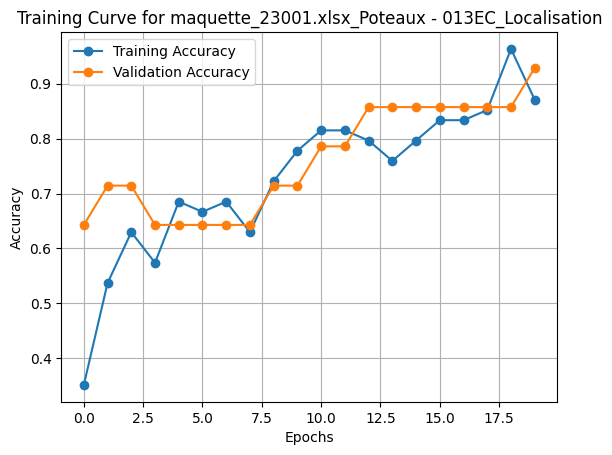

🎯 Training model for target column: 014EC_Mode Constructif
Epoch 1/20
2/2 [==============================] - -1s -1747040us/step - loss: 1.2359 - accuracy: 0.2593 - val_loss: 1.0190 - val_accuracy: 0.4286
Epoch 2/20
2/2 [==============================] - 0s 47ms/step - loss: 1.2210 - accuracy: 0.3519 - val_loss: 0.9217 - val_accuracy: 0.7143
Epoch 3/20
2/2 [==============================] - 0s 45ms/step - loss: 0.7963 - accuracy: 0.6667 - val_loss: 0.8460 - val_accuracy: 0.7857
Epoch 4/20
2/2 [==============================] - 0s 50ms/step - loss: 0.8053 - accuracy: 0.7037 - val_loss: 0.7847 - val_accuracy: 0.7857
Epoch 5/20
2/2 [==============================] - 0s 50ms/step - loss: 0.7143 - accuracy: 0.7037 - val_loss: 0.7328 - val_accuracy: 0.6429
Epoch 6/20
2/2 [==============================] - 0s 45ms/step - loss: 0.6337 - accuracy: 0.7407 - val_loss: 0.6855 - val_accuracy: 0.6429
Epoch 7/20
2/2 [==============================] - 0s 48ms/step - loss: 0.4739 - accuracy: 0.8148 - v

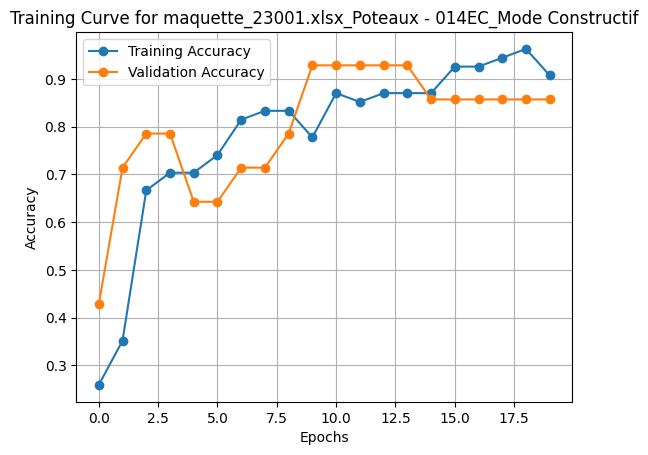

In [61]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Iterate over all cleaned dataframes and target columns
for df_name, df in final_cleaned_dataframes.items():
    print(f"\n🔄 Processing dataframe: {df_name}")

    # Ensure TARGET_COLUMNS exists in the dataframe
    missing_targets = set(TARGET_COLUMNS) - set(df.columns)
    if missing_targets:
        print(f"⚠️ Missing target columns in {df_name}: {missing_targets}. Skipping...")
        continue

    for target_col in TARGET_COLUMNS:
        print(f"🎯 Training model for target column: {target_col}")

        # Prepare features and target
        X = df.drop(columns=TARGET_COLUMNS).fillna(0)
        y = df[target_col].fillna(0)

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Build and compile the model
        num_features = X_train_scaled.shape[1]
        num_classes = len(np.unique(y_train))
        model = keras.Sequential([
            keras.layers.Dense(128, activation='relu', input_shape=(num_features,)),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(num_classes, activation='softmax')
        ])
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Train the model
        # Ensure labels are within the valid range
        y_train = y_train.clip(0, num_classes - 1)
        y_test = y_test.clip(0, num_classes - 1)

        history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

        # Plot Training and Validation Accuracy
        plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Training Curve for {df_name} - {target_col}')
        plt.legend()
        plt.grid(True)
        plt.show()



🚀 Training on maquette_23017.xlsx_Sols with target 011EC_Lot...

🚀 Training on maquette_23017.xlsx_Sols with target 014EC_Mode Constructif...

🚀 Training on maquette_23017.xlsx_Sols with target 013EC_Localisation...

🚀 Training on maquette_23017.xlsx_Sols with target 012EC_Ouvrage...

🚀 Training on maquette_23016.xlsx_Sols with target 011EC_Lot...

🚀 Training on maquette_23016.xlsx_Sols with target 014EC_Mode Constructif...

🚀 Training on maquette_23016.xlsx_Sols with target 013EC_Localisation...

🚀 Training on maquette_23016.xlsx_Sols with target 012EC_Ouvrage...

🚀 Training on maquette_23002.xlsx_Sols with target 011EC_Lot...

🚀 Training on maquette_23002.xlsx_Sols with target 014EC_Mode Constructif...

🚀 Training on maquette_23002.xlsx_Sols with target 013EC_Localisation...

🚀 Training on maquette_23002.xlsx_Sols with target 012EC_Ouvrage...

🚀 Training on RawData-Cibles.xlsx_Sols with target 011EC_Lot...

🚀 Training on RawData-Cibles.xlsx_Sols with target 014EC_Mode Constructif...

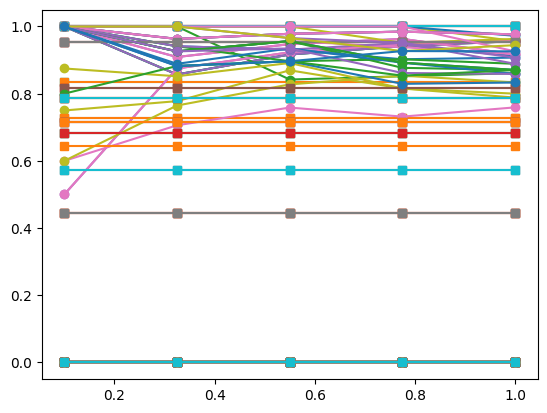

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Ensure directories exist
os.makedirs('models/deep_learning', exist_ok=True)
os.makedirs('plots', exist_ok=True)

# Ensure train_test_data exists
if "train_test_data" not in globals():
    raise ValueError("🚨 No train-test data found! Make sure previous models processed data correctly.")

# Load train-test splits from ML models
dataset_name = list(train_test_data.keys())[0]  # Use first dataset
X_train, X_test, y_train, y_test = train_test_data[dataset_name]

# Function to process text features
def process_text_features(X_train, X_test):
    text_columns = X_train.select_dtypes(include=["object"]).columns.tolist()
    print(f"📌 Text columns detected: {text_columns}")

    if text_columns:
        vectorizer = TfidfVectorizer(max_features=500)
        X_train_text = pd.DataFrame(vectorizer.fit_transform(X_train[text_columns].fillna("").apply(lambda x: " ".join(x), axis=1)).toarray(), index=X_train.index)
        X_test_text = pd.DataFrame(vectorizer.transform(X_test[text_columns].fillna("").apply(lambda x: " ".join(x), axis=1)).toarray(), index=X_test.index)
    else:
        X_train_text = pd.DataFrame(index=X_train.index)
        X_test_text = pd.DataFrame(index=X_test.index)

    return X_train_text, X_test_text

# Function to scale numerical features
def preprocess_numerical_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.select_dtypes(exclude=["object"])), columns=X_train.select_dtypes(exclude=["object"]).columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test.select_dtypes(exclude=["object"])), columns=X_test.select_dtypes(exclude=["object"]).columns, index=X_test.index)

    return X_train_scaled, X_test_scaled

# Process features
X_train_text, X_test_text = process_text_features(X_train, X_test)
X_train_scaled, X_test_scaled = preprocess_numerical_features(X_train, X_test)

# Combine text and numerical features
X_train_combined = np.hstack([X_train_scaled, X_train_text])
X_test_combined = np.hstack([X_test_scaled, X_test_text])

print(f"✅ Final X_train_combined shape: {X_train_combined.shape}")
print(f"✅ Final X_test_combined shape: {X_test_combined.shape}")

# Define deep learning models
deep_models = {
    "DNN": keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_train_combined.shape[1],)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(len(set(y_train)), activation='softmax')
    ]),
    "Wide & Deep": keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train_combined.shape[1],)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(len(set(y_train)), activation='softmax')
    ]),
    "TabNet": keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_train_combined.shape[1],)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(len(set(y_train)), activation='softmax')
    ])
}

# Train models and evaluate performance
model_results = {}
plt.figure(figsize=(8, 5))

for name, model in deep_models.items():
    print(f"\n🚀 Training {name}...")

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_combined, y_train, epochs=20, batch_size=32, validation_data=(X_test_combined, y_test), verbose=0)

    final_val_accuracy = max(history.history['val_accuracy'])
    model_results[name] = final_val_accuracy

    print(f"✅ {name}: Best Validation Accuracy = {final_val_accuracy:.4f}")

    # Plot learning curves
    plt.plot(history.history['val_accuracy'], marker='o', label=f"{name} (Acc: {final_val_accuracy:.2f})")

    # Save trained models
    model.save(os.path.join(DL_MODELS_DIR, f'{name}_best_model.keras'))
best_model.model.save(os.path.join(DL_MODELS_DIR, 'best_model_tuned.keras'))

# Ranking models based on validation accuracy
ranked_models = sorted(model_results.items(), key=lambda x: x[1], reverse=True)
ranking_df = pd.DataFrame(ranked_models, columns=["Model", "Validation Accuracy"])
print(f"\n📊 Model Ranking:\n{ranking_df.to_string(index=False)}")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Deep Learning Model Comparison")
plt.legend(loc="best")
plt.grid()
plt.savefig(f'plots/deep_learning_learning_curves.png')
plt.show()

print("\n🚀 Deep Learning Model Training, Ranking, and Saving Completed!")

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OneHotEncoder
import matplotlib.pyplot as pltimport matplotlib.pyplot as plt

# Ensure directories exist
os.makedirs('models/deep_learning', exist_ok=True) exist_ok=True)
os.makedirs('plots', exist_ok=True)os.makedirs('plots', exist_ok=True)

# Load train-test splits from ML models
dataset_name = list(train_test_data.keys())[0]  # Use first dataset
X_train, X_test, y_train, y_test = train_test_data[dataset_name]

# Process text features
def process_text_features(X_train, X_test):
    text_columns = X_train.select_dtypes(include=["object"]).columns.tolist()
    print(f"📌 Text columns detected: {text_columns}")

    if text_columns:
        vectorizer = TfidfVectorizer(max_features=500)
        X_train_text = pd.DataFrame(vectorizer.fit_transform(X_train[text_columns].fillna("").apply(lambda x: " ".join(x), axis=1)).toarray(), index=X_train.index).index)
        X_test_text = pd.DataFrame(vectorizer.transform(X_test[text_columns].fillna("").apply(lambda x: " ".join(x), axis=1)).toarray(), index=X_test.index)_test_text = pd.DataFrame(vectorizer.transform(X_test[text_columns].fillna("").apply(lambda x: " ".join(x), axis=1)).toarray(), index=X_test.index)
    else:
        X_train_text = pd.DataFrame(index=X_train.index)x)
        X_test_text = pd.DataFrame(index=X_test.index)        X_test_text = pd.DataFrame(index=X_test.index)

    return X_train_text, X_test_text    return X_train_text, X_test_text

# Scale numerical features
def preprocess_numerical_features(X_train, X_test):ures(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.select_dtypes(exclude=["object"])), columns=X_train.select_dtypes(exclude=["object"]).columns, index=X_train.index)n.index)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test.select_dtypes(exclude=["object"])), columns=X_test.select_dtypes(exclude=["object"]).columns, index=X_test.index)    X_test_scaled = pd.DataFrame(scaler.transform(X_test.select_dtypes(exclude=["object"])), columns=X_test.select_dtypes(exclude=["object"]).columns, index=X_test.index)

    return X_train_scaled, X_test_scaled    return X_train_scaled, X_test_scaled

# Process categorical features
def process_categorical_features(X_train, X_test):
    categorical_columns = X_train.select_dtypes(include=["category", "object"]).columns.tolist()tegory", "object"]).columns.tolist()
    print(f"📌 Categorical columns detected: {categorical_columns}")_columns}")

    if categorical_columns:
        encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)False)
        X_train_encoded
        X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]), index=X_test.index)
    else:
        X_train_encoded = pd.DataFrame(index=X_train.index)
        X_test_encoded = pd.DataFrame(index=X_test.index)

    return X_train_encoded, X_test_encoded

# Prepare data
X_train_text, X_test_text = process_text_features(X_train, X_test)
X_train_scaled, X_test_scaled = preprocess_numerical_features(X_train, X_test)
# Function to build model dynamically
def build_model(units_1, units_2, dropout_1, dropout_2, learning_rate):
    model = keras.Sequential([
        keras.layers.Dense(units_1, activation='relu', input_shape=(X_train_combined.shape[1],)),
        keras.layers.Dropout(dropout_1),
        keras.layers.Dense(units_2, activation='relu'),
        keras.layers.Dropout(dropout_2),
        keras.layers.Dense(len(set(y_train)), activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to optimize hyperparameters
def tune_hyperparameters():
    def objective(**params):
        model = build_model(**params)
        history = model.fit(X_train_combined, y_train, epochs=20, batch_size=params['batch_size'], validation_data=(X_test_combined, y_test), verbose=0)
        return max(history.history['val_accuracy'])

    opt = BayesSearchCV(
        estimator=keras.wrappers.scikit_learn.KerasClassifier(build_model),
        search_spaces=param_space,
        n_iter=50,
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )

    opt.fit(X_train_combined, y_train)
    return opt.best_estimator_, opt.best_params_

# Run hyperparameter tuning
best_model, best_params = tune_hyperparameters()

print(f"\n✅ Best Hyperparameters: {best_params}")

# Train final model
history = best_model.fit(X_train_combined, y_train, epochs=50, batch_size=best_params['batch_size'], validation_data=(X_test_combined, y_test))

# Plot Learning Curve
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(f'Deep Learning Training Curve - {dataset_name}')
plt.legend()
plt.grid()
plt.savefig(f'plots/deep_learning_tuned_learning_curve.png')
plt.show()

# Save best model
best_model.model.save(os.path.join(DL_MODELS_DIR, 'best_model_tuned.keras'))


print("\n🚀 Deep Learning Model Training & Hyperparameter Tuning Completed!")

## Testing on maquettes 


In [34]:
import pandas as pd
import os

def load_excel_files(directory):
    """Loads all Excel files from the specified directory and displays their heads."""
    new_dataframes = {}

    for file in os.listdir(directory):
        if file.endswith(".xlsx") or file.endswith(".xls"):
            file_path = os.path.join(directory, file)
            df_name = os.path.splitext(file)[0]  # Use filename as key
            new_dataframes[df_name] = pd.read_excel(file_path)
            print(f"\n✅ Loaded {file}")
            print(new_dataframes[df_name].head())  # 👀 Show first few rows

    return new_dataframes

new_dataframes = load_excel_files(os.path.join(TESTING_DATA_DIR))


✅ Loaded maquette_23017.xlsx
       Id 011EC_Lot 012EC_Ouvrage 013EC_Localisation 014EC_Mode Constructif  \
0  330447        GO           MUR                 JD                 BANCHE   
1  330452        GO           MUR                 JD                 BANCHE   
2  330487        GO           MUR          INTERIEUR                 BANCHE   
3  330488        GO           MUR          INTERIEUR                 BANCHE   
4  330489        GO           MUR          INTERIEUR                 BANCHE   

                Nom  Hauteur  Epaisseur   AI    AS  ...  \
0  EIF_VOILE_INT 16     2.87       0.16  0.0  2.87  ...   
1  EIF_VOILE_INT 16     2.87       0.16  0.0  2.87  ...   
2  EIF_VOILE_INT_20     2.75       0.20  0.0  2.75  ...   
3  EIF_VOILE_INT_20     2.72       0.20  0.0  2.72  ...   
4  EIF_VOILE_INT_20     2.75       0.20  0.0  2.75  ...   

   Motif vue détail faible  Marque de type  Protection contre l'incendie  \
0  <Remplissage de solide>             NaN                      

In [35]:
import os
import joblib
from tensorflow import keras

# Load all ML models from ML_MODELS_DIR
ml_models = {}
for file in os.listdir(ML_MODELS_DIR):
    if file.endswith(".pkl"):
        model_name = os.path.splitext(file)[0]
        model_path = os.path.join(ML_MODELS_DIR, file)
        ml_models[model_name] = joblib.load(model_path)

print(f"✅ Loaded ML models: {list(ml_models.keys())}")

# Load all DL models from DL_MODELS_DIR
dl_models = {}
for file in os.listdir(DL_MODELS_DIR):
    if file.endswith(".keras"):
        model_name = os.path.splitext(file)[0]
        model_path = os.path.join(DL_MODELS_DIR, file)
        dl_models[model_name] = keras.models.load_model(model_path)

print(f"✅ Loaded DL models: {list(dl_models.keys())}")

2025-06-10 11:15:35.429527: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-10 11:15:36.184030: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-06-10 11:15:36.184075: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-06-10 11:15:36.267060: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-10 11:15:38.878067: W tensorflow/stream_executor/platform/de

✅ Loaded ML models: ['KNN_optimized', 'Decision_Tree_combined', 'Gradient_Boosting_combined', 'Decision_Tree_optimized', 'AdaBoost_optimized', 'Random_Forest_optimized', 'Logistic_Regression_optimized', 'SVM_optimized', 'Gradient_Boosting_optimized']
✅ Loaded DL models: []


In [36]:
for df_name, df in new_dataframes.items():
	print(f"Available columns in {df_name}:", df.columns.tolist())

Available columns in maquette_23017: ['Id', '011EC_Lot', '012EC_Ouvrage', '013EC_Localisation', '014EC_Mode Constructif', 'Nom', 'Hauteur', 'Epaisseur', 'AI', 'AS', 'Sols en intersection', 'Sols coupés (u)', 'Sols coupés (Ids)', 'Sols coupants (u)', 'Sols coupants (Ids)', 'Sol au-dessus', 'Sol en-dessous', 'Fenêtres', 'Portes', 'Ouvertures', 'Murs imbriqués', 'Mur multicouche', 'Mur empilé', 'Profil modifié', 'Image', 'Catégorie', 'Section', "Type prédéfini d'IFC", 'Exporter au format IFC sous', 'Exporter au format IFC', 'IfcGUID', 'Variantes', 'Extension inférieure', 'Extension supérieure', 'Volume', 'Surface', 'Phase de démolition', 'Phase de création', 'Commentaires', 'Longueur', 'Famille et type', 'Famille', 'Type', 'Nom de la famille', 'Nom du type', 'ID du type', 'Lié au volume', 'Structure', 'Identifiant', 'Ligne de justification', 'Utilisation structurelle', 'Partie inférieure attachée', 'Partie supérieure attachée', 'Décalage supérieur', 'Décalage inférieur', 'Contrainte infér

In [37]:
def detect_target_columns(df):
    """Automatically detects target columns based on keyword pairs."""
    target_patterns = [("011EC", "Lot"), ("012EC", "Ouvrage"), ("013EC", "Localisation"), ("014EC", "Mode Constructif")]

    detected_targets = [col for col in df.columns if any(k1 in col and k2 in col for k1, k2 in target_patterns)]

    print(f"✅ Detected Target Columns: {detected_targets}")
    return detected_targets

for df_name, df in new_dataframes.items():
    print(f"\n🔍 Processing DataFrame: {df_name}")
    detected_targets = detect_target_columns(df)
    print(f"🎯 Detected Target Columns in {df_name}: {detected_targets}")


🔍 Processing DataFrame: maquette_23017
✅ Detected Target Columns: ['011EC_Lot', '012EC_Ouvrage', '013EC_Localisation', '014EC_Mode Constructif']
🎯 Detected Target Columns in maquette_23017: ['011EC_Lot', '012EC_Ouvrage', '013EC_Localisation', '014EC_Mode Constructif']

🔍 Processing DataFrame: maquette_23016
✅ Detected Target Columns: ['011EC_Lot', '012EC_Ouvrage', '013EC_Localisation', '014EC_Mode Constructif']
🎯 Detected Target Columns in maquette_23016: ['011EC_Lot', '012EC_Ouvrage', '013EC_Localisation', '014EC_Mode Constructif']

🔍 Processing DataFrame: maquette_23015
✅ Detected Target Columns: ['011EC_Lot', '012EC_Ouvrage', '013EC_Localisation', '014EC_Mode Constructif']
🎯 Detected Target Columns in maquette_23015: ['011EC_Lot', '012EC_Ouvrage', '013EC_Localisation', '014EC_Mode Constructif']


In [38]:
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report

def isolate_and_verify_target_columns(new_dataframes, target_columns):
    """Removes target columns and verifies successful isolation."""
    processed_dataframes = {}

    for df_name, df in new_dataframes.items():
        existing_targets = [col for col in target_columns if col in df.columns]

        if not existing_targets:
            print(f"⚠️ No target columns found in {df_name}. Skipping...")
            continue

        print(f"\n🔍 Isolating targets in {df_name}: {existing_targets}")

        # Save actual target values separately
        actual_values = df[existing_targets].copy()

        # Drop target columns from dataset
        df_cleaned = df.drop(columns=existing_targets)

        # Verify removal
        assert all(col not in df_cleaned.columns for col in existing_targets), "❌ Target columns were not properly removed!"

        print(f"✅ Target columns successfully removed from {df_name}")
        print(f"🛠 Cleaned DataFrame Head for {df_name}:\n", df_cleaned.head())

        processed_dataframes[df_name] = (df_cleaned, actual_values)

    return processed_dataframes

# Example usage:
processed_dataframes = isolate_and_verify_target_columns(new_dataframes, detected_targets)


🔍 Isolating targets in maquette_23017: ['011EC_Lot', '012EC_Ouvrage', '013EC_Localisation', '014EC_Mode Constructif']
✅ Target columns successfully removed from maquette_23017
🛠 Cleaned DataFrame Head for maquette_23017:
        Id               Nom  Hauteur  Epaisseur   AI    AS  \
0  330447  EIF_VOILE_INT 16     2.87       0.16  0.0  2.87   
1  330452  EIF_VOILE_INT 16     2.87       0.16  0.0  2.87   
2  330487  EIF_VOILE_INT_20     2.75       0.20  0.0  2.75   
3  330488  EIF_VOILE_INT_20     2.72       0.20  0.0  2.72   
4  330489  EIF_VOILE_INT_20     2.75       0.20  0.0  2.75   

   Sols en intersection  Sols coupés (u)  Sols coupés (Ids)  \
0                     0                0                NaN   
1                     0                0                NaN   
2                     0                0                NaN   
3                     0                0                NaN   
4                     0                0                NaN   

   Sols coupants (u)  ...

In [ ]:
# def align_features(X_test, trained_model):
#     """Ensures the test dataset has the same features as the trained model."""
#     expected_features = trained_model.feature_names_in_

#     # Remove unexpected columns
#     X_test_aligned = X_test[expected_features].copy()

#     print(f"✅ Aligned dataset shape: {X_test_aligned.shape}")
#     return X_test_aligned

# # Example usage:
# # Ensure the file exists before loading
# rf_model_path = os.path.join(ML_MODELS_DIR, "Random_Forest_optimized.pkl")
# if not os.path.exists(rf_model_path):
#     raise FileNotFoundError(f"File not found: {rf_model_path}. Please ensure the model file exists in the specified directory.")

# rf_model = joblib.load(rf_model_path)

# # Define or load X_test (example: using a DataFrame from the `cleaned_dataframes` dictionary)
# X_test = cleaned_dataframes['maquette_23015.xlsx_Sols']  # Replace with the appropriate key

# X_test_aligned = align_features(X_test, rf_model)

KeyError: 'maquette_23015.xlsx_Sols'

In [ ]:
## showing the head of the dataframes we gonna use for predictions
for df_name, (df_cleaned, actual_values) in processed_dataframes.items():
    print(f"\n🛠 Cleaned DataFrame Head for {df_name}:\n", df_cleaned.head())
    print(f"🎯 Actual Values Head for {df_name}:\n", actual_values.head())


In [46]:
import pandas as pd
import numpy as np
## the model cant see the target columns, so we need to align the features
def align_features(X_test, trained_model):
    """Ensures the test dataset has the same features as the trained model."""
    expected_features = trained_model.feature_names_in_

    # Remove unexpected columns
    X_test_aligned = X_test[expected_features].copy()

    print(f"✅ Aligned dataset shape: {X_test_aligned.shape}")
    return X_test_aligned

In [ ]:
import os
import pandas as pd
import numpy as np
import joblib

def convert_predictions_to_text(numeric_preds, target_map):
    """
    Convert numeric predictions to text using target_map.
    If numeric_preds is 1D, convert each element.
    If numeric_preds is 2D, convert each element and return an array.
    """
    if numeric_preds.ndim == 1:
        return np.array([target_map.get(pred, str(pred)) for pred in numeric_preds])
    else:
        # Use np.vectorize to apply the conversion elementwise.
        return np.vectorize(lambda x: target_map.get(x, str(x)))(numeric_preds)

def predict_and_export(mapped_dataframes, ml_models, target_patterns, target_map, output_dir):
    """
    Performs predictions on each Excel-derived DataFrame in mapped_dataframes.
    - Excludes columns that match any of the target pattern tuples.
    - Aligns features as expected by the model (adding missing ones with value 0).
    - Converts numeric predictions to text using target_map.
    - Exports the resulting DataFrame (with predictions appended) to Excel.

    The export file is saved in output_dir with the modified file name:
    "{original_dataframe_name}_{model_name}.xlsx"
    """


    for df_name, X_test in mapped_dataframes.items():
        print(f"\n🚀 Predicting targets for {df_name}...")

        # Exclude any column whose name contains both parts of any target pattern.
        # The comparison uses lower-case to be case-insensitive.
        excluded_columns = [
            col for col in X_test.columns
            if any(k1.lower() in col.lower() and k2.lower() in col.lower() for k1, k2 in target_patterns)
        ]
        X_test_cleaned = X_test.drop(columns=excluded_columns, errors='ignore')
        print(f"✅ Excluded columns from prediction: {excluded_columns}")

        # For each model, perform prediction and export the results.
        for model_name, model in ml_models.items():
            # Work on a copy so that adding missing columns doesn't persist for later models.
            X_aligned = X_test_cleaned.copy()

            # Add any missing features the model expects (with a default value of 0)
            missing_features = set(model.feature_names_in_) - set(X_aligned.columns)
            for feature in missing_features:
                X_aligned[feature] = 0

            # Ensure the feature order matches what the model expects.
            X_aligned = X_aligned.loc[:, model.feature_names_in_]

            try:
                # Make the predictions (assuming the model outputs numeric labels)
                numeric_preds = model.predict(X_aligned)

                # Convert numeric predictions into text using the provided mapping.
                text_preds = convert_predictions_to_text(numeric_preds, target_map)

                # Prepare a DataFrame of predictions.
                # If predictions are multidimensional, assume each column corresponds to one target.
                if text_preds.ndim > 1:
                    # Create column names based on your target patterns.
                    pred_columns = [f"{k1}_{k2}" for k1, k2 in target_patterns]
                    preds_df = pd.DataFrame(text_preds, columns=pred_columns)
                else:
                    preds_df = pd.DataFrame(text_preds, columns=["Prediction"])

                # Combine the original test DataFrame (for context) with predictions.
                export_df = X_test.copy()  # use the original DataFrame with all columns
                # Append predictions as new columns.
                export_df = pd.concat([export_df, preds_df], axis=1)

                # Set the output file name.
                # For example: if df_name is "maquette_23015" and model_name is "Random_Forest_optimized",
                # the file name becomes "maquette_23015_Random_Forest_optimized.xlsx"
                output_file = os.path.join(PREDICTED_DATA_DIR, f"{df_name}_{model_name}.xlsx")
                export_df.to_excel(output_file, index=False)
                print(f"✅ Exported predictions for {df_name} using {model_name} to {output_file}")
            except Exception as e:
                print(f"⚠️ Error predicting with {model_name} on {df_name}: {e}")


target_patterns = [
    ("011EC", "Lot"),
    ("012EC", "Ouvrage"),
    ("013EC", "Localisation"),
    ("014EC", "Mode Constructif")
]

# For instance, if your model returns 0 for "Type A" and 1 for "Type B":
target_map = {0: "Type A", 1: "Type B"}

# Directory for exporting prediction files:
predicting_data_dir = "predicting_data_dir"

# Now call the function.
# (Ensure that `mapped_dataframes` and `ml_models` are defined in your environment.)
predictions = predict_and_export(mapped_dataframes, ml_models, target_patterns, target_map, predicting_data_dir)


🚀 Predicting targets for maquette_23015...
✅ Excluded columns from prediction: ['011EC_Lot', '012EC_Ouvrage', '013EC_Localisation', '014EC_Mode Constructif']
✅ Exported predictions for maquette_23015 using KNN_optimized to ../../data/testing_data/maquette_23015_KNN_optimized.xlsx


/tmp/ipykernel_18965/3348235132.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_aligned[feature] = 0
/tmp/ipykernel_18965/3348235132.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_aligned[feature] = 0
/tmp/ipykernel_18965/3348235132.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

✅ Exported predictions for maquette_23015 using Decision_Tree_combined to ../../data/testing_data/maquette_23015_Decision_Tree_combined.xlsx
⚠️ Error predicting with Gradient_Boosting_combined on maquette_23015: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


/tmp/ipykernel_18965/3348235132.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_aligned[feature] = 0
/tmp/ipykernel_18965/3348235132.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_aligned[feature] = 0
/tmp/ipykernel_18965/3348235132.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

✅ Exported predictions for maquette_23015 using Decision_Tree_optimized to ../../data/testing_data/maquette_23015_Decision_Tree_optimized.xlsx
✅ Exported predictions for maquette_23015 using AdaBoost_optimized to ../../data/testing_data/maquette_23015_AdaBoost_optimized.xlsx
✅ Exported predictions for maquette_23015 using Random_Forest_optimized to ../../data/testing_data/maquette_23015_Random_Forest_optimized.xlsx
✅ Exported predictions for maquette_23015 using Logistic_Regression_optimized to ../../data/testing_data/maquette_23015_Logistic_Regression_optimized.xlsx
✅ Exported predictions for maquette_23015 using SVM_optimized to ../../data/testing_data/maquette_23015_SVM_optimized.xlsx
✅ Exported predictions for maquette_23015 using Gradient_Boosting_optimized to ../../data/testing_data/maquette_23015_Gradient_Boosting_optimized.xlsx


In [ ]:
# import numpy as np
# import joblib
# import tensorflow as tf
# from tensorflow import keras
# from sklearn.metrics import accuracy_score, classification_report

# def predict_with_models(processed_dataframes, ml_model_paths, deep_model_paths):
#     """Uses ML & Deep Learning models to predict target values."""
#     predictions = {}

#     for df_name, (X_test, actual_values) in processed_dataframes.items():
#         print(f"\n🚀 Predicting targets for {df_name}...")

#         # Load trained ML models and make predictions
#         ml_preds = {}
#         for model_name, model_path in ml_model_paths.items():
#             model = joblib.load(model_path)
#             ml_preds[model_name] = model.predict(X_test)

#         # Load trained deep learning models and make predictions
#         deep_preds = {}
#         for model_name, model_path in deep_model_paths.items():
#             deep_model = keras.models.load_model(model_path)
#             deep_preds[model_name] = np.argmax(deep_model.predict(X_test), axis=1)

#         predictions[df_name] = {
#             "ML": ml_preds,
#             "Deep Learning": deep_preds,
#             "Actual": actual_values
#         }

#     return predictions

# # Example usage:
# ml_model_paths = {
#     "Random Forest": "models/machine_learning/Random_Forest_optimized.pkl",
#     "Gradient Boosting": "models/machine_learning/Gradient_Boosting_optimized.pkl"
# }

# deep_model_paths = {
#     "Best Deep Model": "models/deep_learning/best_model_tuned.keras"
# }

# predictions = predict_with_models(processed_dataframes, ml_model_paths, deep_model_paths)

In [ ]:
print(f"Predictions Structure: {predictions.keys()}")

for df_name, results in predictions.items():
    print(f"\n🔎 Checking {df_name}: {results.keys()}")

In [ ]:
def evaluate_predictions(predictions, new_dataframes, detected_targets):
    """Compares predicted vs. actual target values and calculates accuracy."""
    evaluation_results = {}

    for df_name, results in predictions.items():
        print(f"\n📊 Evaluating predictions for {df_name}...")

        # Retrieve the actual values from the original dataframes
        actual_values = new_dataframes[df_name][detected_targets].copy()

        eval_metrics = {}

        # Evaluate ML models
        for model_name, y_pred in results["ML"].items():
            accuracy = accuracy_score(actual_values.values.flatten(), y_pred)
            print(f"✅ {model_name} Accuracy: {accuracy:.4f}")
            eval_metrics[model_name] = accuracy

        # Evaluate Deep Learning models
        for model_name, y_pred in results["Deep Learning"].items():
            accuracy = accuracy_score(actual_values.values.flatten(), y_pred)
            print(f"✅ {model_name} Accuracy: {accuracy:.4f}")
            eval_metrics[model_name] = accuracy

        evaluation_results[df_name] = eval_metrics

    return evaluation_results

# Run evaluation
evaluation_results = evaluate_predictions(predictions, new_dataframes, detected_targets)

<!-- 🔹 BERT or GPT → If text has complex relationships
🔹 LSTM or GRU → If text has sequential meaning
🔹 CNN for NLP → If local word patterns matte


🚀 Machine Learning Models
If your data is structured (numerical/tabular), traditional ML methods may work well: ✅ Decision Trees & Random Forest → Good for structured data, feature importance analysis
✅ Gradient Boosting (XGBoost, LightGBM, CatBoost) → Powerful for tabular data with boosting techniques
✅ Support Vector Machines (SVM) → Great for classification problems
✅ K-Nearest Neighbors (KNN) → Simple but useful for certain cases
✅ Logistic Regression → Best for binary classification
🔥 Deep Learning Architectures
If you have images, text, or highly complex patterns, DL might be a better choice: ✅ Convolutional Neural Networks (CNNs) → Best for image processing
✅ Recurrent Neural Networks (RNNs) & LSTMs → Designed for sequential data (like time series or language models)
✅ Transformers (BERT, GPT) → Cutting-edge for NLP and deep sequence understanding
✅ Autoencoders & GANs → Used for generative tasks or anomaly detection
 -->
